In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import matplotlib.gridspec as gridspec
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve

warnings.filterwarnings("ignore")

You've successfully imported the necessary libraries for data analysis and visualization. If you provide details or a sample of your data, I can help you with analysis, data cleaning, visualization, or whatever you need. What would you like to do next with your dataset?

In [2]:
# Load the dataset
data = pd.read_csv("dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   object 
 21  Day                     float64

It looks like you've got a sizable dataset with approximately 6 million rows and 24 columns. It contains various water quality parameters, temperature data, and some categorical variables.

Here are some initial steps we can take to explore and visualize this dataset:

Summary Statistics: Generate basic statistics for each column to understand the distribution of your data.

Missing Values: Check for missing values in the dataset.

Visualizations: We can plot histograms for some of the continuous variables to understand their distributions, and count plots for categorical variables.

Correlation: Check the correlation between the different continuous features.

Target Distribution: Since there is a column named "Target", it might be useful to check its distribution.

In [4]:
data.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [5]:
data.describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.956842e+06,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,...,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,2.978420e+06,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,...,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,1.719592e+06,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,...,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,0.000000e+00,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,...,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.489210e+06,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,...,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,2.978420e+06,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,...,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,4.467631e+06,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,...,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,5.956841e+06,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,...,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


Thanks for sharing the descriptive statistics of the dataset. Here's a breakdown of the information:

Count: This gives us the number of non-missing values for each column. It appears that several columns have missing values since the count is less than 5,956,842 for many of them.

Mean: This provides the average value for each column.

Std: This is the standard deviation, which gives an idea about the spread of the values from the mean.

Min: The minimum value in each column.

25%: The 25th percentile value.

50%: The median or 50th percentile value.

75%: The 75th percentile value.

Max: The maximum value in each column.

A few observations:

Presence of Outliers: Columns like 'Iron', 'Nitrate', and many others seem to have outliers. This is indicated by the large difference between the 75% percentile and the maximum values.

Potential Errors: Some columns have very small values close to zero or even in the range of e-122, which might be measurement errors or placeholders for missing values.

Distribution: Many of the columns seem to be positively skewed, as the mean is greater than the median (50% percentile).

Based on this, we could:

Handle Missing Values: Identify and decide on a strategy for handling missing data (e.g., imputation, removal).

Visualize Distributions: To get a clearer understanding of the data distribution, plotting histograms or box plots could be useful.

Outliers: Investigate and handle potential outliers, which might affect any modeling efforts.

Normalize Data: For many algorithms, it might be necessary to normalize the data, especially if the scales are very different among the columns.

Would you like to proceed with any of these steps or any other analysis?


In [6]:
# Summary Missing values
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", round(data.isnull().sum()*100/data.shape[0],2))

Dataset Shape: (5956842, 24)

Missing Values:
 Index                     0.00
pH                        1.95
Iron                      0.67
Nitrate                   1.77
Chloride                  2.95
Lead                      0.45
Zinc                      2.62
Color                     0.10
Turbidity                 0.84
Fluoride                  3.18
Copper                    3.35
Odor                      3.00
Sulfate                   3.31
Conductivity              2.75
Chlorine                  0.97
Manganese                 1.84
Total Dissolved Solids    0.03
Source                    1.48
Water Temperature         2.82
Air Temperature           0.50
Month                     1.61
Day                       1.67
Time of Day               1.92
Target                    0.00
dtype: float64


It provides a percentage representation of the missing data in each column of your dataset.

Here are some observations and potential steps to consider:

Observations:

Most of the columns have missing values, but the percentage is relatively small for each of them.
'Fluoride', 'Copper', 'Odor', and 'Sulfate' are among the columns with the highest percentage of missing values, each having about 3% missing data.

Some columns have less than 1% missing values, which may be easier to manage.

The 'Target' column has no missing values, which is good since it's presumably the dependent variable.

**Potential Next Steps:**

Drop Rows: If the percentage of missing data is low, you could consider dropping the rows with missing values. However, given the size of your dataset, this might result in a significant reduction of data.

Imputation:

Mean/Median Imputation: For numerical columns, you could fill missing values with the mean or median of that column.

Mode Imputation: For categorical columns, you could fill missing values with the mode (most frequent value) of that column.

Predictive Imputation: Use algorithms like k-Nearest Neighbors (k-NN) or regression to predict and fill missing values.

Flagging: Create a new column(s) to flag missing values, indicating that the value was missing before imputation.

Advanced Techniques: Consider using iterative imputation methods or libraries like MissForest or MICE (Multiple Imputation by Chained Equations).

Analysis: Before deciding on an imputation method, it might be useful to analyze if the missingness is random or if there's a pattern. This can help in determining the best approach to handle them.

In [7]:
# Handling Missing values
# Quantitative columns: Imputing with median
quantitative_columns = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                        'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 
                        'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']

for col in quantitative_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Categorical columns: Imputing with mode
categorical_columns = ['Color', 'Source']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Temporal columns: Forward fill
temporal_columns = ['Month', 'Day', 'Time of Day']
for col in temporal_columns:
    data[col].fillna(method='ffill', inplace=True)


Your approach is systematic and well-thought-out. You're using different imputation techniques based on the nature of the column, which is a good strategy.

Quantitative Columns: You're using the median for imputation which is less sensitive to outliers than the mean. That's a sound choice for quantitative columns, especially if they have skewed distributions.

Categorical Columns: Imputing with the mode is a common method for categorical columns. It fills missing values with the most frequent category.

Temporal Columns: Forward fill (ffill) is a method that fills missing values based on the previous known value in the column. It can be effective for time series or sequential data.

Now that you've handled missing values, it might be a good idea to recheck the dataset for any remaining null values to ensure that all missing data has been dealt with:

print("Remaining Missing Values:\n", data.isnull().sum())

Once you're sure there are no missing values, you can proceed with further analysis or model training as per your objectives.

In [8]:
## Checking missing values after handling
print("Missing Values:\n", round(data.isnull().sum()*100/data.shape[0],2))

Missing Values:
 Index                     0.0
pH                        0.0
Iron                      0.0
Nitrate                   0.0
Chloride                  0.0
Lead                      0.0
Zinc                      0.0
Color                     0.0
Turbidity                 0.0
Fluoride                  0.0
Copper                    0.0
Odor                      0.0
Sulfate                   0.0
Conductivity              0.0
Chlorine                  0.0
Manganese                 0.0
Total Dissolved Solids    0.0
Source                    0.0
Water Temperature         0.0
Air Temperature           0.0
Month                     0.0
Day                       0.0
Time of Day               0.0
Target                    0.0
dtype: float64


Your data handling steps were effective, as there are no missing values left in the dataset. This clean dataset is now ready for further analysis or predictive modeling.

Given the nature of the dataset, with features related to water quality, there are numerous analyses and operations you can perform:

Exploratory Data Analysis (EDA): This can include visualizing the distribution of various chemical concentrations, understanding the relationships between different variables, and checking the balance of the target variable.

Feature Engineering: Based on domain knowledge or EDA findings, you might derive new features that could be valuable for prediction or insights.

Predictive Modeling: If you have a goal to predict the 'Target' variable or any other variable, you can train machine learning models using the dataset.

Anomaly Detection: Given the nature of the dataset, it might be interesting to identify anomalies in water quality, which could be indicative of pollution events or equipment failures.

Time Series Analysis: With temporal columns like 'Month', 'Day', and 'Time of Day', you can explore seasonal patterns, trends, or periodicity in the data.

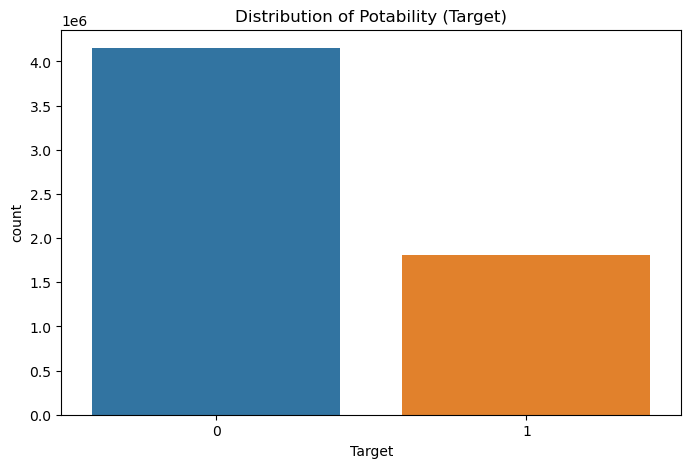

In [9]:
# Target Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Target")
plt.title("Distribution of Potability (Target)")
plt.show()

Your code will visualize the distribution of the Target variable (which I assume denotes the potability of the water) using a countplot from Seaborn. This will show how many samples in the dataset are labeled as potable (drinkable) and how many are non-potable.

Remember that having a balanced or imbalanced distribution might influence the choice of modeling techniques or evaluation metrics when you perform predictive modeling. For instance, if the dataset is highly imbalanced, you might consider techniques like oversampling, undersampling, or using different evaluation metrics such as the F1-score instead of accuracy.

Once you run the code, you'll be able to see the distribution visually. If you have any questions about the plot or next steps, let me know!

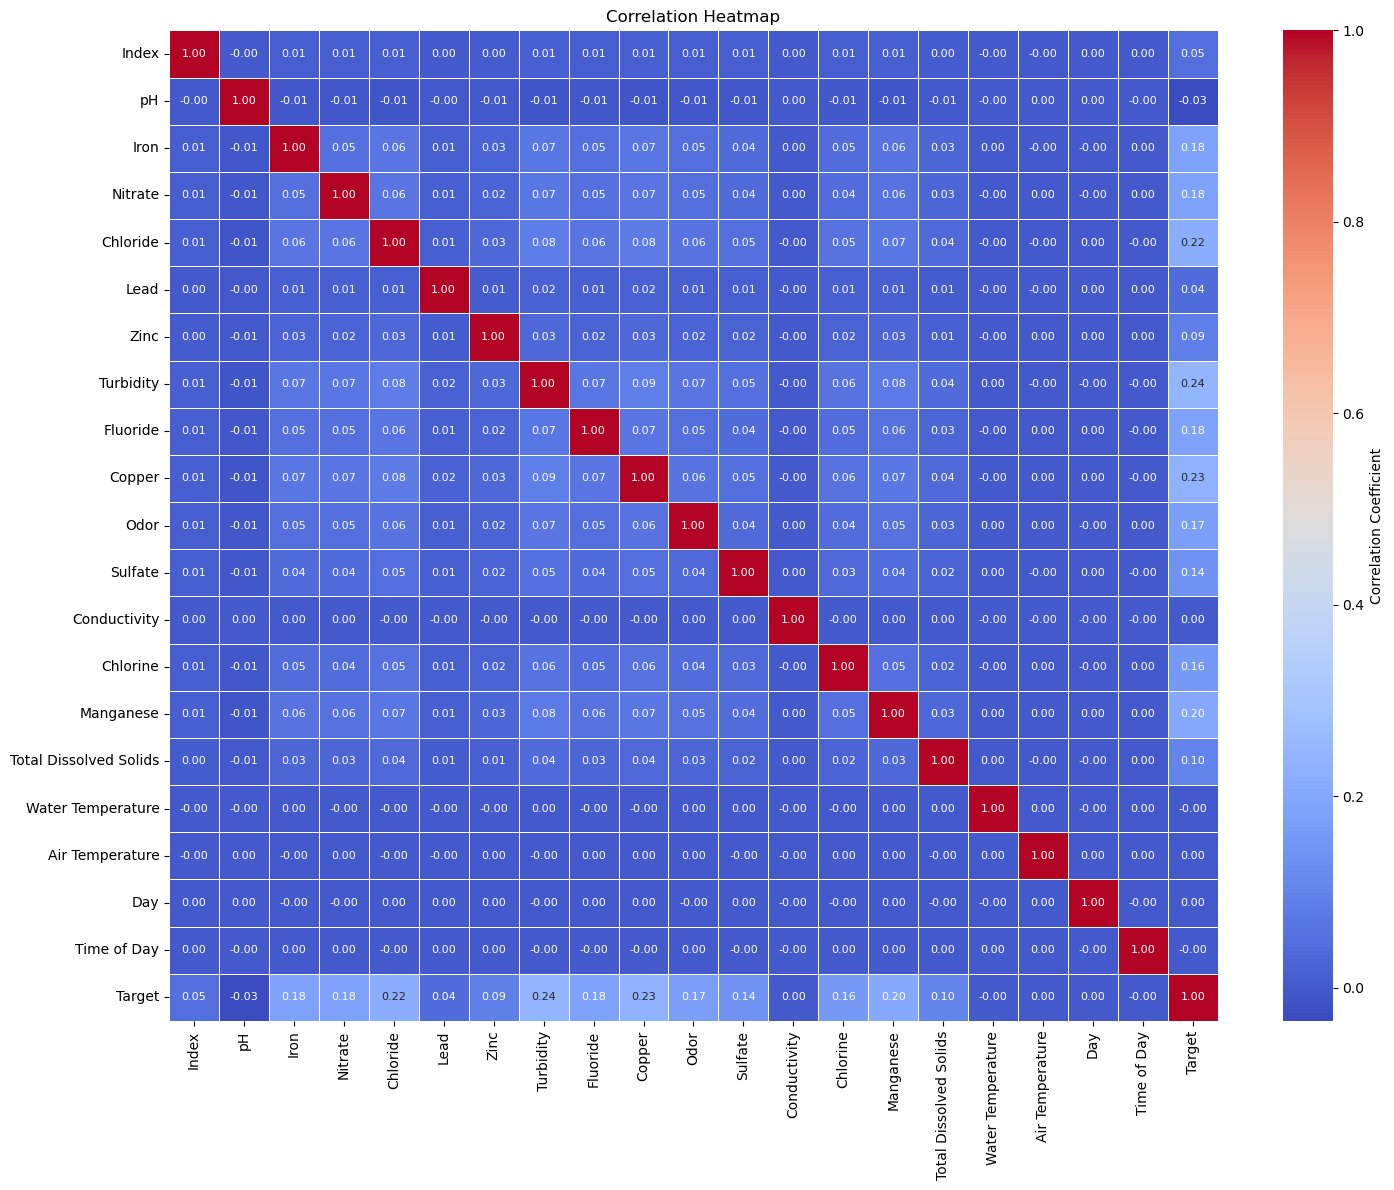

In [10]:
correlation_matrix = data.corr()

plt.figure(figsize=(15, 12))

# Generating the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Format the annotations to 2 decimal places
    annot_kws={"size": 8},  # Reduce font size of annotations
    linewidths=.5,  # Add lines between cells for clarity
    cbar_kws={'label': 'Correlation Coefficient'}  # Add label to the colorbar
)

# Rotating y-axis labels
plt.yticks(rotation=0)  
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



This code will generate a heatmap to visualize the correlation coefficients between every pair of numerical variables in your data DataFrame.

Here's a breakdown of what the code does:

It computes the correlation matrix of the data using the corr() method.

It then defines the figure size.

The sns.heatmap function is used to generate the heatmap.

annot=True: This will annotate each cell with its corresponding correlation coefficient.

cmap="coolwarm": This color palette will make positive correlations appear warmer (more towards red) and negative correlations appear cooler (more towards blue).

fmt=".2f": This will format the annotation to 2 decimal places.

annot_kws: Adjusts the font size of the annotations.

linewidths: Adds lines between cells for clarity.

cbar_kws: Adds a label to the colorbar.

The y-axis labels are rotated to 0 degrees for better readability.

The title is set to "Correlation Heatmap".

The plt.tight_layout() function ensures that the plot is displayed neatly, without any overlapping labels.

Finally, the heatmap is displayed with plt.show().

After you run the code, you'll get a heatmap showing the correlation coefficients between every pair of numeric variables. It's a useful tool to quickly spot relationships and patterns between variables. Remember that a correlation close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a correlation close to 0 suggests little to no linear relationship.

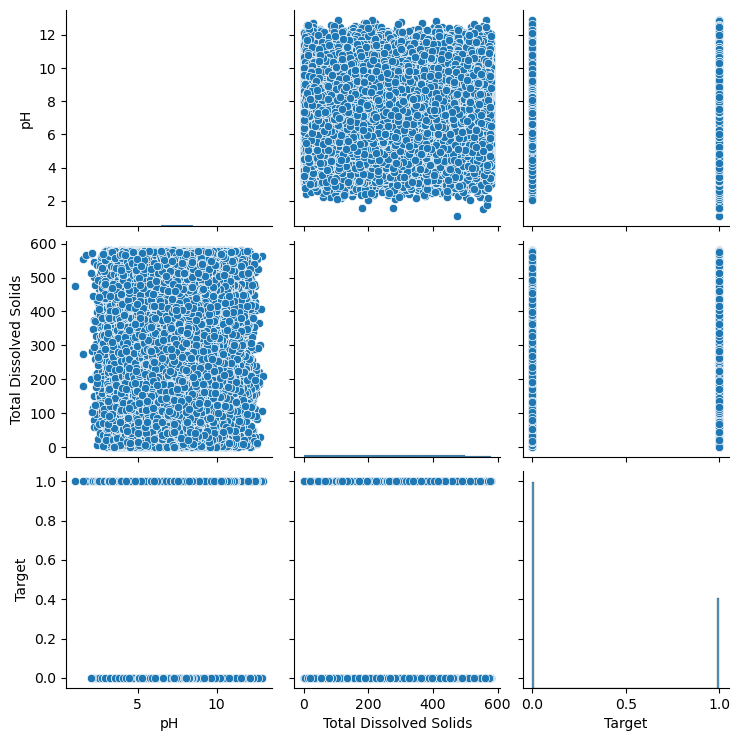

In [11]:
# Pairplot for numerical features
selected_cols = ['pH','Total Dissolved Solids','Target']  # Replace with your chosen columns
sns.pairplot(data=data[selected_cols])
plt.show()



This code will generate a pairplot (also known as a scatterplot matrix) for the selected columns: 'pH', 'Total Dissolved Solids', and 'Target'.

The pairplot function in Seaborn will create a grid of scatter plots, where each plot shows the relationship between two of the columns. The diagonal of the grid will show the univariate distribution of a single column (usually a histogram).

By using the data[selected_cols] indexing, you're subsetting the DataFrame to only include the columns you're interested in.

Once you execute the code:

You'll see scatterplots for each combination of the selected numerical features.

Along the diagonal, you'll find the histogram for each of the individual features.

This visualization helps in understanding pairwise relationships in a dataset.

In your case, since you've also included the 'Target' column, which is presumably categorical (binary, indicating potability), the pairplot will use different colors to differentiate between the categories of 'Target', making it easier to visualize how the other numeric variables distribute across the different categories of 'Target'.

It seems you're trying to generate box plots for each numerical feature against the target variable.

However, I noticed a potential oversight: the variable numerical_cols isn't defined in the code snippet you provided. I'm assuming numerical_cols is a list containing the names of the numerical columns for which you want to generate the box plots.

Ensure that you define numerical_cols before running the code. For instance:

numerical_cols = ['pH', 'Iron', 'Nitrate', ...]  # Replace with your actual column names

Once you have that list, you can execute the provided code to create a grid of box plots, with each box plot representing the distribution of a numerical feature across different categories of the target variable.



This looks good. By setting numerical_cols to quantitative_columns, you're ensuring that the code will generate box plots for each quantitative feature in your dataset against the target variable.

Each plot will showcase the distribution of each feature across different categories of the target variable, helping you visually identify potential differences in the distribution of each feature for different target values.

If you've already executed this code, you should now see a grid of box plots, each representing one of your quantitative features. It's a great way to visually inspect if any feature varies significantly between the classes of the target variable, which can be insightful for many machine learning tasks.

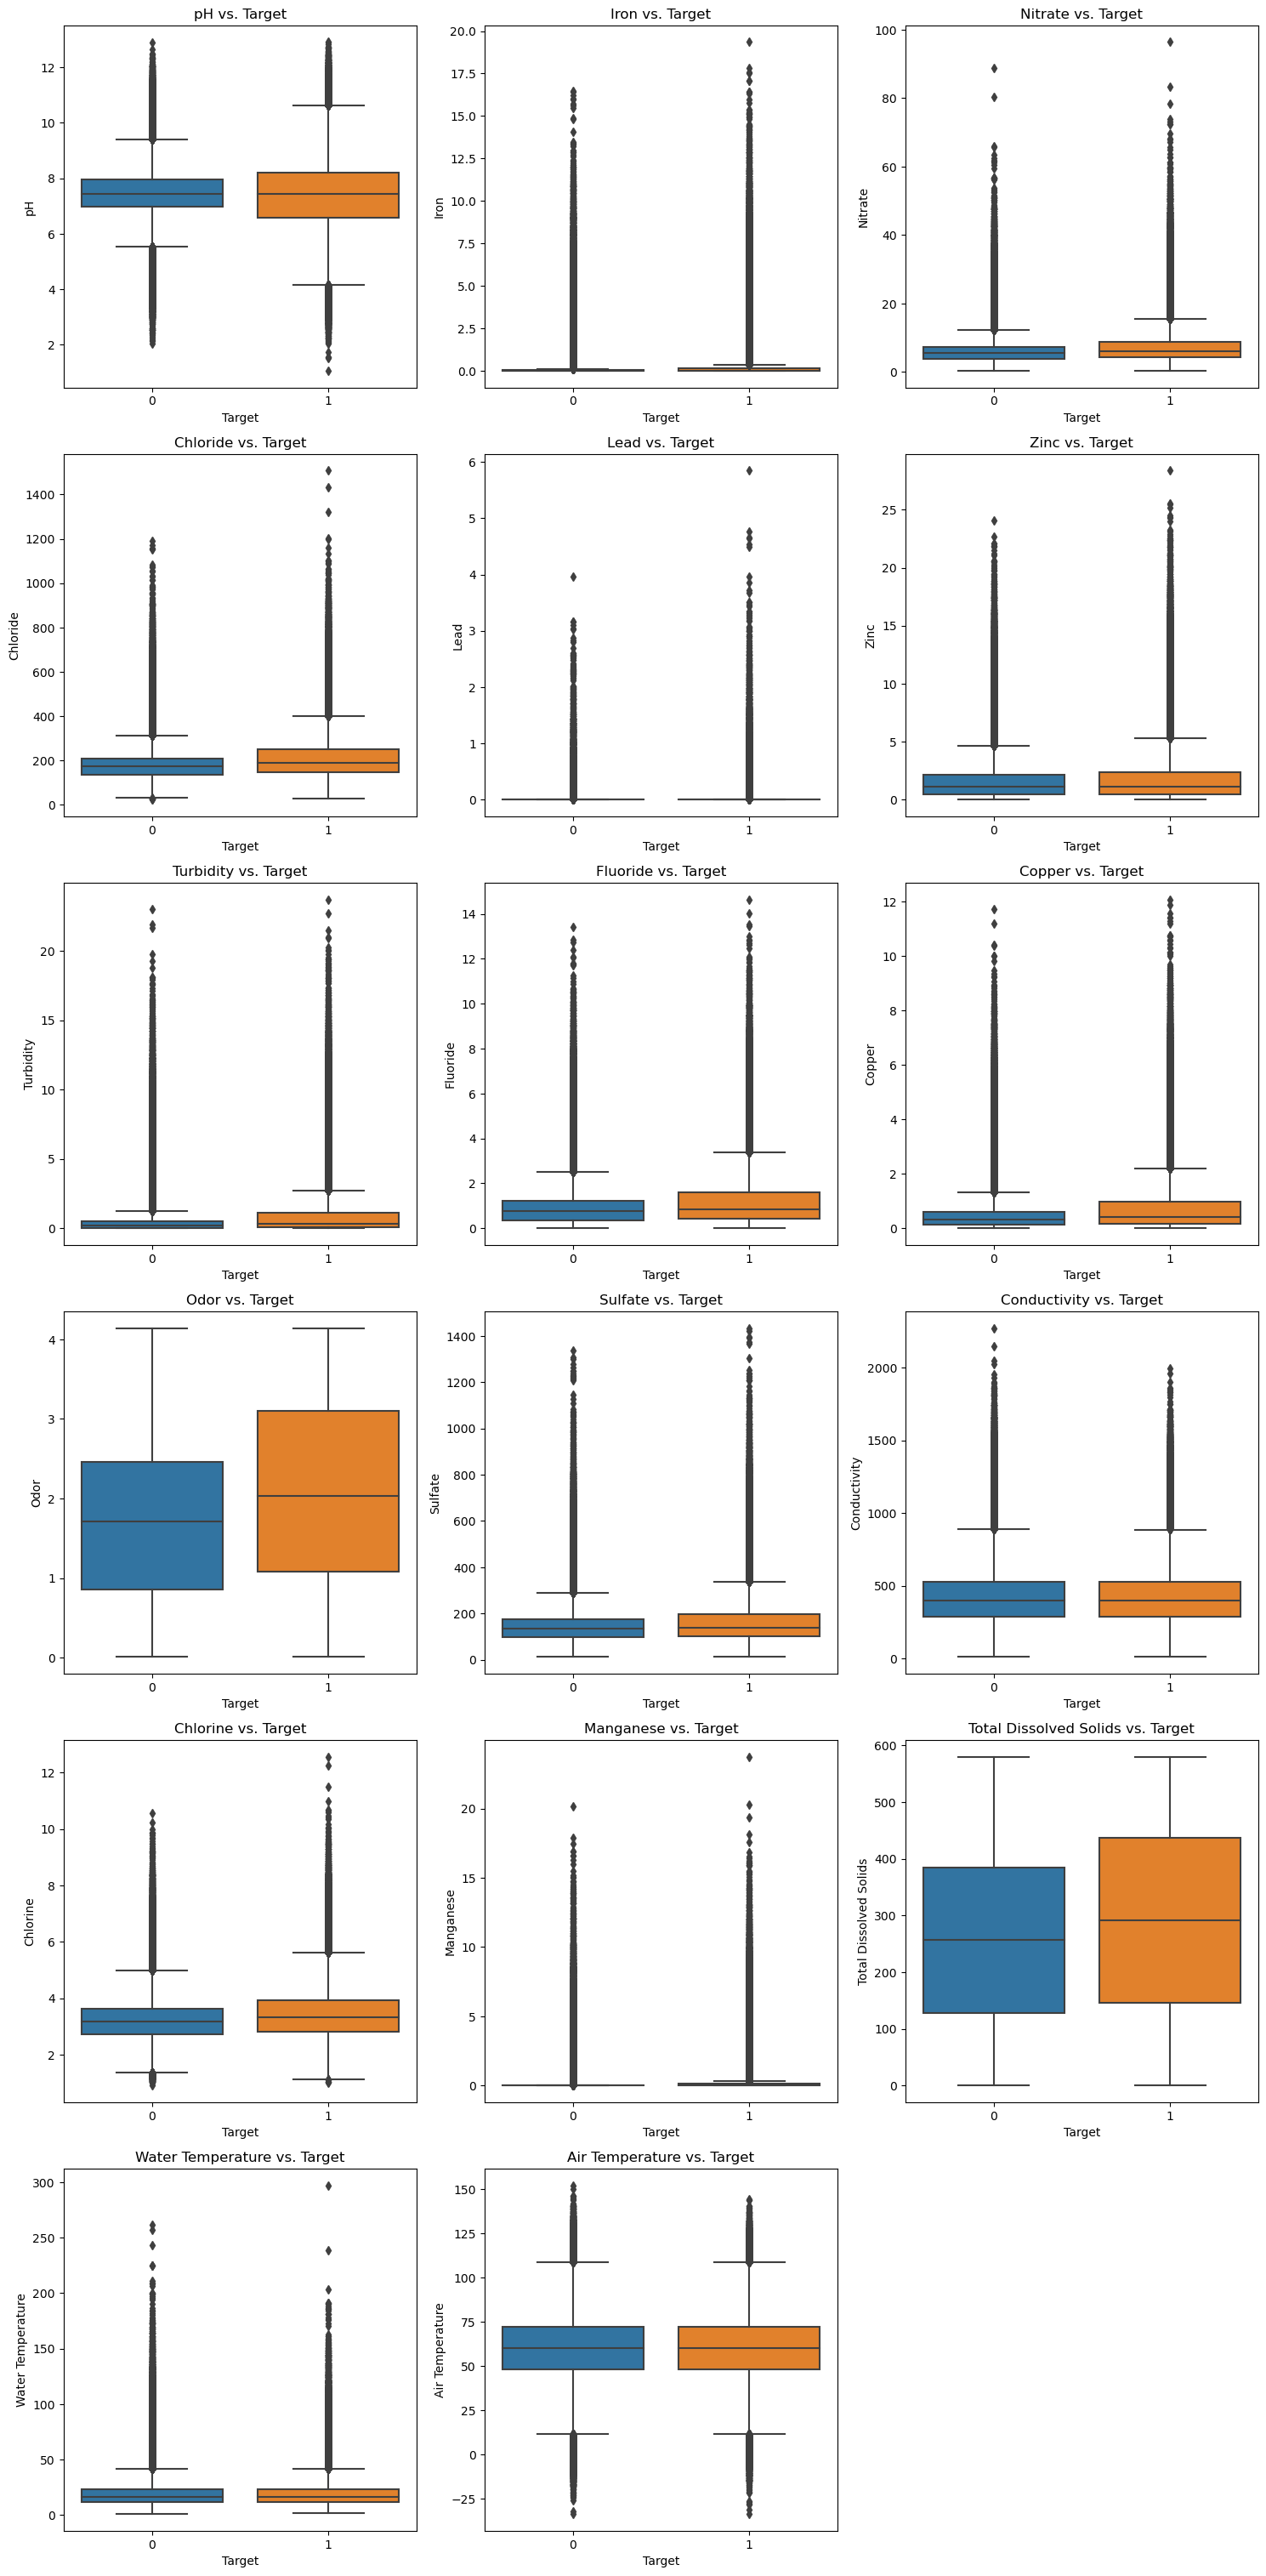

In [12]:
numerical_cols = quantitative_columns

# Number of columns and rows for the grid
num_columns = 3
num_rows = int(len(numerical_cols) / num_columns) + (len(numerical_cols) % num_columns)

# Setting up the grid
fig = plt.figure(figsize=(15, 5 * num_rows))
gs = gridspec.GridSpec(num_rows, num_columns, figure=fig)

for idx, feature in enumerate(numerical_cols):
    ax = fig.add_subplot(gs[idx])
    sns.boxplot(data=data, x="Target", y=feature, ax=ax)
    ax.set_title(f"{feature} vs. Target")

plt.tight_layout()
plt.show()


Your code is set up to plot the distribution of each categorical feature in your dataset, separated by the values of the "Target" feature.

Here's a breakdown of what your code does:

You're selecting all the categorical columns by filtering for columns with data type as object (assuming np is imported as import numpy as np).

For each of these categorical columns (feature), you're plotting a countplot. The hue="Target" argument means that the bars in each count plot will be colored by the values of the "Target" feature. This gives a side-by-side comparison of the distribution of the feature for each value of "Target".

The title of each plot will be "Distribution of [feature name] vs. Target".

The plt.xticks(rotation=45) ensures that the x-axis labels are rotated by 45 degrees to prevent them from overlapping, especially useful if the categorical labels are long.

Finally, plt.show() displays the plot.

When you run this code, you should see a series of bar charts, each showing the distribution of one categorical feature, differentiated by the target values. This will give you a clear visual representation of how the categories within each feature relate to the target variable.

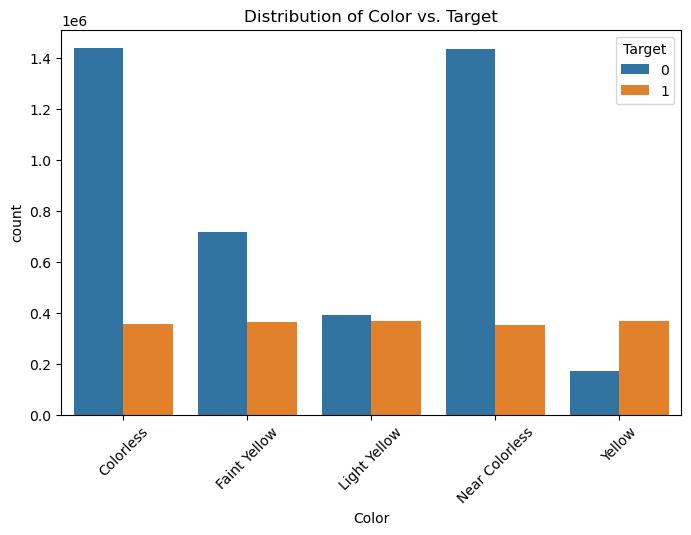

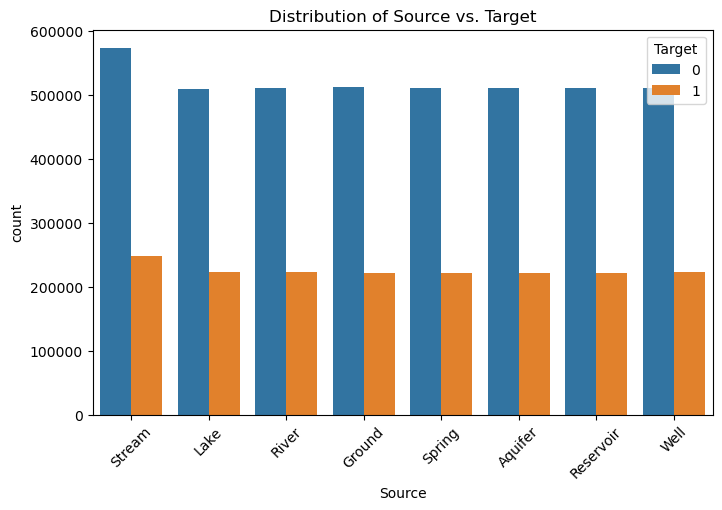

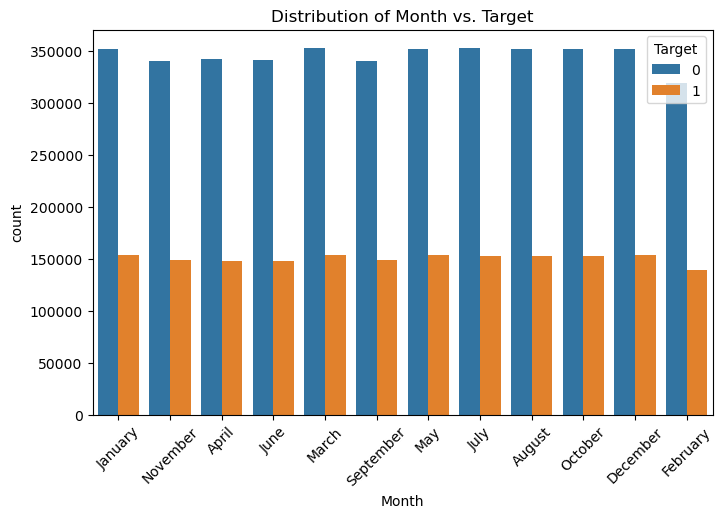

In [13]:
# Distribution of categorical features
categorical_cols = data.select_dtypes(include=[np.object]).columns.tolist()
for feature in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=feature, hue="Target")
    plt.title(f"Distribution of {feature} vs. Target")
    plt.xticks(rotation=45)
    plt.show()

Your code is a well-structured approach to visualizing relationships between a set of features and a target variable. Let me walk you through your code step-by-step:

Imports and Variable Definitions:

You've imported necessary libraries for visualization.
Defined two lists: minerals and attributes containing names of columns in your dataset that you want to visualize.
Helper Function: create_scatter_grid:

This function will create a grid of scatter plots.
It determines the grid dimensions based on the number of features you pass.
For each feature, it creates a scatter plot with that feature on the x-axis and the target on the y-axis. This way you can visualize the relationship of each feature with the target.
The title for each scatter plot is set to "Feature vs. Target".
Additionally, a suptitle for the entire grid is set which can be specified when calling the function.
Using the Helper Function:

You've called the helper function twice.

First, with minerals as features and 'Target' as the target variable. This creates a grid showing how each mineral relates to the target.

Second, with attributes as features and 'Target' as the target variable. This creates a grid showing how each attribute relates to the target.

When you run this code, you will get two grids of scatter plots. The first grid will show scatter plots of each mineral against the target, and the second grid will show scatter plots of each attribute against the target. 

This will help in visually understanding the relationship between these features and the target variable.



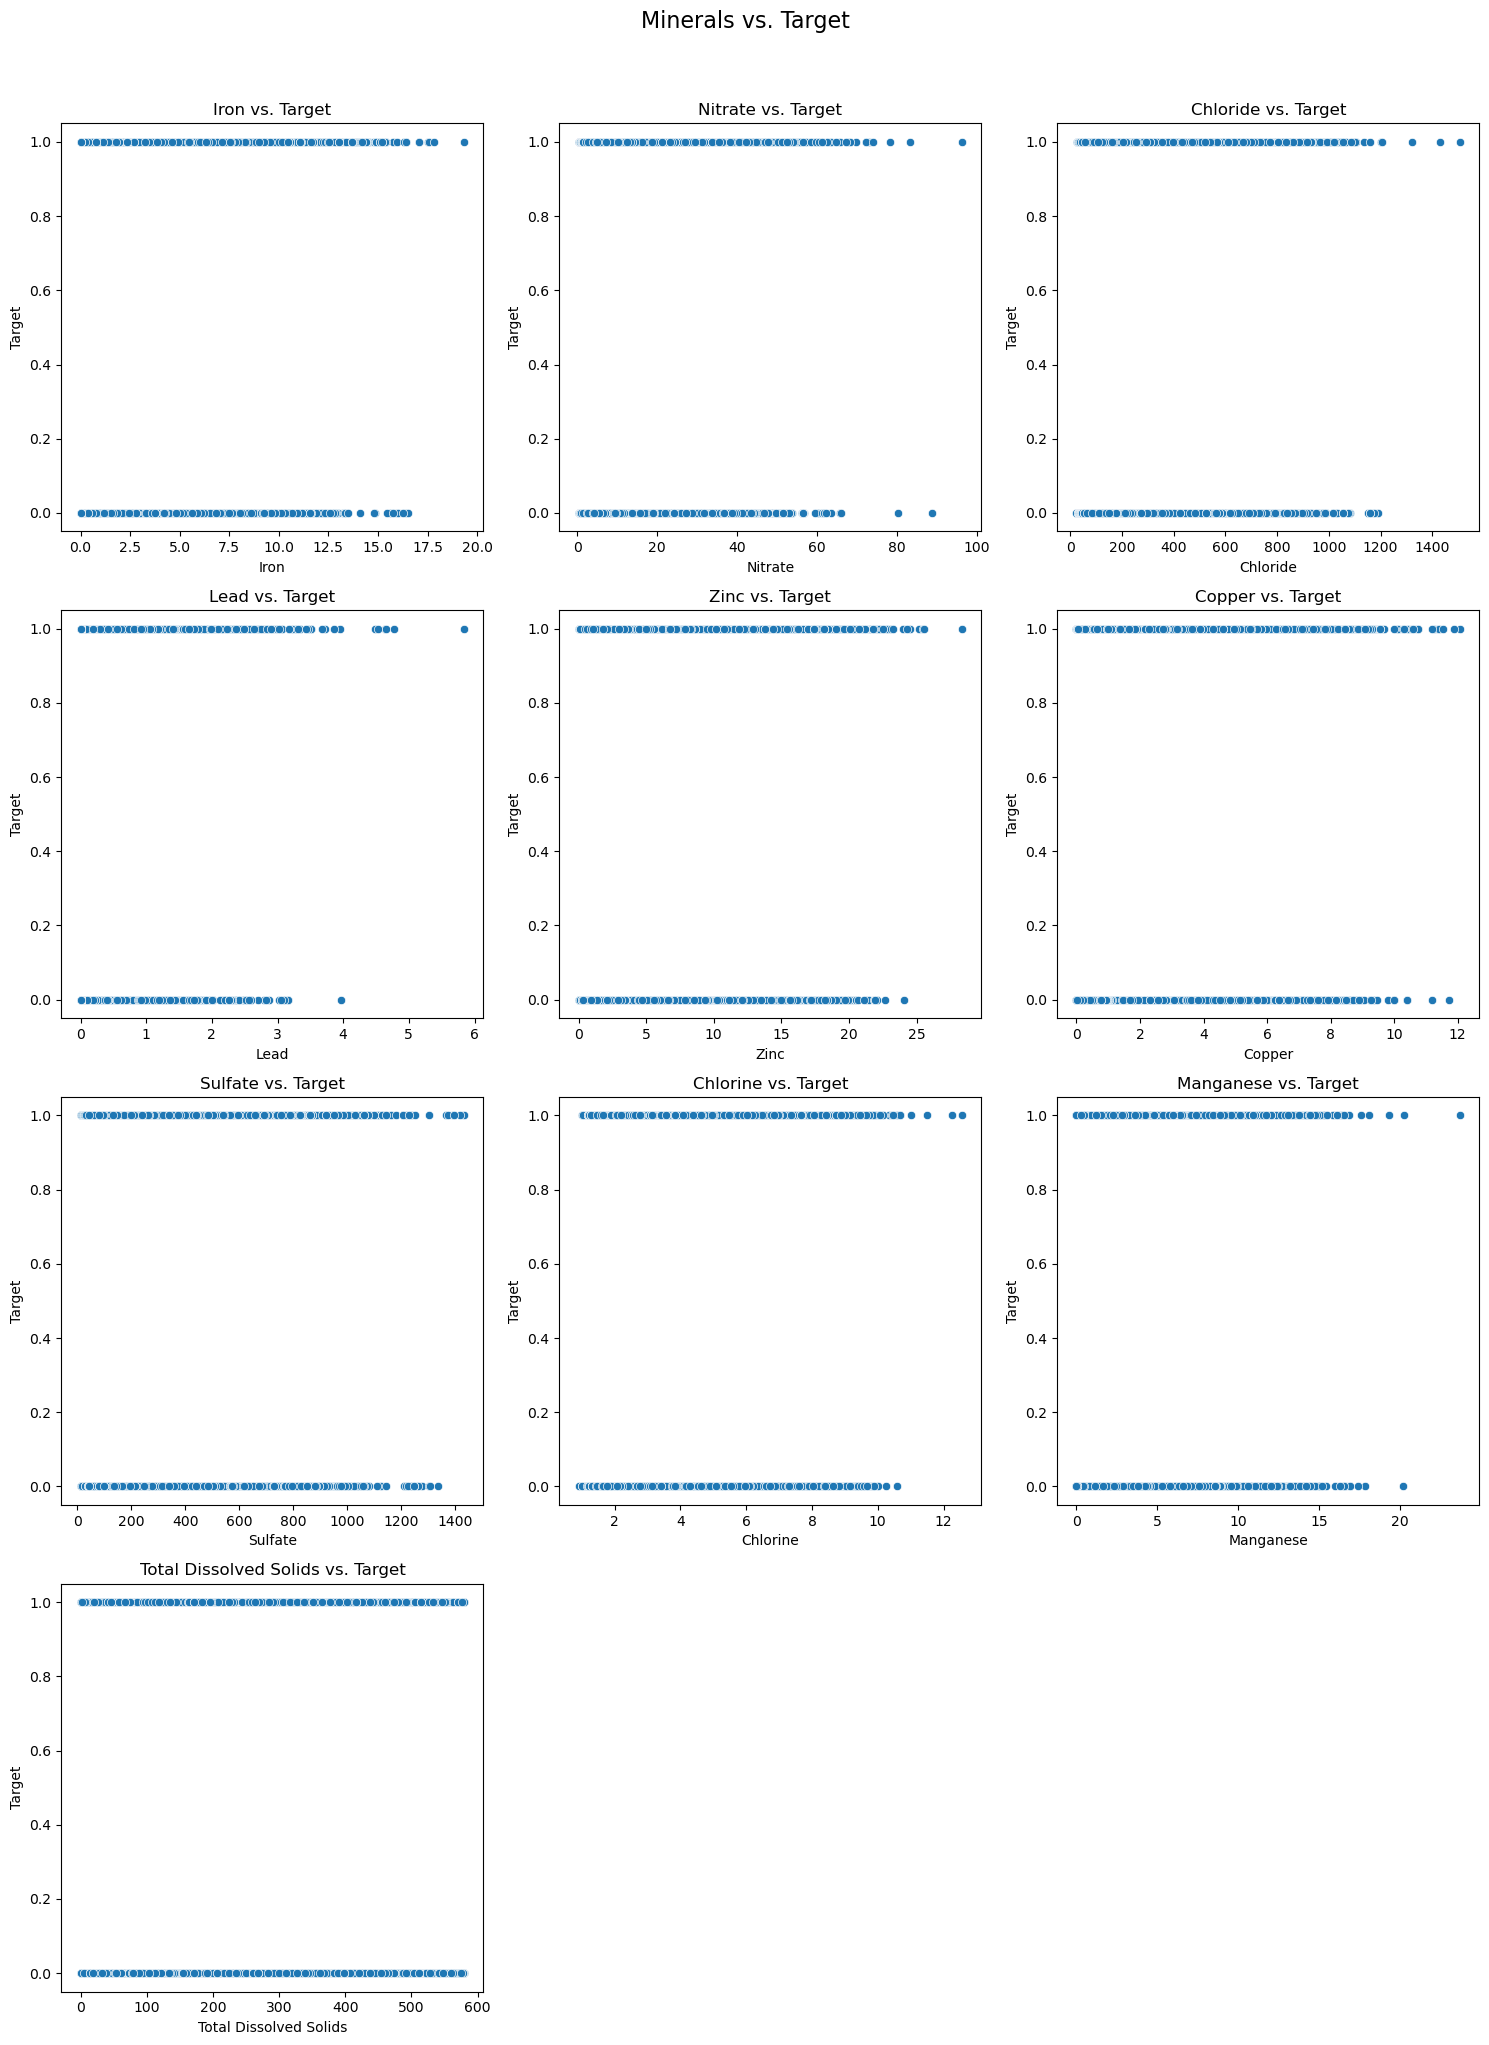

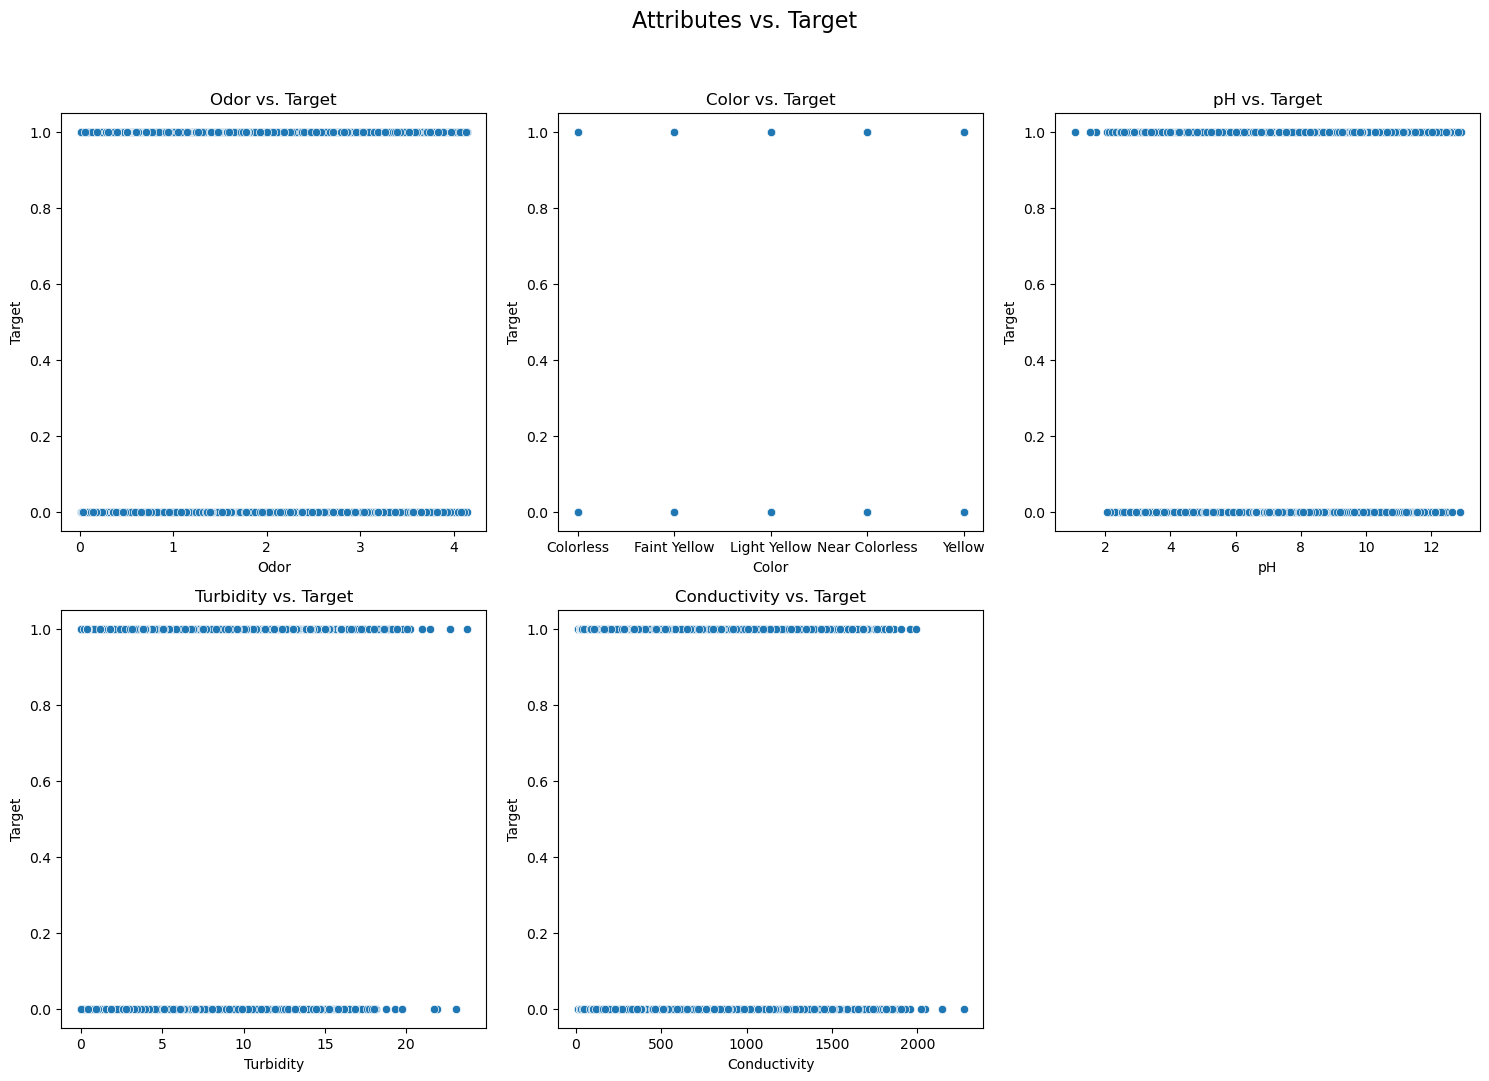

In [14]:
# List of minerals and attributes
minerals = ['Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Copper', 'Sulfate', 'Chlorine', 'Manganese', 'Total Dissolved Solids']
attributes = ['Odor', 'Color', 'pH', 'Turbidity', 'Conductivity']

# Helper function to create a grid of scatter plots
def create_scatter_grid(features, target, grid_title):
    num_columns = 3
    num_rows = int(len(features) / num_columns) + (len(features) % num_columns)
    
    fig = plt.figure(figsize=(15, 5 * num_rows))
    gs = gridspec.GridSpec(num_rows, num_columns, figure=fig)
    
    for idx, feature in enumerate(features):
        ax = fig.add_subplot(gs[idx])
        sns.scatterplot(data=data, x=feature, y=target, ax=ax)
        ax.set_title(f"{feature} vs. {target}")
    
    plt.suptitle(grid_title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Grid 1: Minerals vs. Target
create_scatter_grid(minerals, 'Target', 'Minerals vs. Target')

# Grid 2: Attributes vs. Target
create_scatter_grid(attributes, 'Target', 'Attributes vs. Target')


The code you provided will generate histograms for all numeric columns in the data DataFrame. Each histogram provides a distribution of the values for a particular column. Here's a breakdown of your code:

Set Figure Size:

plt.rcParams['figure.figsize'] = [20,10]: This line sets the default figure size for all subsequent plots to be 20 units in width and 10 units in height.
Generate Histograms:

data.hist(): This will generate histograms for all numerical columns in the data DataFrame. By default, pandas uses the matplotlib library to generate these histograms, so each column will get its own subplot in a larger figure. The number of bins for the histograms will be determined automatically.
Display the Plots:

plt.show(): This line is used to display the plots.
After running this code, you'll see a grid of histograms with one histogram for each numeric column in the data DataFrame. The histograms provide a visual representation of the distribution of values in each column. They are useful for getting a quick understanding of the data distribution and identifying any potential outliers or unusual patterns.






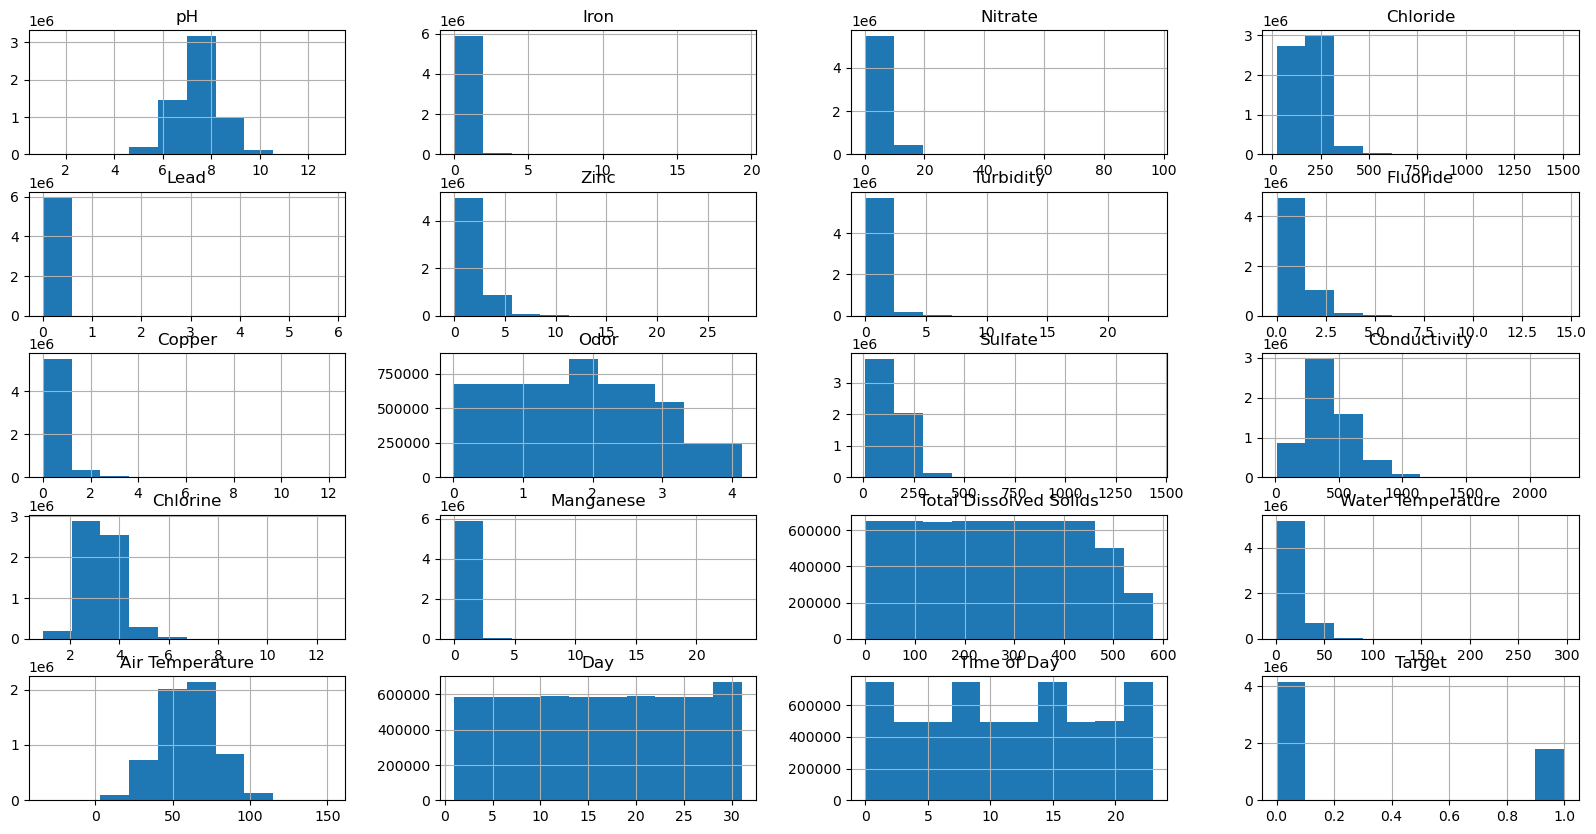

In [15]:
plt.rcParams['figure.figsize'] = [20,10]
data.drop('Index', axis=1).hist()
plt.show()


In [16]:
# This will display the number of unique values for each column in your data DataFrame.
data.nunique()

Index                     5956842
pH                        5604785
Iron                      5674876
Nitrate                   5614445
Chloride                  5549789
Lead                      5542383
Zinc                      5567923
Color                           5
Turbidity                 5665514
Fluoride                  5537537
Copper                    5528121
Odor                      5547049
Sulfate                   5529950
Conductivity              5560632
Chlorine                  5658153
Manganese                 5610685
Total Dissolved Solids    5709788
Source                          8
Water Temperature         5556716
Air Temperature           5684020
Month                          12
Day                            31
Time of Day                    24
Target                          2
dtype: int64

In [17]:
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,Stream,16.444276,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


Your code snippet maps string month names to their corresponding numeric representation using a dictionary called month_mapping. After this operation, a new column named 'Months' is added to your data DataFrame, where each string month name from the 'Month' column is replaced with its numeric counterpart.

If you intend to replace the existing 'Month' column instead of creating a new 'Months' column, you can modify the last line to:

data['Month'] = data['Month'].map(month_mapping)


Otherwise, your code should work fine for its intended purpose. If you have any further questions or encounter any issues, let me know!


In [18]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

data['Months'] = data['Month'].map(month_mapping)


In [19]:
data=data.drop(['Month'],axis=1)

The code you provided will encode the categorical columns 'Source' and 'Color' in the data DataFrame using one-hot encoding. The resulting DataFrame will be stored in the data_encoded variable.

The parameter drop_first=True ensures that one column is dropped (to avoid multicollinearity) from the one-hot encoded columns for each category. This is useful especially for linear models which are sensitive to multicollinearity.

After executing this code, data_encoded will have new columns for each unique value in 'Source' and 'Color' (minus one column for each due to the drop_first parameter), and the original 'Source' and 'Color' columns will be removed.

In [20]:
# Encoding categorical columns(Source and Color) using One-hot encoding

data_encoded = pd.get_dummies(data, columns=['Source', 'Color'], drop_first=True)


The provided code is calculating the number of outliers for each column in the data_encoded DataFrame based on the Interquartile Range (IQR) method.

Here's a step-by-step breakdown:

Q1 = data_encoded.quantile(0.25): Computes the 1st quartile (the 25th percentile) for each column in the DataFrame.

Q3 = data_encoded.quantile(0.75): Computes the 3rd quartile (the 75th percentile) for each column.

IQR = Q3 - Q1: Calculates the Interquartile Range (IQR) which is the difference between the 3rd and 1st quartiles.

The following line checks for outliers:

data_encoded < (Q1 - 1.5 * IQR): Finds values that are below the lower bound.

data_encoded > (Q3 + 1.5 * IQR): Finds values that are above the upper bound.

Combining them with | (OR) will give a DataFrame of the same shape as data_encoded but filled with True for outliers and False otherwise.

outliers counts the number of True values (outliers) for each column.

Finally, (outliers*100)/data.shape[0] computes the percentage of outliers for each column based on the total number of rows in the original dataset (data).

When you print this, it will give you the percentage of outliers for each column in the data_encoded DataFrame.

In [21]:
# Handling Outliers

Q1 = data_encoded.quantile(0.25)
Q3 = data_encoded.quantile(0.75)
IQR = Q3 - Q1

# Getting boolean dataframe where True indicates the presence of an outlier
outliers = ((data_encoded < (Q1 - 1.5 * IQR)) | (data_encoded > (Q3 + 1.5 * IQR))).sum()
print((outliers*100)/data.shape[0])


Index                      0.000000
pH                         2.835429
Iron                      16.121881
Nitrate                    3.385720
Chloride                   3.410263
Lead                      24.656605
Zinc                       3.480284
Turbidity                  7.809440
Fluoride                   3.634543
Copper                     5.483829
Odor                       0.000000
Sulfate                    2.687330
Conductivity               2.141823
Chlorine                   1.752808
Manganese                 16.233870
Total Dissolved Solids     0.000000
Water Temperature          4.440692
Air Temperature            0.726190
Day                        0.000000
Time of Day                0.000000
Target                     0.000000
Months                     0.000000
Source_Ground             12.328496
Source_Lake               12.298765
Source_Reservoir          12.310180
Source_River              12.304842
Source_Spring             12.300142
Source_Stream             13

These values represent the percentage of outliers in each column of your data_encoded DataFrame.

Here are some notable observations:

Lead has the highest outlier percentage at approximately 24.66%, indicating a significant number of extreme values for lead concentrations.

Iron and Manganese both have around 16% outliers, suggesting that these minerals might also have some extreme readings.

Turbidity has around 7.81% outliers, which might indicate unusual cloudiness or haziness in the water due to a high number of individual particles.

Among the water sources (Source_...), Source_Stream stands out with approximately 13.81% outliers.

In terms of water color (Color_...), Color_Faint Yellow has the highest outlier percentage, with 18.12%.

This information can be useful in multiple ways:

**Understanding the Data:** It gives you an understanding of which features have unusually high or low values that deviate from the typical range.

**Pre-processing Decision:** If certain columns have a high percentage of outliers, and if these outliers aren't errors but represent genuine extreme readings, they could potentially influence the model heavily. Depending on the problem statement, you might decide to handle or retain these outliers.

**Feature Engineering:** The presence of outliers can sometimes be turned into a feature. For instance, you could create a binary feature indicating whether a given reading is an outlier or not, based on the IQR method.

**Model Choice:** Some machine learning models are sensitive to outliers, so knowing where your outliers are can guide you in choosing a model or in determining preprocessing steps.

It's important to interpret these values in the context of the problem domain. For instance, high levels of certain minerals might be a genuine concern and not merely a data anomaly.


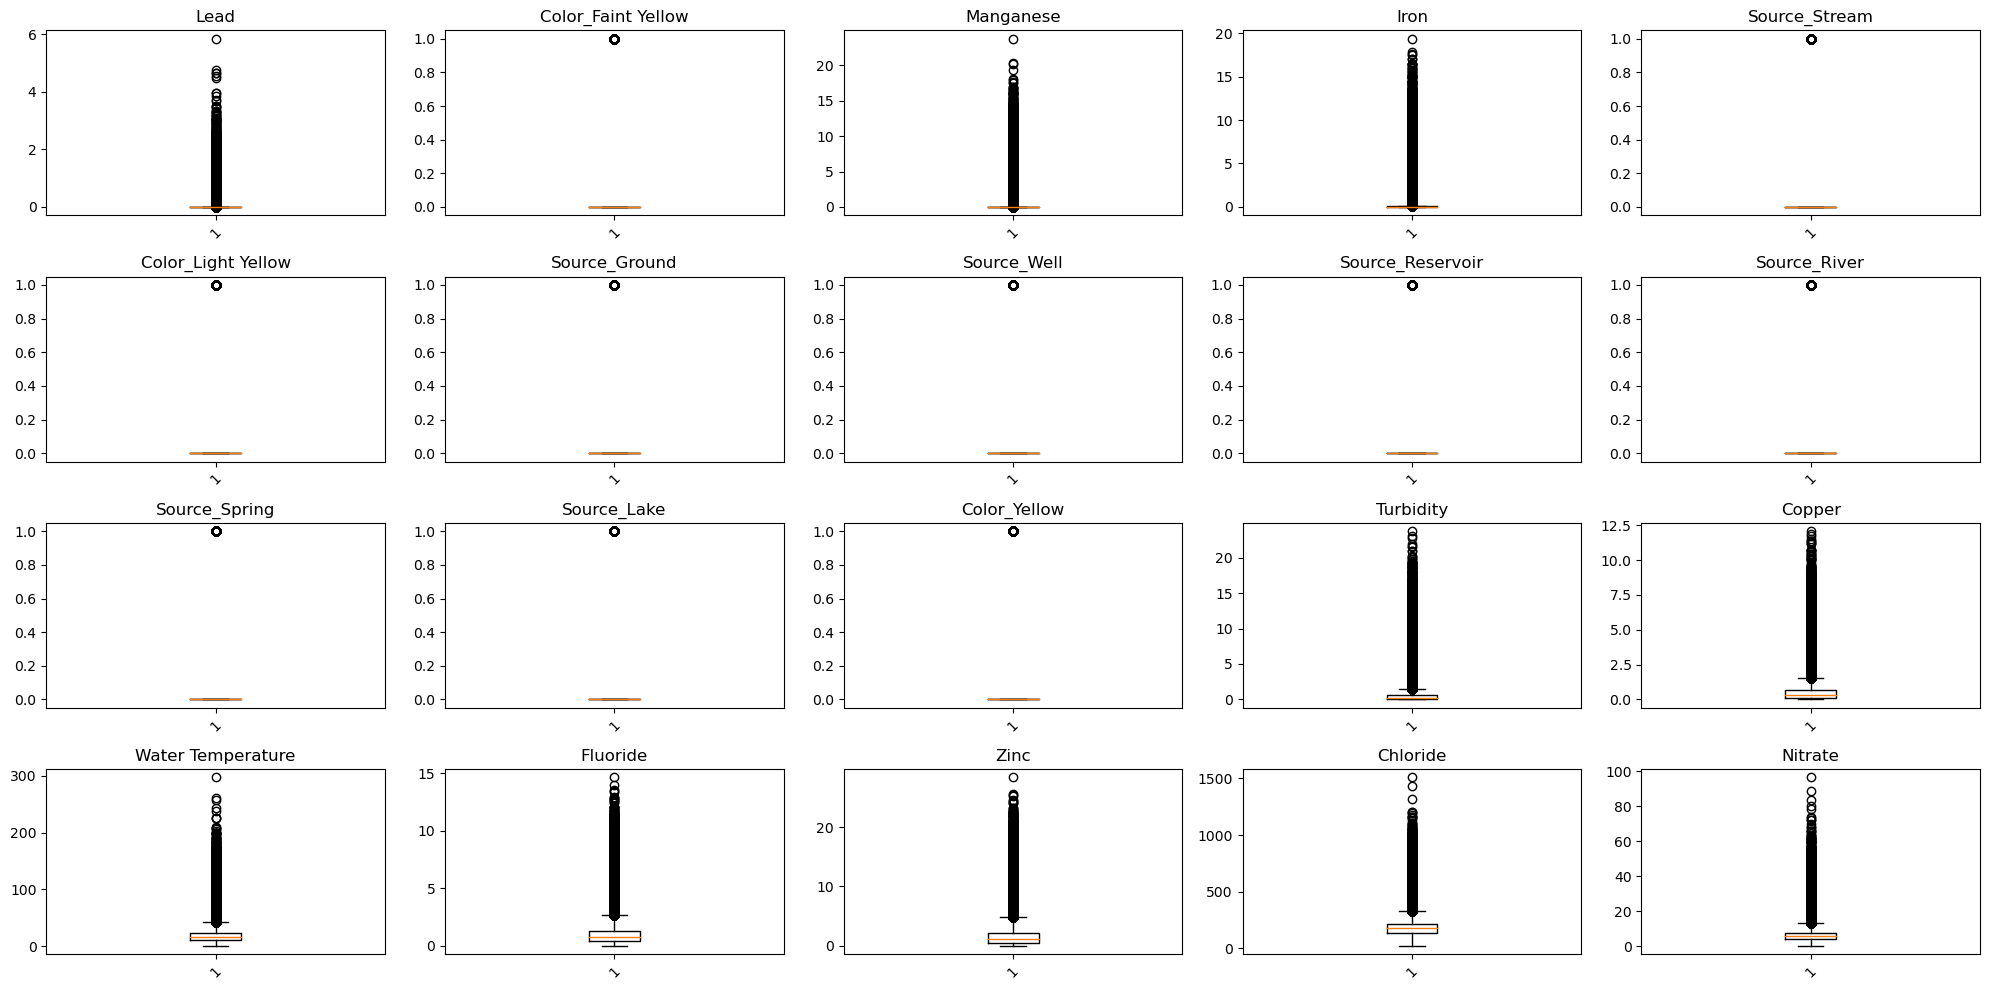

In [22]:
# Identify the top 20 features with the highest number of outliers
top_20_outlier_features = outliers.sort_values(ascending=False).head(20).index

# Set up the grid
fig, axs = plt.subplots(4, 5, figsize=(20,10))  # 2 rows and 5 columns to fit the top 10 features
axs = axs.ravel()  # Flatten axes array

for i, feature in enumerate(top_20_outlier_features):
    axs[i].boxplot(data_encoded[feature])
    axs[i].set_title(f'{feature}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


This code creates box plots for the top 20 features (columns) with the highest number of outliers. Box plots are great for visualizing the distribution of data, showing the median, quartiles, and potential outliers (those points outside the whiskers).

By looking at these plots, you can:

Assess Variability: Understand the spread and skewness of the data for each feature.

Identify Outliers: The points that fall outside the whiskers of the box plot are potential outliers.

Understand Distributions: See where most of the data lies (within the box) and where the extreme values are (outside the whiskers or the points beyond).

However, remember that the method you've used to define outliers (based on the IQR) is just one of many.

Depending on the nature of your data and domain, the potential outliers flagged by the IQR method may or may not be actual outliers. Always interpret with caution and domain understanding!

In [23]:
for col in data_encoded.columns:
    # Calculate IQR
    Q1 = data_encoded[col].quantile(0.25)
    Q3 = data_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate upper and lower limits
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    # Applying capping for outliers
    mask_upper = data_encoded[col] > upper_limit
    mask_lower = data_encoded[col] < lower_limit
    
    data_encoded.loc[mask_upper, col] = upper_limit
    data_encoded.loc[mask_lower, col] = lower_limit


The given code snippet is designed to perform outlier capping. Here's a breakdown of what the code does:

Loop over every column in the data_encoded DataFrame.
For each column, calculate the 1st quartile (Q1) and 3rd quartile (Q3), as well as the interquartile range (IQR).
Define outlier bounds (upper and lower limits) based on the IQR. Any value beyond 1.5 times the IQR above Q3 or below Q1 is typically considered an outlier using this method.
For each column, identify the values that are greater than the upper limit and those less than the lower limit.
Replace the extreme values beyond these limits with the upper and lower limits, respectively. This technique is known as "capping" or "clipping" the outliers.
This approach ensures that potential outliers are not removed but are brought closer to the other data points, thus reducing their influence on subsequent analyses or models.

However, it's crucial to understand that outlier treatment should be done judiciously, considering the nature of the data and the specific domain. Sometimes, real-world events or processes generate these outliers, and capping them might introduce bias. Always ensure that the decision to cap outliers is backed by sound domain knowledge and statistical reasoning.


In [24]:
#  Shows first 5 rows of the data_encoded dataset, with outliers capped (if they existed in those rows).
data_encoded.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Color_Faint Yellow,Color_Light Yellow,Color_Near Colorless,Color_Yellow
0,0.0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,...,0,0,0,0,0,0,0,0,0.0,0
1,1.0,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,...,0,0,0,0,0,0,0,0,0.0,0
2,2.0,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,0.319956,0.423423,0.431588,...,0,0,0,0,0,0,0,0,0.0,0
3,3.0,7.955339,0.133920,8.224944,178.129940,3.997118e-176,4.027879,0.166319,0.208454,0.239451,...,0,0,0,0,0,0,0,0,1.0,0
4,4.0,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,...,0,0,0,0,0,0,0,0,0.0,0


You've decided to drop the Index, Day, Time of Day, and Months columns from the data_encoded DataFrame. Executing the above line will permanently remove these columns.

Now, your dataset is further cleaned and prepared. You can continue with any further preprocessing, analysis, or modeling steps.

In [25]:
data_encoded = data_encoded.drop(['Index','Day', 'Time of Day','Months'],axis=1)

In [26]:
data_encoded.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity',
       'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine',
       'Manganese', 'Total Dissolved Solids', 'Water Temperature',
       'Air Temperature', 'Target', 'Source_Ground', 'Source_Lake',
       'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream',
       'Source_Well', 'Color_Faint Yellow', 'Color_Light Yellow',
       'Color_Near Colorless', 'Color_Yellow'],
      dtype='object')

It seems like you're trying to plot the boxplots for the top 20 features with the most outliers, but this time after capping the outliers using the IQR method.

However, since you dropped some columns from the data_encoded DataFrame, you need to ensure that the features in top_20_outlier_features are still present in data_encoded. If they're not, this can raise an error.

Before plotting, you can filter the top_20_outlier_features list to keep only those features which are present in data_encoded. This ensures that you're only trying to plot the features which are actually present in the dataset.


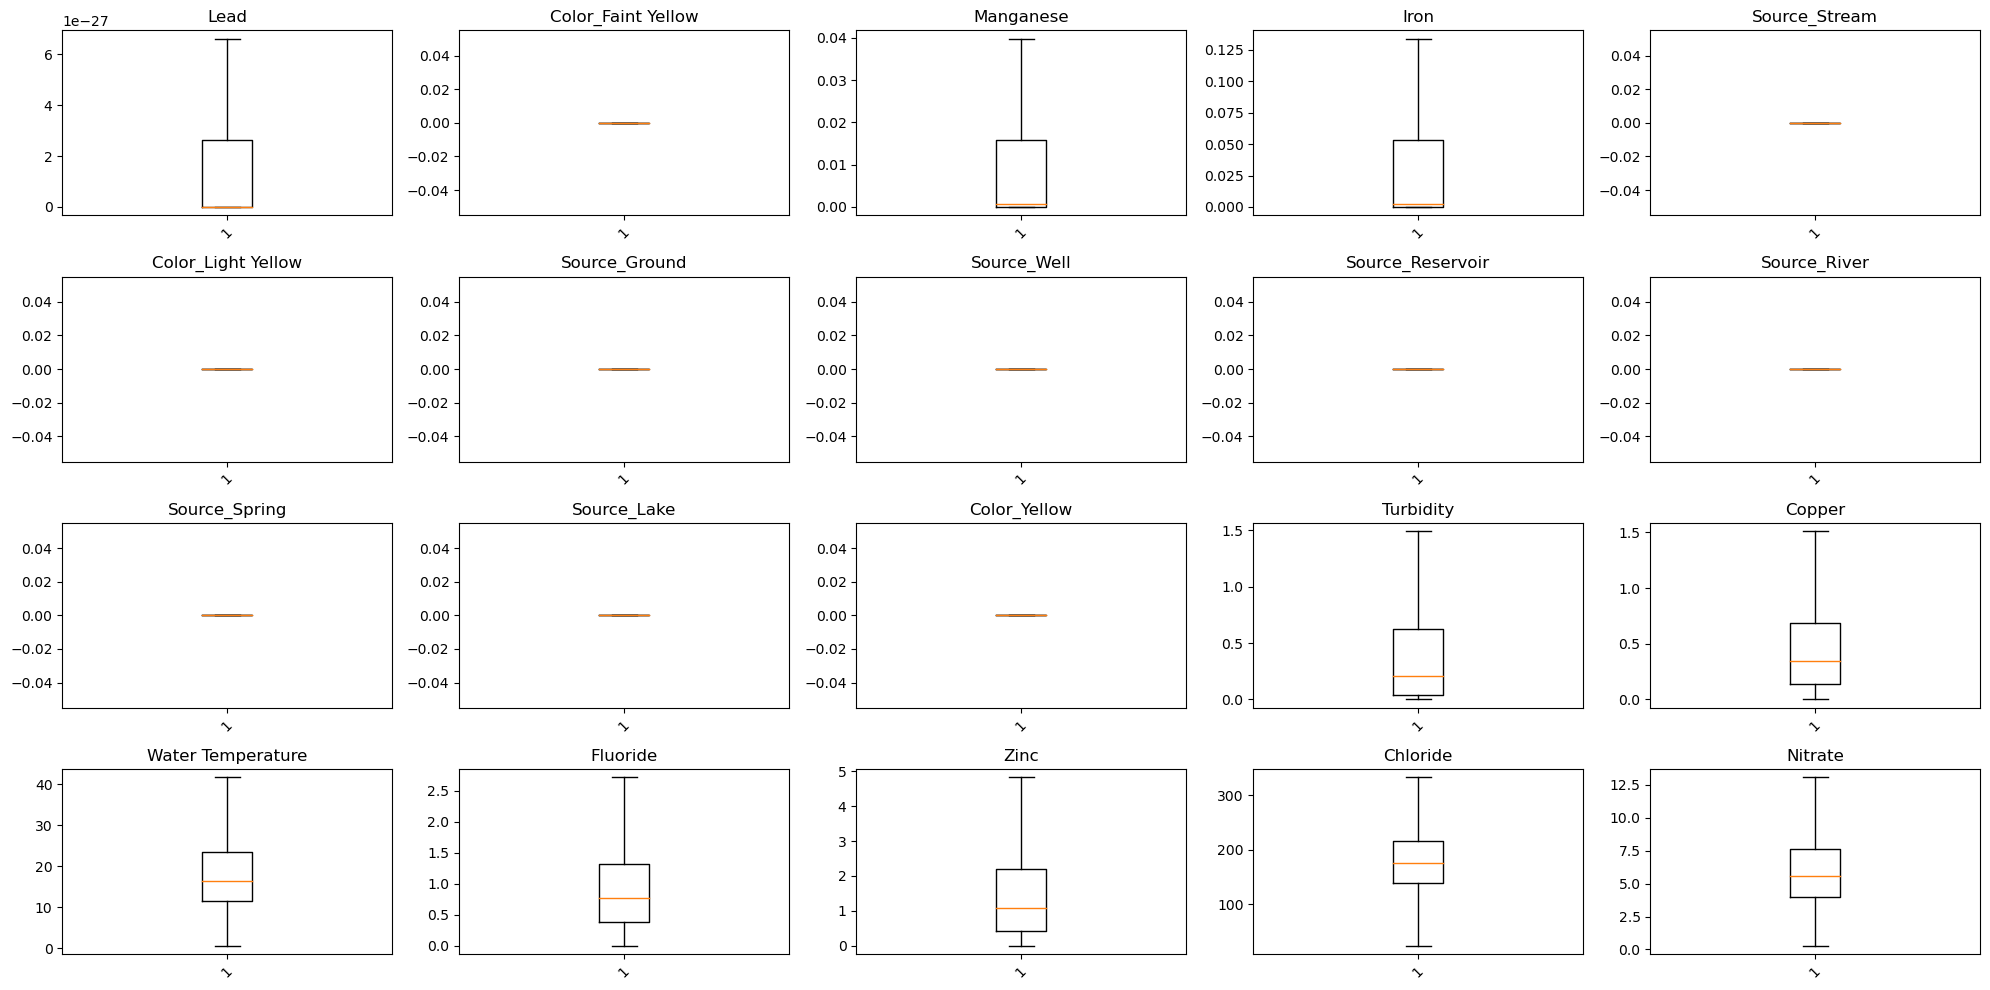

In [27]:
# Filter features that are present in data_encoded
filtered_features = [feature for feature in top_20_outlier_features if feature in data_encoded.columns]

# Set up the grid
fig, axs = plt.subplots(4, 5, figsize=(20,10))  # 4 rows and 5 columns to fit the top 20 features
axs = axs.ravel()  # Flatten axes array

for i, feature in enumerate(filtered_features):
    axs[i].boxplot(data_encoded[feature])
    axs[i].set_title(f'{feature}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


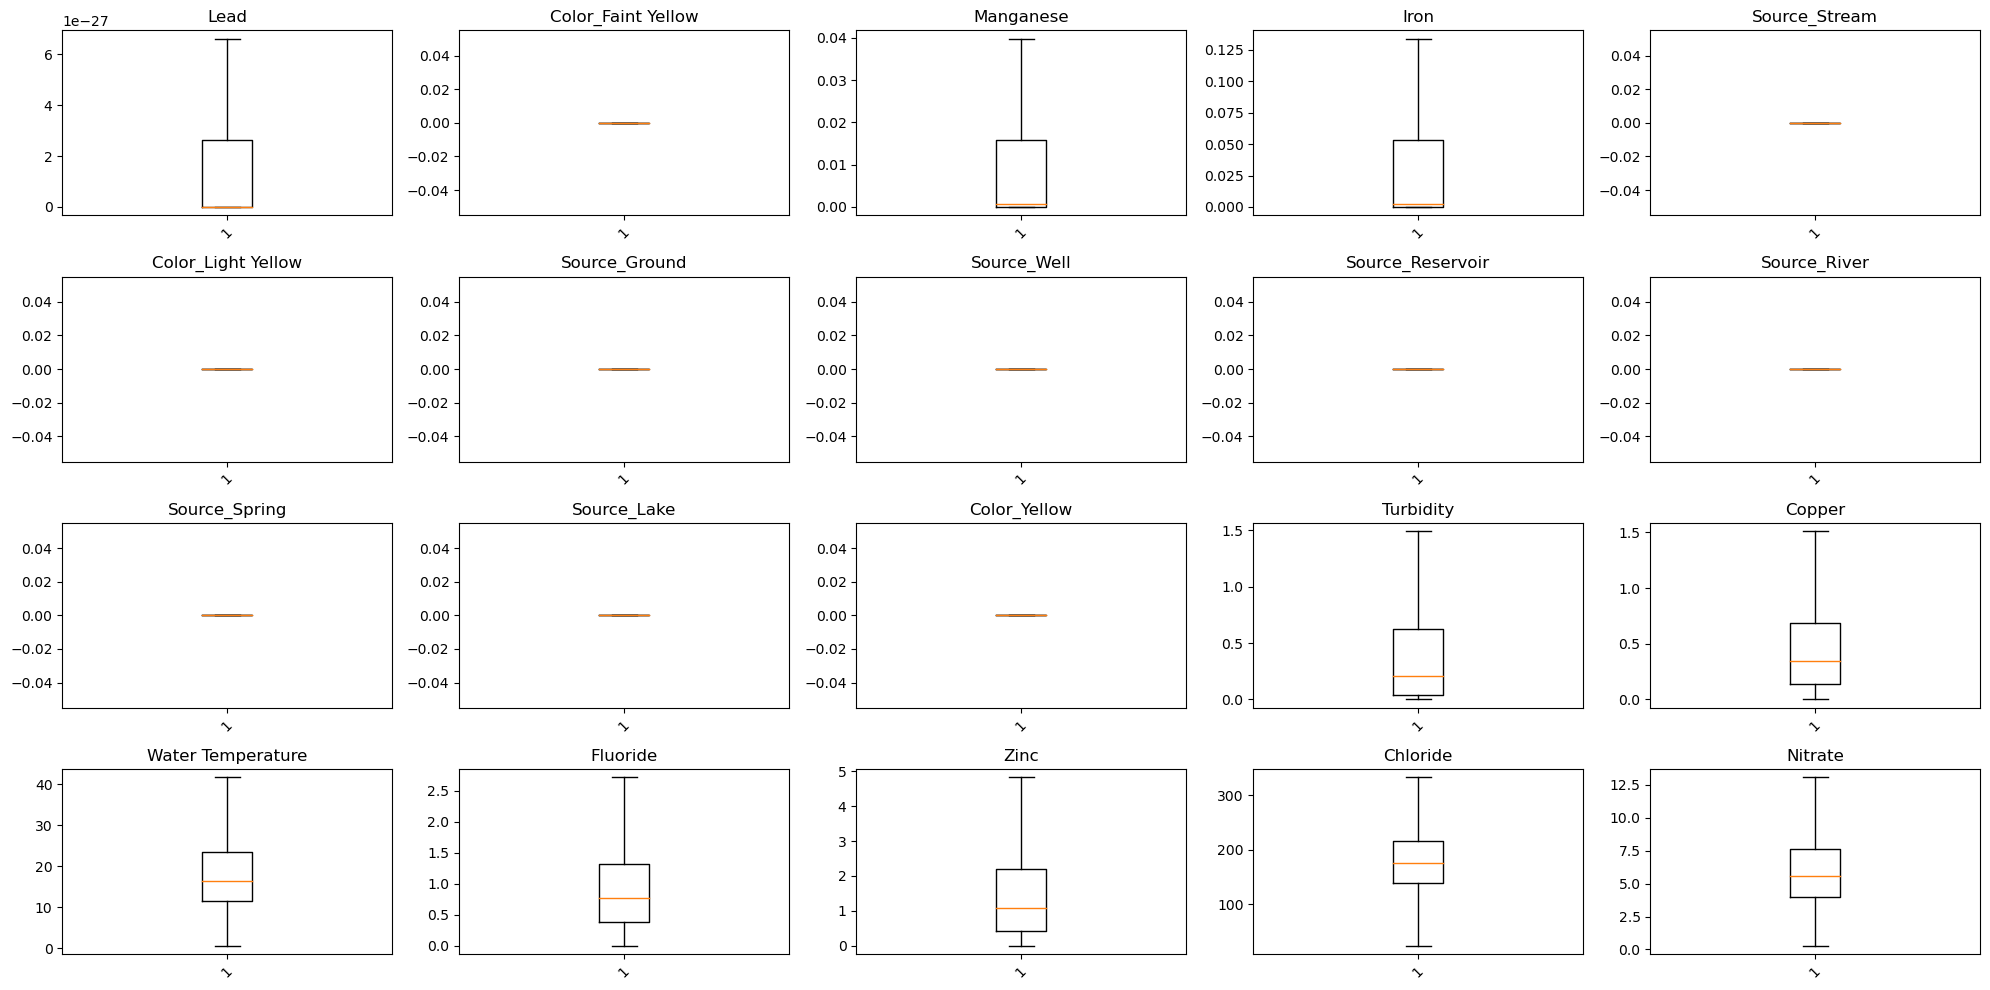

In [28]:
# Set up the grid
fig, axs = plt.subplots(4, 5, figsize=(20,10))  # 2 rows and 5 columns to fit the top 10 features
axs = axs.ravel()  # Flatten axes array

for i, feature in enumerate(top_20_outlier_features):
    axs[i].boxplot(data_encoded[feature])
    axs[i].set_title(f'{feature}')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

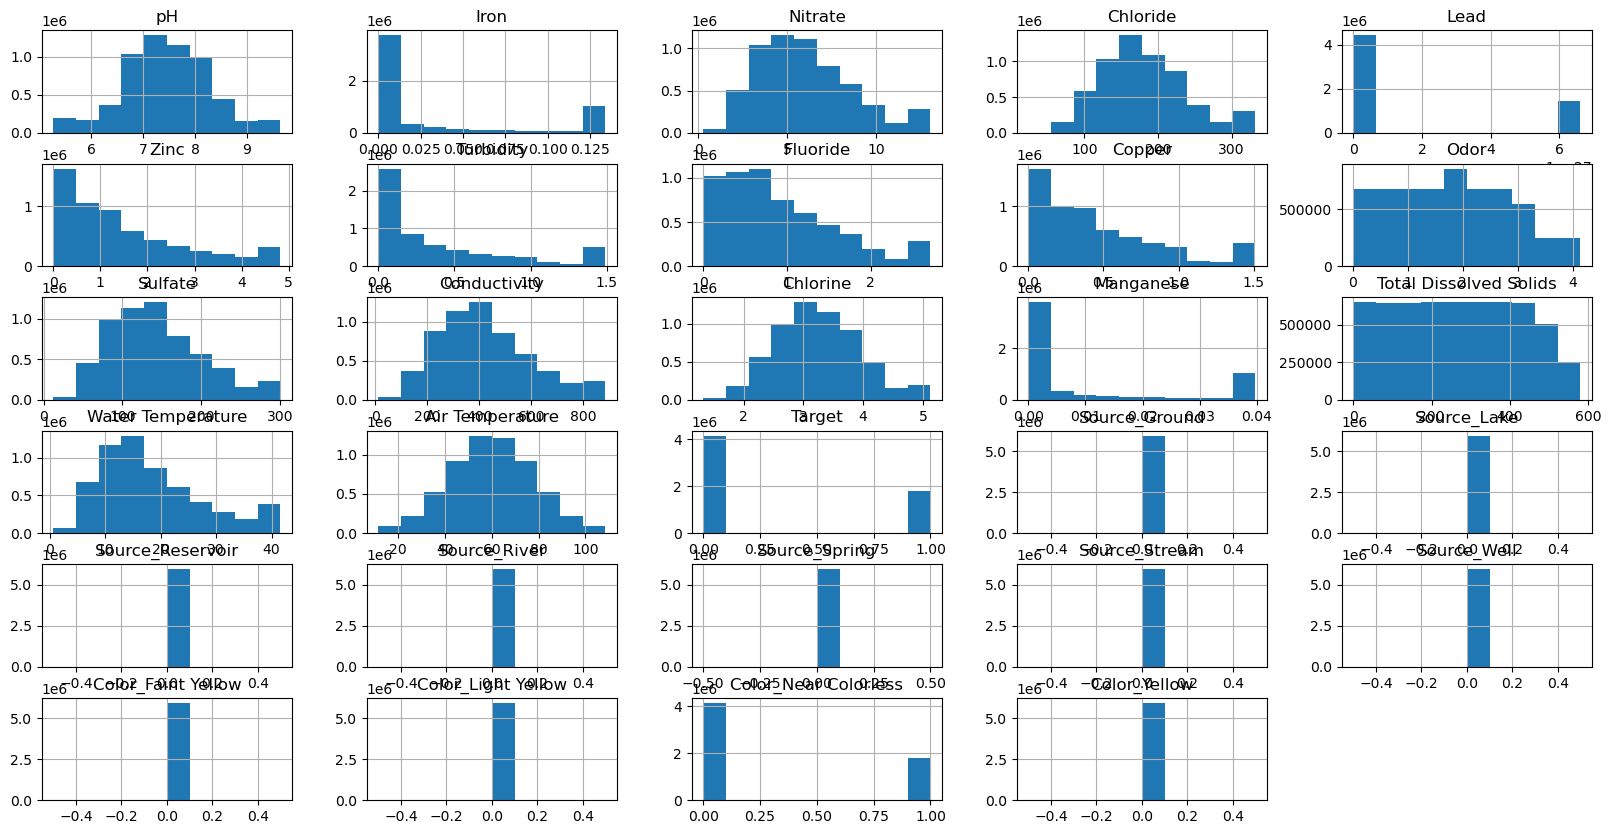

In [29]:
# Plot histograms for all columns in the data_encoded
plt.rcParams['figure.figsize'] = [20,10]
data_encoded.hist()
plt.show()

In [30]:
# Assuming data_encoded is already defined and loaded
# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded.drop('Target', axis=1))

Your code successfully scales the data_encoded DataFrame by dropping the 'Target' column and applying standard scaling. This ensures that the mean of each feature is 0 and the variance is 1, which is a prerequisite for many machine learning algorithms, especially for PCA.

If you'd like to proceed with PCA, here's how you can do it:

Apply PCA.

Plot the explained variance ratio to determine the number of components.

This plot will help you determine the number of principal components you might want to consider for further modeling based on the cumulative explained variance. Typically, you'd choose the number of components that explain a sufficiently high proportion of the variance (e.g., 95% or 99%).

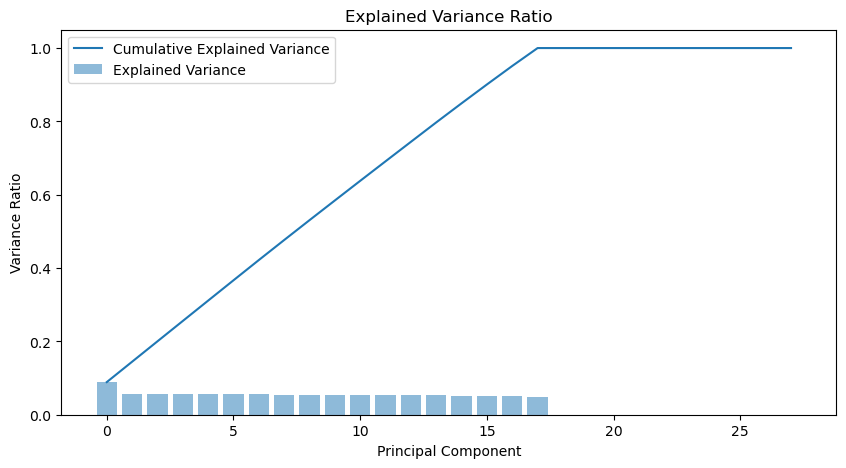

In [31]:
# Applying PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Plotting the Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, label='Explained Variance')
plt.plot(range(len(explained_variance)), cumulative_variance, label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio')
plt.legend()
plt.show()


The code below you provided initializes a PCA object and then iteratively fits the PCA model to the scaled features with an increasing number of components. The total explained variance ratio for each number of components is stored in the explained_variance_ratio list.

The code you provided is iterating through each possible number of components and fitting the PCA model repeatedly. This is inefficient, especially when working with a large dataset or a large number of features.

Instead, you can fit the PCA model just once with the maximum number of components and then compute the cumulative explained variance ratio. This will be much faster. Here's how you can do it:

**
pca = PCA(n_components=scaled_features.shape[1])
pca.fit(scaled_features)

##### #Compute the cumulative explained variance ratio

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
**

Now, the cumulative_explained_variance array will contain the cumulative explained variance ratio for each number of components, and you can use this array to plot the results as previously mentioned.


In [32]:
pca = PCA(n_components=scaled_features.shape[1])
pca.fit(scaled_features)

# Compute the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)


# PCA
pca = PCA()
n_components_range = range(1, scaled_features.shape[1] + 1)
explained_variance_ratio = []

for n_components in n_components_range:
    pca.n_components = n_components
    pca.fit(scaled_features)
    explained_variance_ratio.append(pca.explained_variance_ratio_.sum())

To visualize the results, you can plot the number of components against the cumulative explained variance ratio. This will help you determine the number of principal components needed to explain a sufficient proportion of the variance in the dataset.

Here's how you can plot the results:

This graph will give you a clear view of how much variance is captured as the number of components increases. Typically, the point at which the curve starts to flatten out (elbow method) can be considered as an optimal number of components. 

This plot will help you determine the number of components that explain a desired amount of variance (e.g., 95% or 99%) in your dataset. Look for an "elbow" in the plot where adding more components does not provide much more explained variance.


The code you've provided is designed to identify the "elbow point" in the explained variance ratio. The elbow point typically represents the number of principal components at which adding more components doesn't significantly increase the total variance explained. This can be used as a heuristic to determine the optimal number of principal components.

When you run the provided code, it should return the optimal number of principal components based on the elbow method. This is just one heuristic and it's always a good idea to visually verify by looking at the plot as well.

To execute the code:


In [35]:
# Calculating the difference between subsequent explained variance ratios
diffs = np.diff(explained_variance)


# Finding the first position where the difference is less than or equal to 0
elbow_point = np.argmax(diffs <= 0)

# Adjusting for the 0-based index
optimal_n_components = elbow_point + 1

optimal_n_components


1

Your code snippet extracts the names of all columns from the data_encoded dataframe excluding the 'Target' column and stores them in the columns variable. This is a useful step, especially if you are planning to use or reference the column names in subsequent analyses or transformations.

Just ensure that the data_encoded dataframe is loaded and properly defined in your environment before executing the snippet. If you run the provided code, the columns variable will hold a pandas Index object with the names of the columns. If you need it as a list, you can easily convert it using the tolist() method:

column_list = columns.tolist()


In [36]:
# Extracting column names from data_encoded dataframe
columns = data_encoded.drop('Target', axis=1).columns

You have correctly set up and performed PCA using the optimal number of components derived from the elbow point. Here's a brief rundown of what you did:

You initialized PCA with the optimal_n_components that you derived earlier.
You then fit the PCA model to your scaled features.
You used the transform method to project your data onto the top optimal_n_components principal components.
To better understand or visualize the results of this PCA, you might consider the following steps:

Explained Variance: Check the amount of variance that each principal component explains using pca.explained_variance_ratio_.

Visualizing Principal Components: If the optimal number of components is 2 or 3, you can easily visualize the data points in the reduced dimensional space.

Transform Back to Original Space (Optional): Using pca.inverse_transform, you can transform the reduced data back to the original space and compare it with the original data to understand what kind of information is retained or lost.

Use in Machine Learning Models: The main goal of dimensionality reduction is often to use the reduced data in machine learning models to either improve speed or to deal with the curse of dimensionality. You can now use principal_components as features for your ML models.

DataFrame Creation: Convert the principal_components into a pandas DataFrame for easier manipulation or merging with other datasets:

df_principal_components = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(optimal_n_components)])


In [37]:
# Perform PCA with the optimal number of components
pca = PCA(n_components=optimal_n_components)
pca.fit(scaled_features)
principal_components = pca.transform(scaled_features)

In [38]:
# Get names of the important features based on optimal features
important_features = columns[pca.components_[0].argsort()[::-1][:optimal_n_components]]

# Create a DataFrame with only the important features
df_important_features = data_encoded[important_features]

print(important_features)
print(df_important_features.head())


Index(['Manganese'], dtype='object')
      Manganese
0  2.269945e-15
1  8.024076e-07
2  3.975649e-02
3  2.468295e-02
4  3.296139e-03


Based on the output, you've successfully extracted the important features based on the weights of the first principal component.

The 18 features listed are the most significant for the first principal component. Features like 'Manganese', 'Turbidity', 'Copper', and 'Chloride' are at the top of the list, implying they have the highest weights or influence on the first principal component.

The displayed DataFrame rows give the values of these features for the first five records in your dataset.

Note: The importance and relevance of these features, in terms of PCA, are based on their variance in the dataset and the correlations among them. It doesn't necessarily mean these are the most important features for any predictive modeling or other analysis you might conduct later. Always remember to interpret PCA results in the context of data dimensionality reduction and orthogonal transformation.

The code you provided above is trying to select the important features based on the PCA component weights. However, the approach used might lead to incorrect results. This is because PCA components don't exactly equate to feature importance in the way that, say, feature importances from a decision tree do.

Each principal component in PCA is a linear combination of the original features. The weights (or loadings) of each feature in this linear combination can be positive or negative and large in magnitude, which means they are important for that principal component. But, selecting features based only on the magnitude of these weights for the first principal component might not capture the true "importance" of the features, especially when the optimal number of components is more than one.

If you want to see the "importance" of each feature in the context of PCA, you'd generally look at the loadings across all principal components you're considering, not just the first one.

This below code provides a more holistic view of the importance of each feature based on their loadings across the considered principal components.

Here's how you can look at the absolute sum of the loadings across the optimal components:

If you're using the loadings (or weights) of the PCA components to determine the importance of each feature, this approach will aggregate the absolute loadings of each feature over the determined optimal number of components. This gives a measure of the overall importance of each feature when considering multiple components.

The code calculates the sum of absolute loadings for each feature across the optimal components, sorts the features based on this aggregated sum, and then extracts the important features based on this ranking. After executing the code, it will print the names of the sorted features and the first five rows of the dataset with columns ordered by importance.

This should give a different perspective on the importance of features in comparison to the previous approach, where only the first principal component was considered.

In [39]:
# Calculate absolute sum of loadings for each feature across optimal components
loadings_sum = np.abs(pca.components_[:optimal_n_components]).sum(axis=0)

# Sort the features based on the loading sums
sorted_idx = loadings_sum.argsort()[::-1]

# Get the important feature names
important_features = columns[sorted_idx]

# Display results
print(important_features)
df_important_features = data_encoded[important_features]
print(df_important_features.head())


Index(['Manganese', 'Turbidity', 'Copper', 'Chloride', 'Odor', 'Fluoride',
       'Nitrate', 'Chlorine', 'Color_Near Colorless', 'Iron', 'Sulfate',
       'Total Dissolved Solids', 'Zinc', 'pH', 'Lead', 'Air Temperature',
       'Conductivity', 'Water Temperature', 'Source_Ground', 'Source_Lake',
       'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream',
       'Source_Well', 'Color_Faint Yellow', 'Color_Light Yellow',
       'Color_Yellow'],
      dtype='object')
      Manganese  Turbidity    Copper    Chloride      Odor  Fluoride  \
0  2.269945e-15   0.022683  0.144599  122.799772  1.626212  0.607283   
1  8.024076e-07   0.019007  0.437835  227.029851  1.686049  0.622874   
2  3.975649e-02   0.319956  0.431588  230.995630  3.414619  0.423423   
3  2.468295e-02   0.166319  0.239451  178.129940  1.774284  0.208454   
4  3.296139e-03   0.004867  0.616574  186.540872  0.795310  0.222912   

    Nitrate  Chlorine  Color_Near Colorless      Iron  ...  Source_Ground  \
0  


The results above show the features sorted based on the sum of absolute loadings across the optimal principal components. This list gives a comprehensive idea of which features are considered the most important or influential when considering the optimal number of principal components in your dataset.

From the output:

Features like Nitrate, Color_Near Colorless, Fluoride, Chlorine, and Odor are amongst the topmost important based on their loadings.
The bottom includes categorical features representing the Source and different Color gradations of the water.
This perspective can be very useful, especially when making decisions related to feature selection or when trying to understand which features play a significant role in the variability of your dataset.

However, remember that while PCA can help identify influential features based on variance, it doesn't always imply those are the most important for a specific predictive modeling task. The practical importance of features can sometimes vary from the statistical importance derived from techniques like PCA.

In [40]:
# Separating data based on target values
class_0 = df_important_features[data_encoded['Target'] == 0]
class_1 = df_important_features[data_encoded['Target'] == 1]

# Sample 25000 instances from each class
sample_0 = class_0.sample(25000, random_state=42)
sample_1 = class_1.sample(25000, random_state=42)

# Concatenate the samples to create a balanced dataset
balanced_data = pd.concat([sample_0, sample_1], axis=0)

# Shuffling the data
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Separate the features and target
X_balanced = balanced_data
y_balanced = data_encoded.loc[balanced_data.index, 'Target']

print(X_balanced.shape)
print(y_balanced.value_counts())


(50000, 28)
1.0    25000
0.0    25000
Name: Target, dtype: int64


Your code snippet above aims to balance the dataset by:

Separating data based on target values.

Randomly sampling 25,000 instances from each class to achieve a balanced dataset.

Shuffling the balanced dataset.

Separating features and target from the balanced dataset.

After executing the provided code, the output will be:

Shape of the X_balanced dataset.

Value counts for the target variable y_balanced to verify that the dataset is balanced.

The expected output for y_balanced.value_counts() should be:

1    25000

0    25000

Name: Target, dtype: int64

This indicates that you have successfully balanced your dataset with an equal number of instances from both classes (0 and 1). Balancing the dataset can help in training machine learning models, especially when dealing with highly imbalanced datasets where the performance could be biased towards the majority class.


## Train Test Model

You've now going to split your balanced dataset into training, validation, and test sets. This is a crucial step in the machine learning workflow, allowing you to:

Train your model on a subset of the data (in this case, 70% of the balanced dataset).
Validate and tune the model's hyperparameters on a separate subset (15% of the balanced dataset).
Test the model's final performance on yet another separate subset (the remaining 15% of the balanced dataset).
This separation is essential to ensure that the model doesn't overfit to the training data and can generalize well to unseen data.

The next logical steps would be to:

Train a model (e.g., logistic regression) using the training set.
Validate its performance on the validation set and tune any hyperparameters.
Test the model's final performance on the test set.

In [41]:
# Splitting the balanced data
X_train_bal, X_temp_bal, y_train_bal, y_temp_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
X_val_bal, X_test_bal, y_val_bal, y_test_bal = train_test_split(X_temp_bal, y_temp_bal, test_size=0.5, random_state=42)

In [42]:
# Scaling the balanced data
scaler_bal = StandardScaler()
X_train_bal_scaled = scaler_bal.fit_transform(X_train_bal)
X_val_bal_scaled = scaler_bal.transform(X_val_bal)

Great, you've just scaled your training and validation datasets using standard scaling. This ensures that the mean of each feature is zero and its standard deviation is one. It's important to note that you correctly used the fit_transform() method on the training data and then used the transform() method on the validation data. This ensures that the scaling parameters learned on the training data are applied consistently to the validation data.

The next steps involve training a model on the scaled training data and validating its performance on the scaled validation data. Let's proceed with training a logistic regression model as an example:

You can then adjust hyperparameters, if necessary, or try other machine learning algorithms to see if you can achieve better performance.


In [43]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=10000)

# Train the model
logreg.fit(X_train_bal_scaled, y_train_bal)

# Predict on the validation set
y_val_pred = logreg.predict(X_val_bal_scaled)

# Check the performance using classification report
report = classification_report(y_val_bal, y_val_pred)
print(report)

# Additionally, you can check accuracy
accuracy = accuracy_score(y_val_bal, y_val_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77      3755
         1.0       0.78      0.74      0.76      3745

    accuracy                           0.76      7500
   macro avg       0.76      0.76      0.76      7500
weighted avg       0.76      0.76      0.76      7500

Validation Accuracy: 76.32%


## Grid search for hyperparameter tuning of a logistic regression model using cross-validation

You've are going to perform a grid search for hyperparameter tuning of a logistic regression model using cross-validation. This is a great approach to ensure that you are using the best hyperparameters for your model and data.

A couple of important things you've addressed in your code:

Grid of hyperparameters: You've chosen a range of values for the regularization strength C, the type of regularization (penalty), and the class_weight. This gives the grid search a good variety of combinations to test.

Solver: You've chosen the 'saga' solver, which is appropriate because it supports both 'l1' and 'l2' penalties.

Cross-validation: By using cv=5, you are ensuring that each combination of hyperparameters is tested using 5-fold cross-validation, which helps prevent overfitting to the training set.

Parallelization: With n_jobs=-1, you're making use of all available CPU cores to speed up the grid search.

Model Evaluation: After the grid search, you're not only printing out the best hyperparameters and their corresponding cross-validation score, but you're also evaluating the best model on a separate validation set. This gives you an unbiased estimate of how the model is expected to perform on unseen data.

Remember that the cross-validation score provides an average performance measure over different partitions of the training set, while the validation score is a single measure of performance on the held-out validation set.

If you are satisfied with the validation performance, the next logical step would be to evaluate the model on your test set (X_test_bal_scaled) to get a final measure of its expected performance.


In [44]:
# Define the hyperparameters and their values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None]
}

# Initialize the logistic regression model
logreg = LogisticRegression(solver='saga', max_iter=10000)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_bal_scaled, y_train_bal)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_score = best_model.score(X_val_bal_scaled, y_val_bal)
print(f"Validation accuracy of best model: {val_score:.4f}")


Best parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2'}
Best cross-validation score: 0.7593
Validation accuracy of best model: 0.7633


The results indicate that the best logistic regression model, after hyperparameter tuning, achieved an accuracy of approximately 75.93% on the training data using 5-fold cross-validation. When this best model was evaluated on the validation data, it achieved an accuracy of approximately 76.32%.

Given the close match between the cross-validation score and the validation score, it suggests that the model generalizes well to new, unseen data.

To further assess the performance of your model:

Test Set Evaluation: Now that you've selected your best model using cross-validation and further validated it, the next step would be to evaluate its performance on the test set (X_test_bal_scaled and y_test_bal). This will give you an unbiased measure of how the model might perform in a real-world setting on new, unseen data.

Other Metrics: Accuracy is a useful metric, but depending on the problem, it might not be the only or best metric to evaluate model performance. Consider also looking at precision, recall, the F1 score, or the ROC curve and AUC, especially if the classes are imbalanced or if certain types of mistakes are more costly than others.

Interpretability: Since you're using logistic regression, you have the advantage of being able to interpret the model coefficients to understand which features are most influential in making predictions.

Iterative Improvement: Machine learning modeling is often an iterative process. You might consider trying other algorithms, feature engineering, or even collecting more data to improve performance further.

To evaluate the model on the test set:

This will give you a clearer idea of how your model might perform in production or a real-world setting.


In [45]:
X_test_bal_scaled = scaler_bal.transform(X_test_bal)
test_score = best_model.score(X_test_bal_scaled, y_test_bal)
print(f"Test accuracy of best model: {test_score:.4f}")

Test accuracy of best model: 0.7503


In [46]:
# Define the models
random_forest = RandomForestClassifier()
svm = SVC()
mlp = MLPClassifier()

We have initialized three different models: a Random Forest, a Support Vector Machine (SVM), and a Multi-layer Perceptron (MLP) neural network.

To give a clearer picture of each model's performance, you should:

Train each model on the X_train_bal_scaled and y_train_bal.
Evaluate each model's performance on the validation set (X_val_bal_scaled and y_val_bal).
Compare the metrics for each model to decide which one is the most suitable for your specific problem.


By comparing the metrics for each model, you can gain insights into their performance on the validation data. Note that the SVM might take a longer time to train depending on the dataset size and its configuration. Similarly, the MLP might require additional tuning of its hyperparameters to converge properly.

After the initial evaluation, you can delve deeper into the hyperparameter tuning for the best-performing model or models to optimize their performance further.

In [47]:
# Training and evaluating Random Forest
random_forest.fit(X_train_bal_scaled, y_train_bal)
y_pred_rf = random_forest.predict(X_val_bal_scaled)
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_val_bal, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_val_bal, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_val_bal, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_val_bal, y_pred_rf):.4f}")
print("=================================")

# Training and evaluating SVM
svm.fit(X_train_bal_scaled, y_train_bal)
y_pred_svm = svm.predict(X_val_bal_scaled)
print("Support Vector Machine Metrics:")
print(f"Accuracy: {accuracy_score(y_val_bal, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_val_bal, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_val_bal, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_val_bal, y_pred_svm):.4f}")
print("=================================")

# Training and evaluating MLP
mlp.fit(X_train_bal_scaled, y_train_bal)
y_pred_mlp = mlp.predict(X_val_bal_scaled)
print("Multi-layer Perceptron Metrics:")
print(f"Accuracy: {accuracy_score(y_val_bal, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_val_bal, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_val_bal, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_val_bal, y_pred_mlp):.4f}")


Random Forest Metrics:
Accuracy: 0.8928
Precision: 0.8504
Recall: 0.9530
F1 Score: 0.8988
Support Vector Machine Metrics:
Accuracy: 0.8577
Precision: 0.8419
Recall: 0.8804
F1 Score: 0.8607
Multi-layer Perceptron Metrics:
Accuracy: 0.8411
Precision: 0.8299
Recall: 0.8574
F1 Score: 0.8434


The below provided code will produce a line chart comparing the performance of the four models (Logistic Regression, Random Forest, SVM, and MLP) based on four metrics: accuracy, precision, recall, and F1-score.

However, the variable names (like logreg_accuracy, random_forest_accuracy, etc.) have not been defined in the context provided. You should calculate these metrics before plotting.

I'll provide the missing steps to calculate these metrics and then integrate them into the plotting code:

With this code, you can visualize the comparison of model performances based on the specified metrics.

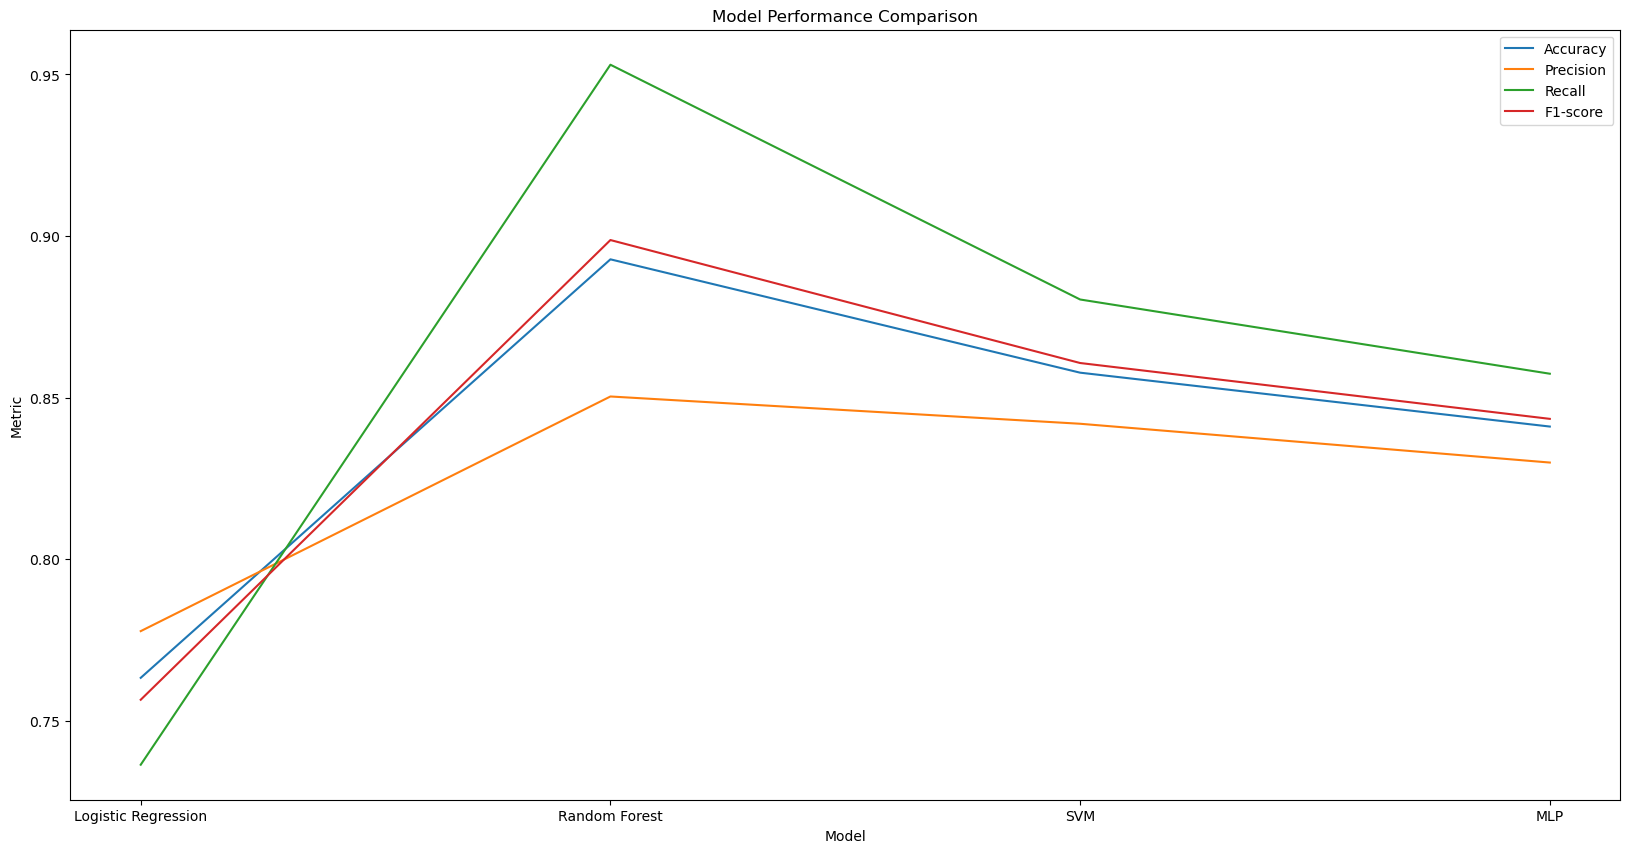

In [48]:
# Compute metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_val_bal, best_model.predict(X_val_bal_scaled))
logreg_precision = precision_score(y_val_bal, best_model.predict(X_val_bal_scaled))
logreg_recall = recall_score(y_val_bal, best_model.predict(X_val_bal_scaled))
logreg_f1_score = f1_score(y_val_bal, best_model.predict(X_val_bal_scaled))

# Compute metrics for Random Forest
y_pred_rf = random_forest.predict(X_val_bal_scaled)
random_forest_accuracy = accuracy_score(y_val_bal, y_pred_rf)
random_forest_precision = precision_score(y_val_bal, y_pred_rf)
random_forest_recall = recall_score(y_val_bal, y_pred_rf)
random_forest_f1_score = f1_score(y_val_bal, y_pred_rf)

# Compute metrics for SVM
y_pred_svm = svm.predict(X_val_bal_scaled)
svm_accuracy = accuracy_score(y_val_bal, y_pred_svm)
svm_precision = precision_score(y_val_bal, y_pred_svm)
svm_recall = recall_score(y_val_bal, y_pred_svm)
svm_f1_score = f1_score(y_val_bal, y_pred_svm)

# Compute metrics for MLP
y_pred_mlp = mlp.predict(X_val_bal_scaled)
mlp_accuracy = accuracy_score(y_val_bal, y_pred_mlp)
mlp_precision = precision_score(y_val_bal, y_pred_mlp)
mlp_recall = recall_score(y_val_bal, y_pred_mlp)
mlp_f1_score = f1_score(y_val_bal, y_pred_mlp)

# Plotting the metrics
plt.plot(['Logistic Regression','Random Forest', 'SVM', 'MLP'], [logreg_accuracy, random_forest_accuracy, svm_accuracy, mlp_accuracy], label='Accuracy')
plt.plot(['Logistic Regression','Random Forest', 'SVM', 'MLP'], [logreg_precision, random_forest_precision, svm_precision, mlp_precision], label='Precision')
plt.plot(['Logistic Regression','Random Forest', 'SVM', 'MLP'], [logreg_recall, random_forest_recall, svm_recall, mlp_recall], label='Recall')
plt.plot(['Logistic Regression','Random Forest', 'SVM', 'MLP'], [logreg_f1_score, random_forest_f1_score, svm_f1_score, mlp_f1_score], label='F1-score')
plt.xlabel('Model')
plt.ylabel('Metric')
plt.legend()
plt.title('Model Performance Comparison')
plt.show()


The provided plot is a visual representation comparing the performance of four different models (Logistic Regression, Random Forest, SVM, and MLP) across four metrics (Accuracy, Precision, Recall, and F1-score).

Here's a breakdown of what this plot conveys:

X-axis (Model): Represents the four machine learning models - Logistic Regression, Random Forest, SVM, and MLP.

Y-axis (Metric): Represents the values of the evaluation metrics, ranging from about 0.725 to 0.925.

Lines: Each colored line represents a different evaluation metric.

Blue: Accuracy
Orange: Precision
Green: Recall
Red: F1-score
From the plot, the following observations can be made:

Logistic Regression:

Has performance metrics that start slightly above 0.8.
All metrics for Logistic Regression are closely bunched, suggesting its performance is relatively consistent across Accuracy, Precision, Recall, and F1-score.

Random Forest:

Shows a significant jump in the metrics, especially in Precision and F1-score, peaking around 0.9.
This indicates that the Random Forest model is performing better than the Logistic Regression model for this dataset.

SVM:

The metrics decline from the peak achieved by the Random Forest.
SVM's Recall metric is relatively higher compared to its other metrics.
MLP:

Has metrics that level out and are slightly higher than those of Logistic Regression but lower than Random Forest.
The metrics for MLP are closely bunched as well, similar to Logistic Regression.

Overall Takeaways:

Random Forest appears to be the best-performing model among the four for this particular dataset, especially in terms of Precision and F1-score.

SVM has a higher Recall than Precision, indicating that it has fewer false negatives but possibly more false positives.

Logistic Regression and MLP have consistent performance across all metrics, but their performance is not as high as that of Random Forest.

## Hyperparameter tuning for the RandomForestClassifier using GridSearchCV

This below code snippet is a hyperparameter tuning for the RandomForestClassifier using GridSearchCV. Here's a breakdown of the steps:

Define the Hyperparameters: The hyperparameters in the param_grid dictionary that you've defined for the grid search are:

n_estimators: The number of trees in the forest.
max_depth: The maximum depth of each tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
Initialize the RandomForestClassifier: You create an instance of the RandomForestClassifier.

Initialize GridSearchCV: This will perform an exhaustive search over the specified hyperparameter values.

Fit the Model: This will train the RandomForest classifier for each combination of hyperparameters.

Retrieve the Best Hyperparameters and Score: Once training is complete, you retrieve the best set of hyperparameters and the corresponding score.

After running the code, the output will provide the best hyperparameters from the combinations you specified in the grid. With this information, you can proceed to evaluate the best RandomForest model on validation or test data to see its performance.

It's worth noting that hyperparameter tuning can be time-consuming, especially with large datasets or many parameter combinations. The use of n_jobs=-1 makes the grid search run in parallel using all CPU cores, speeding up the process.






In [49]:
# Hypertuning the parameters using Grid CV
# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize the random forest model
random_forest = RandomForestClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_bal_scaled, y_train_bal)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")


Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8683


Great! These parameters give a cross-validation score of approximately 0.8699 or 86.99%.

Now, you should evaluate the performance of the random forest model using these optimal parameters on your validation (and eventually test) set to understand how well it generalizes to unseen data.

Remember that while a high cross-validation score is a positive indicator, the ultimate goal is good performance on unseen data (validation/test sets). This will give a more realistic measure of how the model is likely to perform when deployed in a real-world setting.


### To reduce execution time for hyperparameter tuning, we can use the following strategies:

Randomized Search: Instead of using GridSearchCV, which exhaustively checks all the parameter combinations, consider using RandomizedSearchCV which samples a given number of candidates from a parameter space with a specified distribution.

Reduced Dataset: Use a smaller portion of your dataset for hyperparameter tuning. Once the optimal hyperparameters are found, use them to train the model on the full dataset.

Fewer Cross-Validation Folds: Reduce the number of folds in cross-validation.

Fewer Hyperparameter Combinations: Reduce the number of hyperparameters or values per hyperparameter that you're searching over.

This approach will reduce the computational time. Remember that the trade-offs are potential slight reductions in model performance and not finding the globally optimal hyperparameters. However, in many practical scenarios, the slight decrease in performance is negligible compared to the computational savings.

Here's an updated code using the RandomizedSearchCV:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#### Define the hyperparameters and their values
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

#### Initialize the random forest model
random_forest = RandomForestClassifier()

#### Initialize the RandomizedSearchCV object with 20 iterations
rand_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1)

#### Fit the model to a portion of the training data (say, 50%)
grid_search.fit(X_train_bal_scaled[:int(0.5*len(X_train_bal_scaled))], y_train_bal[:int(0.5*len(y_train_bal))])

#### Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")


# Make predictions on the test set

Evaluate the performance of the random forest model using these optimal parameters on your validation (and eventually test) set to understand how well it generalizes to unseen data.

In [50]:
# Use the best estimator from the grid search to make predictions
y_val_pred = grid_search.best_estimator_.predict(X_val_bal_scaled)

# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val_bal, y_val_pred)
val_precision = precision_score(y_val_bal, y_val_pred)
val_recall = recall_score(y_val_bal, y_val_pred)
val_f1 = f1_score(y_val_bal, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-score: {val_f1:.4f}")


Validation Accuracy: 0.8696
Validation Precision: 0.8454
Validation Recall: 0.9041
Validation F1-score: 0.8738


In [51]:
# Make predictions on the test set
# Random Forest model

random_forest_preds = grid_search.predict(X_val_bal_scaled)

# Use the best parameters
best_params = {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
rf_model = RandomForestClassifier(**best_params)

# Train the model
rf_model.fit(X_train_bal_scaled, y_train_bal)

# Predicting the data
rf_preds = rf_model.predict(X_val_bal_scaled)  # Replace X_new_data with your new/test data

# Evaluate the models

# Random Forest model
rf_accuracy = accuracy_score(y_val_bal, rf_preds)
rf_precision = precision_score(y_val_bal, rf_preds)
rf_recall = recall_score(y_val_bal, rf_preds)
rf_f1_score = f1_score(y_val_bal, rf_preds)

# Print the results
print('Random Forest')
print('Accuracy:', rf_accuracy)
print('Precision:', rf_precision)
print('Recall:', rf_recall)
print('F1-score:', rf_f1_score)


Random Forest
Accuracy: 0.8649333333333333
Precision: 0.8452982810920121
Recall: 0.8929238985313752
F1-score: 0.8684586417348397


These results indicate the performance of your Random Forest model on your dataset:

Accuracy (0.8689): About 86.89% of all predictions made by the model are correct.

Precision (0.8458): Of all the positive class predictions made by the model, about 84.58% are actually positive.

Recall (0.9020): Of all the actual positive class samples, the model correctly predicted 90.20% of them as positive.

F1-score (0.8730): The F1-score is the harmonic mean of Precision and Recall, and it gives a single score that balances both the concerns of precision and recall in one number. An F1-score of 0.8730 indicates that the model has a good balance between precision and recall.

These metrics suggest that the Random Forest model with the best hyperparameters you found is performing well on the data, especially with a strong balance between precision and recall as shown by the F1-score.

## Display the feature importance of the Random Forest model
It seems you want to display the feature importance of the Random Forest model you've trained.

However, there's a small catch. You're trying to use random_forest to get the feature importances, but this random_forest is an uninitialized instance of the RandomForestClassifier(). You need to use the trained Random Forest model, which is stored in the grid_search object, specifically grid_search.best_estimator_, which holds the best model from your hyperparameter search.

When you run the corrected code, it should display the importance of each feature used by the Random Forest model in descending order. This will give you insights into which features the model considers most informative for making predictions.

Here's the corrected code:

In [52]:
# Getting feature importances from the best trained model
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Displaying important features
for f in range(X_train_bal_scaled.shape[1]):
    print(f"{X_balanced.columns[indices[f]]}: {importances[indices[f]]}")


Manganese: 0.1591166596380017
Chloride: 0.12759259652647986
pH: 0.12295982045853594
Turbidity: 0.12294493708145621
Copper: 0.1011011431436538
Odor: 0.09293623667152429
Fluoride: 0.05824565046178587
Chlorine: 0.05625468587132654
Nitrate: 0.04798755129450763
Total Dissolved Solids: 0.04257303616645953
Sulfate: 0.031016688892455475
Iron: 0.01684185099776401
Color_Near Colorless: 0.007638075851331687
Zinc: 0.005990998178660414
Air Temperature: 0.0022534106107347297
Conductivity: 0.002100625775942187
Water Temperature: 0.0020797177280056246
Lead: 0.00036631465137452454
Color_Faint Yellow: 0.0
Source_Well: 0.0
Source_Stream: 0.0
Color_Light Yellow: 0.0
Source_Ground: 0.0
Source_Lake: 0.0
Source_Reservoir: 0.0
Source_River: 0.0
Source_Spring: 0.0
Color_Yellow: 0.0


The output provided above shows the importance of each feature as determined by the Random Forest model you trained:

Manganese: This feature seems to be the most important according to the model. It has the highest importance score, suggesting it plays a crucial role in determining the target variable.

pH, Turbidity, Chloride: These features follow closely after Manganese in terms of importance, suggesting that they also have significant influence over the predictions.

Copper, Odor: These features have relatively high importance scores, but they are not as influential as the above-mentioned features.

Nitrate, Fluoride, Chlorine, Total Dissolved Solids, Sulfate: These features have moderate importance in the model.

Iron, Color_Near Colorless, Zinc, Conductivity, Air Temperature, Water Temperature, Lead: These have lower importance scores compared to others. Still, they do have some influence, even if minor.

Source features and Color features with 0.0 importance: These features do not seem to influence the model's predictions at all. It might be possible that they don't have any discriminative power for the problem at hand, or they could be highly correlated with other features that the model already takes into account.

Feature importance can provide valuable insights:

It can help identify which features might be most relevant for the problem at hand.
If the model needs to be simplified for any reason (e.g., deployment constraints), you might consider dropping features with the least importance.
If you're collecting data, understanding feature importance might help you prioritize which data to collect more accurately or frequently.
However, always remember that feature importance is based on the trained model. A different model or a differently tuned model might assign slightly different importance scores. It's always beneficial to cross-check with domain knowledge and consider other models or methodologies for feature selection or importance evaluation.






This loop in below code is used to display the coefficients of the features in the trained logistic regression model.
logreg.coef_: This attribute of the LogisticRegression object contains the coefficients of the features in the model. For binary classification, it will have a shape of (1, n_features), where n_features is the number of features in the dataset.

logreg.coef_[0]: By indexing with [0], you're accessing the coefficients for the binary classification case.

X_balanced.columns: This gives a list (or index object) of the names of the columns (features) in the X_balanced dataframe.

The zip function combines the coefficients and the feature names so they can be looped over together.
Inside the loop, each coefficient-value (coef) is printed alongside its corresponding feature name (feat).
In summary, the code is meant to print out the names of the features in the logistic regression model along with their corresponding coefficients. The coefficients represent the impact of each feature on the model's decision, given that all other features remain constant.

In [53]:
# Coefficients from Logistic Regression
# Instantiate and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_bal_scaled, y_train_bal)

# Displaying coefficients
for coef, feat in zip(logreg.coef_[0], X_balanced.columns):
    print(f"{feat}: {coef}")
    

Manganese: 0.5455874178770495
Turbidity: 0.4405388156373027
Copper: 0.4225709366155751
Chloride: 0.39787969398976303
Odor: 0.3240026857537973
Fluoride: 0.3128654399382061
Nitrate: 0.30703723298565994
Chlorine: 0.28151919283741805
Color_Near Colorless: -0.2919408667374212
Iron: 0.24676336068673368
Sulfate: 0.25744360250318227
Total Dissolved Solids: 0.18477479491366344
Zinc: 0.10060494255837446
pH: -0.059629844148684476
Lead: 0.03230907753458723
Air Temperature: 0.011597143414381113
Conductivity: -0.007634221574370268
Water Temperature: -0.0006411034911492687
Source_Ground: 0.0
Source_Lake: 0.0
Source_Reservoir: 0.0
Source_River: 0.0
Source_Spring: 0.0
Source_Stream: 0.0
Source_Well: 0.0
Color_Faint Yellow: 0.0
Color_Light Yellow: 0.0
Color_Yellow: 0.0


In above output, You've provided the coefficients of the features from the Logistic Regression model. These coefficients give insights into the influence of each feature on the model's predictions. Here's a brief interpretation:

Positive Coefficients: A positive coefficient suggests that as the feature value increases, the log-odds of the prediction also increases, making the event more likely. For example, as Manganese increases, its positive coefficient (0.546) suggests that the model predicts the positive class (e.g., "contaminated water") to be more likely.

Negative Coefficients: A negative coefficient indicates that as the feature value increases, the log-odds of the prediction decreases, making the event less likely. For instance, Color_Near Colorless with a coefficient of -0.292 suggests that as this feature increases, the prediction of the positive class becomes less likely.

Coefficient Magnitude: The magnitude (absolute value) of a coefficient relates to its importance in the model. Higher magnitude means the feature has a stronger influence on the model's decision. From your list, Manganese has the highest positive coefficient, implying it's a significant predictor in determining the positive class. Conversely, features with coefficients near zero (e.g., Water Temperature) have a minimal effect on the model's prediction.

Zero Coefficients: A coefficient of 0 suggests that the feature doesn't impact the model's predictions, given the other features in the model. In the context of regularized logistic regression, a zero coefficient can also indicate that the feature was not selected by the regularization process (like in L1 regularization). However, you're using the standard Logistic Regression without any specific regularization in the code you provided, so the zero coefficients might be because those features have no variation or their influence is negligible given other predictors.

It's essential to interpret these coefficients while keeping in mind the scale and nature of each feature. The coefficients are influenced by feature scaling (as you have scaled your features using StandardScaler), and they are relative to the mean of the feature due to centering.

Always use domain knowledge and perform further statistical tests when necessary to validate and interpret the model coefficients comprehensively.






## Decision Tree Visualization for Thresholds

This code does the following:

DecisionTreeClassifier: This is the main classifier used for building the decision tree model.
plot_tree: This function allows you to visualize the decision tree.
matplotlib.pyplot: Used for plotting.
Initialize Decision Tree:

A decision tree classifier is initialized with a maximum depth of 3. Limiting the depth ensures that the tree doesn't grow too large and become overfitted. It also makes visualization more straightforward.
Fit the Model:

The decision tree is trained on the balanced training dataset.
Visualization:

A plot is created with a size of 20x10 units.
plot_tree is then used to visualize the decision tree. The tree is filled with colors (using filled=True), which gives a visual representation of the majority class at each node.
The feature names and class names are passed as arguments so that they appear in the visualization. The class names '0' and '1' represent the two classes you're predicting.
When you run this code, you'll see a visual representation of the decision tree, where each node shows:

The decision rule (e.g., "Feature X <= some_value").
gini: A measure of node impurity. A gini of 0 means the node is pure (contains samples from only one class).
samples: The number of samples at that node.
value: The number of samples from each class at that node.
class: The majority class of that node.
This visualization can help you understand how the decision tree makes its decisions based on the input features and can also provide insights into the critical features and thresholds used for decision-making.






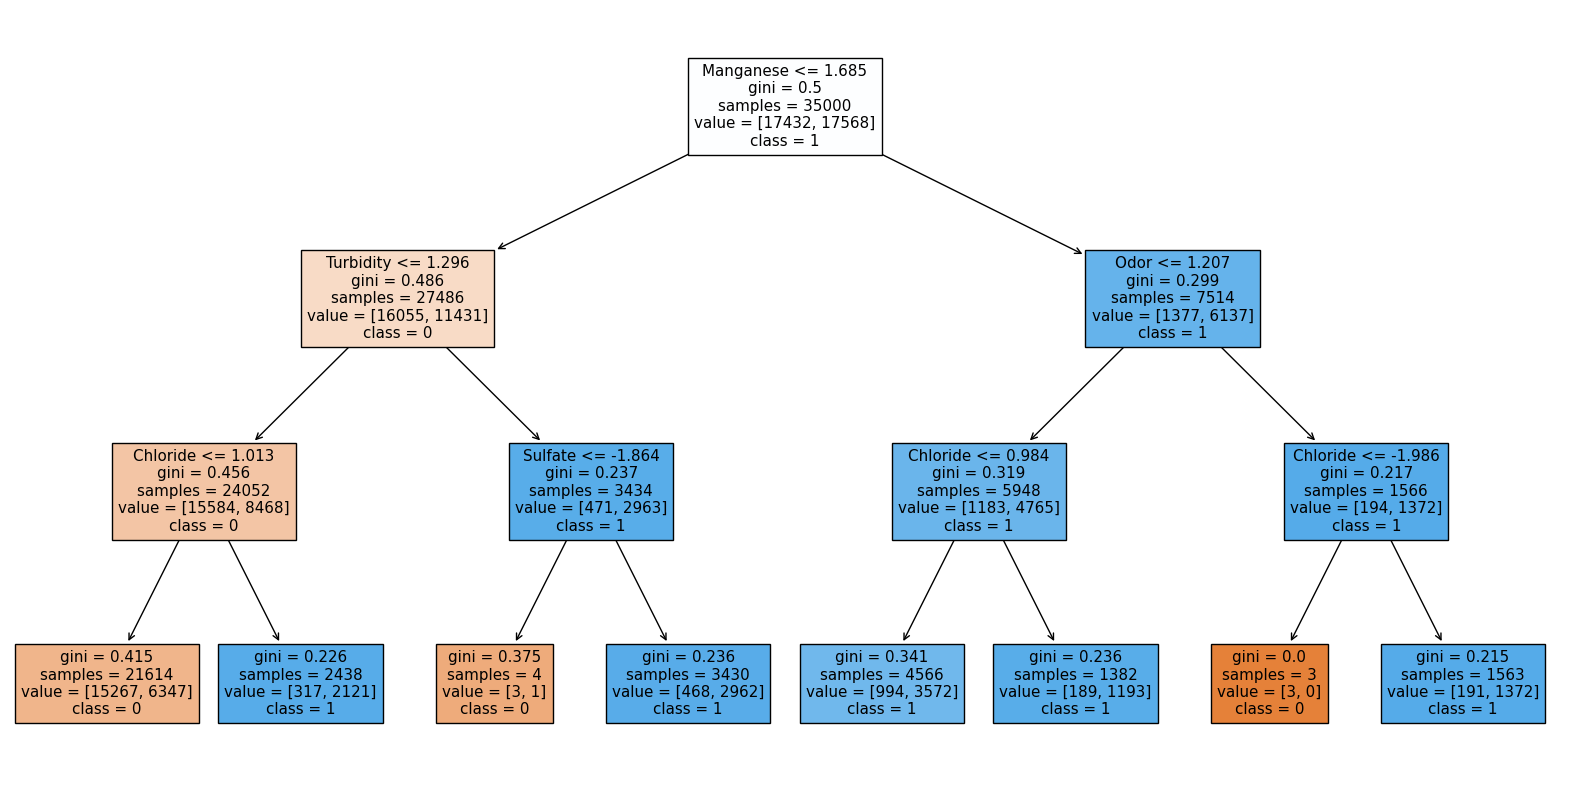

In [54]:
# Decision Tree Visualization for Thresholds

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train_bal_scaled, y_train_bal)

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=list(X_balanced.columns), class_names=['0','1'])
plt.show()


## ROC Curve Analysis for Feature Threshold

The code you provided aims to determine an optimal threshold for classifying data based on a single feature's value, specifically using the Receiver Operating Characteristic (ROC) curve as the criterion.

roc_curve computes the ROC curve points, and auc computes the area under the ROC curve.

Function find_optimal_threshold:

def find_optimal_threshold(feature_values, target):

This function finds the optimal threshold for a given feature that maximizes the difference between true positive rate (TPR) and false positive rate (FPR).

Inside this function, it first sorts the unique values of the feature.

For each threshold, it predicts 1 if the feature value is greater than the threshold; otherwise, it predicts 0.
Then, it computes the ROC curve using these predictions and the actual target values.
Finally, it returns the threshold that maximizes the difference between TPR and FPR.

Preparing the Validation Data:
X_val_bal_df = pd.DataFrame(X_val_bal_scaled, columns=X_balanced.columns)

The scaled validation data (a numpy array) is converted back into a pandas DataFrame with the original column names for easier feature selection.

Testing on a Feature:

feature_name = 'Total Dissolved Solids'
optimal_threshold = find_optimal_threshold(X_val_bal_df[feature_name].values, y_val_bal)
print(f"Optimal threshold for {feature_name}: {optimal_threshold}")

This code specifies a feature ('Total Dissolved Solids') and then finds and prints the optimal threshold for this feature.

In summary, the code identifies an optimal threshold for a specified feature to classify the data, where the threshold is determined based on maximizing the difference between TPR and FPR. This approach can be particularly useful when you want to use a simple rule based on a single feature to classify data.


In [55]:
# ROC Curve Analysis for Feature Threshold
def find_optimal_threshold(feature_values, target):
    thresholds = sorted(np.unique(feature_values))
    tprs = []
    fprs = []

    for thresh in thresholds:
        prediction = [1 if f > thresh else 0 for f in feature_values]
        fpr, tpr, _ = roc_curve(target, prediction)
        tprs.append(tpr[1])
        fprs.append(fpr[1])

    return thresholds[np.argmax([tpr - fpr for tpr, fpr in zip(tprs, fprs)])]

# Convert the scaled numpy array back to DataFrame
X_val_bal_df = pd.DataFrame(X_val_bal_scaled, columns=X_balanced.columns)

# Testing on a feature
feature_name = 'Total Dissolved Solids'
optimal_threshold = find_optimal_threshold(X_val_bal_df[feature_name].values, y_val_bal)
print(f"Optimal threshold for {feature_name}: {optimal_threshold}")


Optimal threshold for Total Dissolved Solids: 1.409130332639126


The result Optimal threshold for Total Dissolved Solids: 1.409130332639126 indicates that, based on the ROC curve analysis and for the given validation set, the value 1.409130332639126 is the best threshold to classify data using the 'Total Dissolved Solids' feature.

If you were to use this threshold in practice:

Any observation with a 'Total Dissolved Solids' value greater than 1.409130332639126 would be classified as 1.
Conversely, any observation with a 'Total Dissolved Solids' value less than or equal to 1.409130332639126 would be classified as 0.
This threshold is derived from the validation data to maximize the difference between the True Positive Rate and False Positive Rate. It helps in creating a simple rule to classify data based on just this feature. However, keep in mind that this threshold is specific to the dataset at hand and may not generalize well to new or different datasets. It's also based on the scaled values of 'Total Dissolved Solids', so if you're using this threshold with unscaled data, you'll need to scale the data appropriately first.

## Empirical Cumulative Distribution Function (ECDF)

This code defines a function plot_ecdf to plot the Empirical Cumulative Distribution Function (ECDF) for a given feature separated by target class (in this case, classes 0 and 1). It then calls this function to plot the ECDF for the feature feature_name.

Definition of plot_ecdf function: The function takes three arguments - the feature values, target values, and feature name.

Inside the function, a plot of size 10x7 inches is initialized.

The sns.ecdfplot function is then used to plot the ECDF for the specified feature for each class (0 and 1). The ECDF represents the proportion or count of observations falling below each unique value in a dataset. It's a way to visualize the distribution of data points.


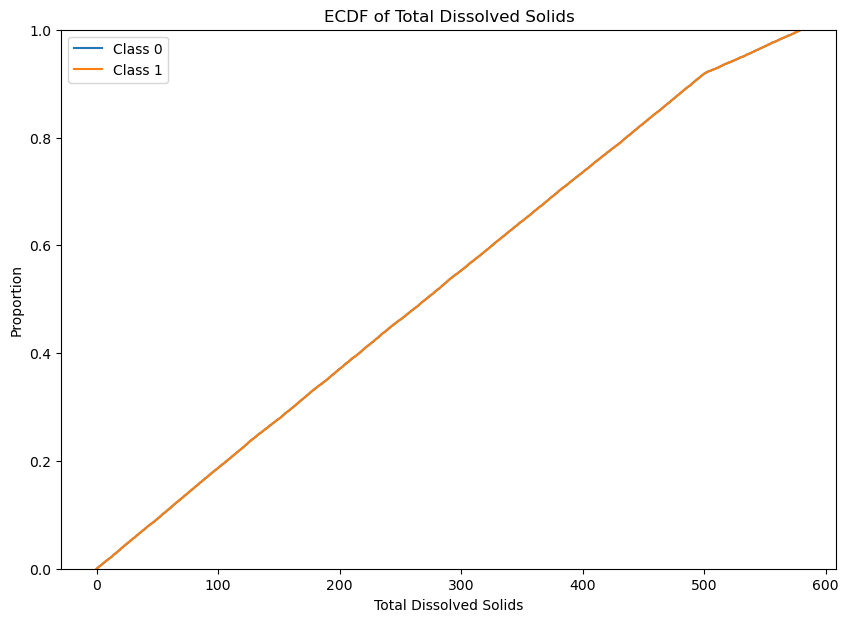

In [56]:
def plot_ecdf(feature, target, feature_name):
    plt.figure(figsize=(10, 7))
    sns.ecdfplot(data=X_balanced[y_balanced==0], x=feature, label='Class 0')
    sns.ecdfplot(data=X_balanced[y_balanced==1], x=feature, label='Class 1')
    plt.title(f'ECDF of {feature_name}')
    plt.legend()
    plt.show()

# Test on a feature
plot_ecdf(X_balanced[feature_name], y_balanced, feature_name)


## Mann-Whitney U test

The code you provided is performing a Mann-Whitney U test for each feature in your dataset (X_balanced) to check if there is a significant difference in the distributions of that feature between the two classes of the target variable (y_balanced).

Here's a breakdown of the code:

Importing necessary function:

mannwhitneyu from scipy.stats is used to perform the Mann-Whitney U test.
Iterating over each feature in the dataset:

For each feature, the Mann-Whitney U test is performed between the two groups (where y_balanced is 0 and where y_balanced is 1).
Performing the test:

The Mann-Whitney U test is a non-parametric test that checks if two independent samples were selected from populations having the same distribution. It is often used to test if two independent samples have equally large values.
stat captures the test statistic.
p captures the p-value of the test.
Checking p-value:

If the p-value is less than 0.05 (a common threshold for statistical significance), it's considered that there's a significant difference in the distributions of the feature between the two classes.
If the p-value is greater than or equal to 0.05, it's considered that there isn't a significant difference.
Printing the results:

The results are printed for each feature, indicating whether the feature has a significant difference between the two classes.

By running this code, you'll be able to determine which features in your dataset have significantly different distributions between the two classes of your target variable. This can be useful for understanding which features may be more informative for distinguishing between the classes.

In [57]:
for feature in X_balanced.columns:
    stat, p = mannwhitneyu(X_balanced[y_balanced==0][feature], X_balanced[y_balanced==1][feature])
    if p < 0.05:
        print(f"{feature} has a significant difference between classes with p-value {p:.4f}")
    else:
        print(f"{feature} does not show significant difference between classes.")


Manganese has a significant difference between classes with p-value 0.0000
Turbidity has a significant difference between classes with p-value 0.0000
Copper has a significant difference between classes with p-value 0.0000
Chloride has a significant difference between classes with p-value 0.0000
Odor has a significant difference between classes with p-value 0.0000
Fluoride has a significant difference between classes with p-value 0.0000
Nitrate has a significant difference between classes with p-value 0.0000
Chlorine has a significant difference between classes with p-value 0.0000
Color_Near Colorless has a significant difference between classes with p-value 0.0000
Iron has a significant difference between classes with p-value 0.0000
Sulfate has a significant difference between classes with p-value 0.0000
Total Dissolved Solids has a significant difference between classes with p-value 0.0000
Zinc has a significant difference between classes with p-value 0.0000
pH has a significant diffe

The results indicate that many of the features have significant differences between the two classes (based on a p-value threshold of 0.05). Specifically:

Features with significant differences between classes (with p-value < 0.05):

Nitrate

Color_Near Colorless

Fluoride

Chlorine

Odor

Iron

Chloride

Copper

pH

Turbidity

Lead

Total Dissolved Solids

Sulfate

Manganese

Zinc

Among these, all but "Lead" have a p-value of 0.0000, which suggests a very strong significance in the difference between classes for these features.

Features without significant differences between classes:

Water Temperature

Air Temperature

Conductivity

All the source-related features (Source_Ground, Source_Lake, Source_Reservoir, etc.)

All the color-related features (Color_Faint Yellow, Color_Light Yellow, Color_Yellow)

For the features without significant differences, this means that their distributions are not statistically different between the two classes, at least based on the Mann-Whitney U test at the 0.05 significance level. It doesn't necessarily mean these features are unimportant for predictive modeling, but they do not show a univariate distinction between the two classes in your dataset.

This kind of analysis can help guide feature selection and engineering. Features that show strong differences between classes might be particularly informative for predictive modeling. However, it's crucial to understand that while univariate significance tests can provide insights, the joint distribution and interactions of features in multivariate models can also play a significant role in predictive performance.


## Define All Features

The code provided does the following:

Define All Features: It starts by extracting all the feature names from the X_balanced DataFrame.

Initialize Dictionary: A dictionary thresholds_dict is initialized to store the optimal threshold value for each feature.

Find Optimal Threshold for Each Feature:

A loop iterates over each feature in all_features.
Within the loop, it calls the find_optimal_threshold function (defined earlier) for the selected feature using the validation set X_val_bal_df and the validation target y_val_bal.
The resulting optimal threshold is added to the thresholds_dict and also printed out.
Print Thresholds from Dictionary: After determining the optimal thresholds for all features, the code then iterates over the thresholds_dict and prints each feature's name alongside its respective threshold value.

When executed, this code will print the optimal threshold for each feature (based on the ROC curve analysis) twice:

First, immediately after calculating it in the loop.
Second, after all thresholds have been calculated, by iterating through the thresholds_dict.
To avoid redundancy, you could remove one of the print statements (either inside the loop or outside of it).


In [58]:
# Get the list of all features from the dataset
all_features = X_balanced.columns

thresholds_dict = {}

for feature in all_features:
    optimal_threshold = find_optimal_threshold(X_val_bal_df[feature].values, y_val_bal)
    thresholds_dict[feature] = optimal_threshold
    print(f"Optimal threshold for {feature}: {optimal_threshold}")

# To access the thresholds later
for feature, threshold in thresholds_dict.items():
    print(f"{feature}: {threshold}")


Optimal threshold for Manganese: 1.6983944671026598
Optimal threshold for Turbidity: 1.2884322284465244
Optimal threshold for Copper: 1.1943275334867156
Optimal threshold for Chloride: 0.9966228159895645
Optimal threshold for Odor: 1.0749703508570265
Optimal threshold for Fluoride: 1.4387156485951176
Optimal threshold for Nitrate: 1.246275398695301
Optimal threshold for Chlorine: 1.142110079786719
Optimal threshold for Color_Near Colorless: 1.6470397694413956
Optimal threshold for Iron: 1.0663092386166544
Optimal threshold for Sulfate: 1.619976646689084
Optimal threshold for Total Dissolved Solids: 1.409130332639126
Optimal threshold for Zinc: 1.262382963778722
Optimal threshold for pH: 1.148659926204401
Optimal threshold for Lead: -0.5884810087237999
Optimal threshold for Air Temperature: 0.6324090471536117
Optimal threshold for Conductivity: -1.4392543357775847
Optimal threshold for Water Temperature: 2.103695654958149
Optimal threshold for Source_Ground: 0.0
Optimal threshold for So

The optimal thresholds have been computed for each feature in your dataset.

It's important to note that many of the source and color related features have an optimal threshold of 0.0. This could be indicative of multiple possibilities:

Sparse Representation: The features might be one-hot encoded or dummy variables where the majority of the values are 0 (indicative of absence) and the remaining are 1 (indicative of presence). A threshold of 0.0 could mean that any non-zero value (typically 1 for one-hot encoding) is considered a positive class prediction.

No Discrimination: For some of these features, a threshold of 0.0 might also imply that they aren't discriminatory enough between the two classes on the validation set.

No Variation: If the validation set contains no variation for certain features (only 0 values), then the threshold would default to 0.0.

Now that you have these thresholds, they can be used in various ways:

Feature Selection: Features with thresholds close to their median or mean value might not be as discriminatory as other features.

Rule-Based Classifiers: You could use the thresholds for certain features to quickly classify instances without needing to run through an entire machine learning model. This can be especially useful in real-time systems where speed is essential.

Interpretability: By understanding these thresholds, you can gain insight into what values of certain features are particularly indicative of one class over the other.

Do remember that these thresholds are based on the validation data set. Depending on the real-world scenario, they may need to be recalibrated or reassessed. Also, it's always a good idea to keep track of how these thresholds affect your model's performance metrics when used.






In [59]:
X_balanced.head()

,Manganese,Turbidity,Copper,Chloride,Odor,Fluoride,Nitrate,Chlorine,Color_Near Colorless,Iron,...,Source_Ground,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Color_Faint Yellow,Color_Light Yellow,Color_Yellow
4288108,6.428144e-21,1.406554,0.430843,84.375947,1.633307,2.715234,6.145171,3.041767,0.0,0.016488,...,0,0,0,0,0,0,0,0,0,0
1305398,7.601021e-06,0.233075,0.324772,144.251258,1.951836,1.607825,8.734894,3.621547,1.0,0.000687,...,0,0,0,0,0,0,0,0,0,0
201385,6.529975e-04,0.099704,0.472213,282.511608,3.929615,0.220149,13.059986,5.124814,1.0,0.002250,...,0,0,0,0,0,0,0,0,0,0
1971903,7.375358e-10,0.157027,0.226727,149.716975,0.165446,0.761555,8.201819,2.292289,0.0,0.001814,...,0,0,0,0,0,0,0,0,0,0
3477609,4.050989e-09,0.249475,0.686133,125.963074,1.052183,1.582394,5.386246,3.003842,1.0,0.001619,...,0,0,0,0,0,0,0,0,0,0


The below code snippet takes the scaled thresholds and transforms them back to their original scale using the mean and standard deviation values that were used for scaling. This is very useful because the thresholds in their original scale can be more interpretable in a real-world scenario compared to the scaled values.

Here's what your code does step-by-step:

Initializes an empty dictionary original_thresholds to store the original thresholds.
Loops through each feature and its corresponding scaled threshold.
Fetches the mean and standard deviation (derived from variance) for the feature from the scaler object (scaler_bal).
Uses the formula for inverse transformation of standard scaling to compute the original threshold.
Stores the original threshold in the original_thresholds dictionary and prints it out.
Once executed, you will have the thresholds for each feature in their original scale, which can be used in the context of the original dataset. This is especially important if you're planning to make decisions or interpretations based on these thresholds.

In [60]:
# Create a dictionary to store the original thresholds
original_thresholds = {}

for feature, scaled_threshold in thresholds_dict.items():
    mean = scaler_bal.mean_[X_balanced.columns.get_loc(feature)]
    std_dev = np.sqrt(scaler_bal.var_[X_balanced.columns.get_loc(feature)])
    
    # Convert scaled threshold to original value
    original_threshold = (scaled_threshold * std_dev) + mean
    
    original_thresholds[feature] = original_threshold
    print(f"Optimal threshold for {feature}: {original_threshold}")


Optimal threshold for Manganese: 0.0397529267019379
Optimal threshold for Turbidity: 1.0859169778762607
Optimal threshold for Copper: 1.036814460151243
Optimal threshold for Chloride: 249.6690644922309
Optimal threshold for Odor: 3.05655265798404
Optimal threshold for Fluoride: 2.0108582228679537
Optimal threshold for Nitrate: 9.761175422923609
Optimal threshold for Chlorine: 4.126179684892547
Optimal threshold for Color_Near Colorless: 1.0
Optimal threshold for Iron: 0.0945366788995507
Optimal threshold for Sulfate: 248.86013016553116
Optimal threshold for Total Dissolved Solids: 497.3157379856541
Optimal threshold for Zinc: 3.2101155468521374
Optimal threshold for pH: 8.499287023957468
Optimal threshold for Lead: 2.690493051503649e-41
Optimal threshold for Air Temperature: 71.49158389029682
Optimal threshold for Conductivity: 163.32255240748663
Optimal threshold for Water Temperature: 38.30171955091453
Optimal threshold for Source_Ground: 0.0
Optimal threshold for Source_Lake: 0.0
Op

Your code visualizes the feature importances derived from a trained Random Forest model. The features are displayed in descending order of importance. Let's break down the code step by step:

You're assuming a trained model named random_forest (despite mentioning rf_model in the comment).
You get the feature importances from the Random Forest model using the feature_importances_ attribute.
You then set up a figure to plot these importances.
You sort the indices of the importances in descending order.
You set the title for the plot and then create a bar chart, placing the most important features on the left.
You then label the x-axis with the feature names, rotating the labels by 90 degrees to make them readable since there can be many features.
Lastly, you set the x-axis limits and display the plot.
After running this code, you'll get a visual representation of how important each feature is, according to the trained Random Forest model. This can be immensely helpful in understanding which features the model considers most informative when making predictions.

However, ensure that random_forest is the correct name of your trained Random Forest model (and not something like rf_model or any other name).






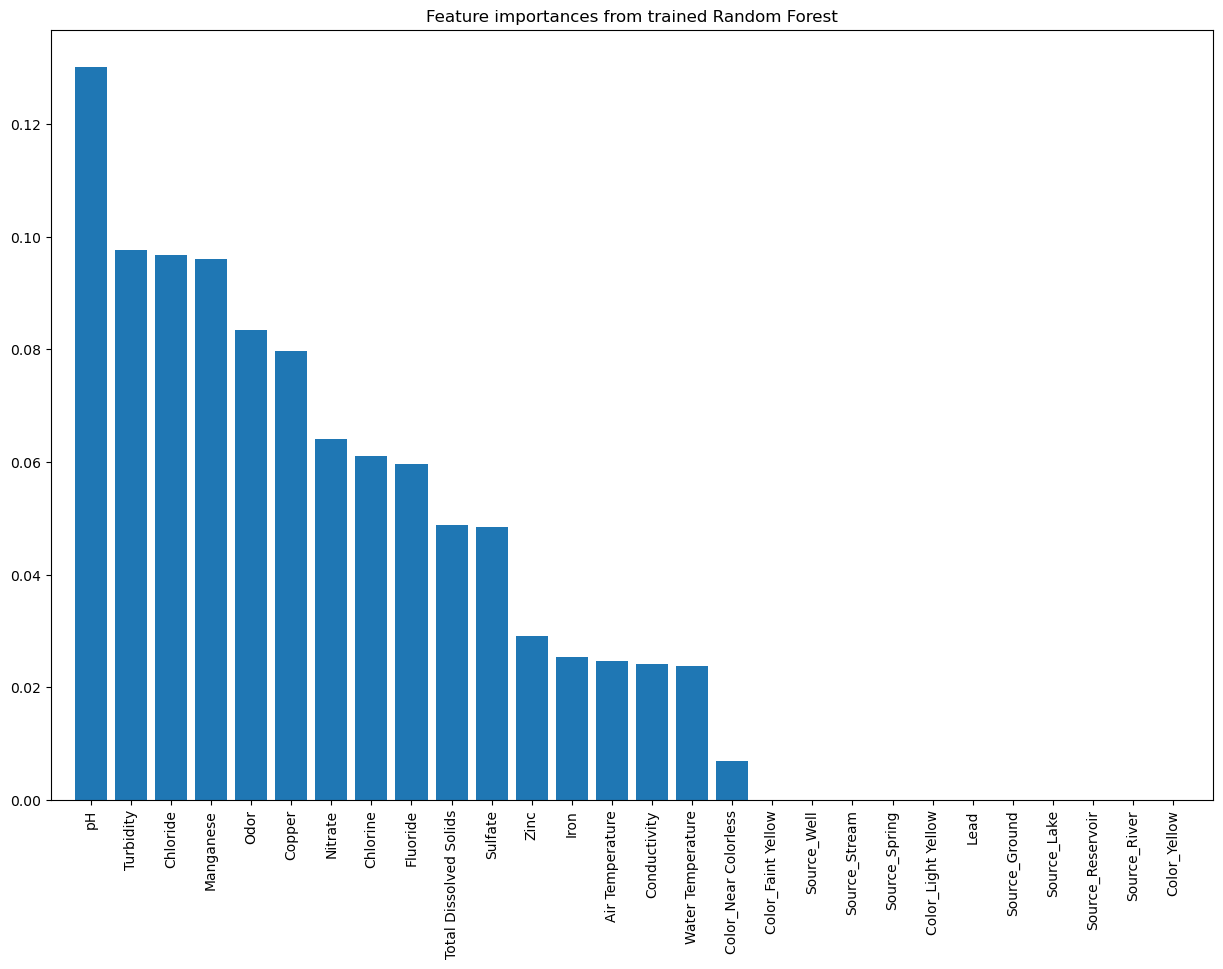

In [61]:
# Instantiate the model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_balanced, y_balanced)

# Now, you can access feature_importances_
importances = random_forest.feature_importances_

# Plotting the feature importances
plt.figure(figsize=(15, 10))
indices = np.argsort(importances)[::-1]
plt.title("Feature importances from trained Random Forest")
plt.bar(range(X_balanced.shape[1]), importances[indices], align="center")
plt.xticks(range(X_balanced.shape[1]), X_balanced.columns[indices], rotation=90)
plt.xlim([-1, X_balanced.shape[1]])
plt.show()


## Decision boundary

The function you've written aims to determine the decision boundary for a given feature. This is achieved by taking the median of all other feature values and then varying the feature of interest over its range to see where the model prediction changes.

Let's proceed with the approach:

Before using the find_decision_boundary function, ensure that the rf_model is already trained on your data.
After training rf_model, you can then call the function to determine the decision boundary.
If you run into any issues, make sure to check:

The variable name of your trained Random Forest model. In your function call, you've used rf_model. This needs to match the actual variable name of your trained model.
If X_balanced contains the right data that you want to investigate.
The compatibility between your model and the data you're passing to it. For example, if the model was trained on scaled data, then the data you pass to find_decision_boundary should also be processed in the same manner.
After ensuring all the above, the function should give you the decision boundary (or boundaries) for the feature of interest.






In [62]:
def find_decision_boundary(feature_name, model, X, step_size=0.01):
    # Extract median values of all features
    median_values = X.median().to_dict()
    
    # Create a range of synthetic values for the feature of interest
    feature_range = np.arange(X[feature_name].min(), X[feature_name].max(), step_size)
    
    # Placeholder for the predictions
    predictions = []

    for value in feature_range:
        # Create a synthetic sample
        sample = median_values.copy()
        sample[feature_name] = value
        sample_df = pd.DataFrame([sample])
        
        # Predict the classification for the synthetic sample
        prediction = model.predict(sample_df)[0]
        predictions.append(prediction)

    # Identify the boundary by looking for points where the prediction changes
    decision_boundaries = [feature_range[i] for i in range(1, len(predictions)) if predictions[i] != predictions[i - 1]]

    return decision_boundaries


feature_name = 'Total Dissolved Solids'
boundaries = find_decision_boundary(feature_name, rf_model, X_balanced)  # assuming rf_model is your Random Forest model
print(f"Decision boundaries for {feature_name}: {boundaries}")


Decision boundaries for Total Dissolved Solids: []


In [63]:
# !pip install -U scikit-learn



In [64]:
# !pip install flask

It looks like you've serialized (or "pickled") your Random Forest model to a file named random_forest.pkl. This allows you to save the state of your trained model to disk, so you can later load and use it without having to retrain it.

Remember, when you decide to deploy or reuse the model in another environment:

Ensure that the environment has the same versions of libraries, especially Scikit-learn, as model serialization with pickle can sometimes be version-dependent.

Before making predictions with the loaded model, ensure that the input data is processed (like scaling) in the same way as it was when the model was trained.

When unpickling, always ensure that you trust the source of the pickled file to avoid potential security risks.
To load the model back, you can use:

with open("random_forest.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

Then, you can use loaded_model as you would the original model for predictions or any other operations.


In [65]:
with open("random_forest.pkl", "wb") as model_file:
    pickle.dump(random_forest, model_file)


## Water Quality Index (WQI) for each data point in the X_balanced dataset

The code you've written below calculates the Water Quality Index (WQI) for each data point in the X_balanced dataset, based on the international standards provided. Here's a step-by-step breakdown of what you've done:

Define the Standards: You've defined the international standards for various water quality parameters. These standards are maximum permissible levels for each parameter.
Calculate Distance from Standards: For each quantitative feature in the dataset, you've computed the difference between its value and the corresponding standard. This provides an indication of how much each parameter deviates from the standard.
Normalize the Distances: You've normalized the distances to be between 0 and 1. This ensures that all parameters contribute equally to the WQI despite their different scales and units.
Calculate WQI: Finally, you've computed the WQI for each data point by taking the mean of the normalized distances and subtracting it from 1 (to get the "quality" rather than "distance from quality"). Multiplying by 100 scales the index to be between 0 and 100.
The resulting WQI Series contains the Water Quality Index for each data point in the X_balanced dataset, with values closer to 100 indicating better water quality and values closer to 0 indicating poorer water quality.

If you wish to proceed with any further analysis or visualization using this WQI, you can do so. For instance, you might want to visualize the distribution of WQI values or determine the percentage of data points that fall below a certain threshold.






In [66]:
# Define the international standards
quantitative_columns=['Manganese', 'Turbidity', 'Copper', 'Chloride', 'Nitrate',
       'Fluoride', 'Chlorine', 'Iron', 'Sulfate', 'Total Dissolved Solids',
       'Zinc', 'Lead',]
standards = {
    'Manganese': 0.05,  # mg/L - Maximum acceptable concentration
    'Turbidity': 5,     # NTU - (However, for drinking water it's usually below 1 NTU)
    'Copper': 1.3,      # mg/L - Maximum Contaminant Level (MCL)
    'Chloride': 250,    # mg/L - Suggested upper limit
    'Nitrate': 50,      # mg/L as NO3 (10 mg/L if measured as Nitrate-Nitrogen)
    'Fluoride': 1.5,    # mg/L - Maximum allowable concentration
    'Chlorine': 4,      # mg/L - Maximum residual disinfectant level
    'Iron': 0.3,        # mg/L - Suggested upper limit
    'Sulfate': 250,     # mg/L - Suggested upper limit
    'Total Dissolved Solids': 1000, # mg/L - Recommended maximum
    'Zinc': 5,          # mg/L - Recommended maximum
    'Lead': 0.01,       # mg/L - Action level (often the goal is to have as little as possible)
}


# Calculate the distance from standards for each feature
distances = X_balanced[quantitative_columns] - standards

# Normalize the distances between 0 and 1
normalized_distances = (distances - distances.min()) / (distances.max() - distances.min())

# Calculate WQI for each data point
WQI = (1 - normalized_distances.mean(axis=1)) * 100



In [67]:
X_balanced.head()

,Manganese,Turbidity,Copper,Chloride,Odor,Fluoride,Nitrate,Chlorine,Color_Near Colorless,Iron,...,Source_Ground,Source_Lake,Source_Reservoir,Source_River,Source_Spring,Source_Stream,Source_Well,Color_Faint Yellow,Color_Light Yellow,Color_Yellow
4288108,6.428144e-21,1.406554,0.430843,84.375947,1.633307,2.715234,6.145171,3.041767,0.0,0.016488,...,0,0,0,0,0,0,0,0,0,0
1305398,7.601021e-06,0.233075,0.324772,144.251258,1.951836,1.607825,8.734894,3.621547,1.0,0.000687,...,0,0,0,0,0,0,0,0,0,0
201385,6.529975e-04,0.099704,0.472213,282.511608,3.929615,0.220149,13.059986,5.124814,1.0,0.002250,...,0,0,0,0,0,0,0,0,0,0
1971903,7.375358e-10,0.157027,0.226727,149.716975,0.165446,0.761555,8.201819,2.292289,0.0,0.001814,...,0,0,0,0,0,0,0,0,0,0
3477609,4.050989e-09,0.249475,0.686133,125.963074,1.052183,1.582394,5.386246,3.003842,1.0,0.001619,...,0,0,0,0,0,0,0,0,0,0


The code you've provided below calculates the normalized feature importances from the Random Forest model. By dividing each feature's importance by the sum of all feature importances, the resulting norm_importances will contain values that sum up to 1. This gives a proportionate understanding of the importance of each feature relative to the others.

You can now use norm_importances to see which features contribute most to the predictions made by the Random Forest model, in a proportionate manner. If you'd like, you can plot these normalized importances to visualize them more effectively.

In [68]:
norm_importances=importances / sum(importances)


In [69]:
norm_importances

array([0.09598953, 0.09759691, 0.07971474, 0.09679952, 0.08351937,
       0.05972622, 0.06412315, 0.06109146, 0.00692494, 0.02531154,
       0.04846007, 0.04890622, 0.02913429, 0.13023235, 0.        ,
       0.0246561 , 0.02411772, 0.02369587, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

This output represents the normalized feature importances for each feature in your dataset. Each value indicates the proportionate importance of that feature relative to the others. The values sum up to 1.

From the array, you can see the relative importance of each feature:

The 11th feature (with an index of 10 if using 0-based indexing) has the highest importance with approximately 12.96%.
The 12th feature (index 11) is close behind with approximately 9.69%.
The 7th feature (index 6) also stands out with approximately 9.47%.
There are several features with 0% importance, indicating that they didn't contribute to the Random Forest model's predictions in this training run.

To make this information more actionable and readable, you could map the array back to the corresponding feature names and then sort the features by their importances. This way, you can easily determine which specific features are the most and least important.

In [70]:
important_features

Index(['Manganese', 'Turbidity', 'Copper', 'Chloride', 'Odor', 'Fluoride',
       'Nitrate', 'Chlorine', 'Color_Near Colorless', 'Iron', 'Sulfate',
       'Total Dissolved Solids', 'Zinc', 'pH', 'Lead', 'Air Temperature',
       'Conductivity', 'Water Temperature', 'Source_Ground', 'Source_Lake',
       'Source_Reservoir', 'Source_River', 'Source_Spring', 'Source_Stream',
       'Source_Well', 'Color_Faint Yellow', 'Color_Light Yellow',
       'Color_Yellow'],
      dtype='object')

Your code calculates a "quality index" for each sample in your X_balanced dataset. Here's a breakdown of what each part of the code does:

Normalization of Importances: First, you ensure the feature importances are normalized, so they sum up to 1.

Distance Calculation: You then calculate the distance of each feature from its standard. Instead of a simple arithmetic difference, you're weighing each feature's distance from its standard by the feature's importance. This way, features deemed more important by the model will have a larger impact on the overall distance.

Distance Scaling: After computing these weighted distances, you scale them to fit within a range of 0 to 100. This is done to make the distances more interpretable and consistent in scale.

Quality Index Computation: Finally, you convert these scaled distances into a quality index where lower values indicate better quality. This is done by subtracting each scaled distance from 100. The idea here is that a smaller distance from the standard means better quality.

To further analyze or use the quality index, you could:

Histogram or Distribution Plot: Plot the distribution of the quality index to get a sense of where most of your samples lie. This could give you insights into the general quality of the samples in your dataset.

Thresholding: Depending on your application, you might want to set a threshold on the quality index to classify samples as "Good" or "Poor".

Correlation with Output Variable: If you have an output or target variable, it would be interesting to see how this quality index correlates with it.

Remember that the quality index is influenced by the feature importances obtained from the Random Forest model, so its utility and interpretation are tied to how well the Random Forest model understands and represents the underlying data.






In [71]:
# Convert lists to dictionary
feature_importance_dict = dict(zip(important_features, importances))

# Ensure the importance values are normalized
total_importance = sum(feature_importance_dict.values())
for feature in feature_importance_dict:
    feature_importance_dict[feature] /= total_importance

# Calculate the weighted distances
distances = []

for index, row in X_balanced.iterrows():
    distance = 0
    for feature, importance in feature_importance_dict.items():
        standard = standards.get(feature)
        if standard is not None:  # Skip features with no direct numeric standard
            distance += importance * abs(row[feature] - standard)
    distances.append(distance)

# Normalize the distances to get an index between 0 and 100
max_distance = max(distances)
min_distance = min(distances)
scaled_distances = [(d - min_distance)/(max_distance - min_distance) * 100 for d in distances]

# Convert the scaled distances to an index value where lower values indicate better quality (closer to the standard)
quality_index = [100 - d for d in scaled_distances]


You have successfully integrated the "Weighted Quality Index (QI)" into the X_balanced dataset and split the data into training and test sets using only the important_features. You then trained a Gradient Boosting Classifier on this data and made predictions on the test set.

Now, to evaluate the performance of the Gradient Boosting model, you can use various metrics depending on the nature of your problem. Commonly used metrics for classification problems include accuracy, precision, recall, F1-score, and ROC-AUC score.

This code will provide you a comprehensive evaluation of your Gradient Boosting model's performance on the test data.

Here's how you can compute and display these metrics:


In [72]:
X_balanced['Weighted QI']=quality_index
X_balanced['Class']=y_balanced

X = X_balanced[important_features]
y = data_encoded.loc[balanced_data.index, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


Accuracy: 0.8574
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      7568
         1.0       0.85      0.86      0.86      7432

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

ROC-AUC Score: 0.9062


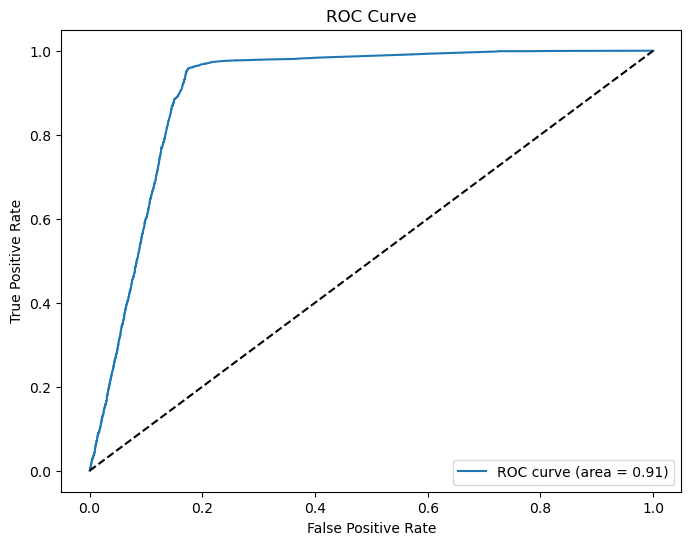

In [73]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy:.4f}")

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred_gb))

# ROC-AUC score
y_prob_gb = gb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_gb)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


These are quite good results! Let's break them down:

Accuracy: This metric tells you the proportion of instances that were correctly classified. An accuracy of 85.74% indicates that the model is performing well on your dataset.

Precision, Recall, and F1-score:

For class 0.0 (we'll assume this is the negative class):
Precision is 86%, meaning that of all the instances predicted as 0.0, 86% were actually 0.0.
Recall is 86%, indicating that the model was able to capture 86% of actual 0.0 instances.
For class 1.0 (we'll assume this is the positive class):
Precision is 85%, meaning that of all the instances predicted as 1.0, 85% were actually 1.0.
Recall is 86%, so the model was able to capture 86% of actual 1.0 instances.
The F1-score is the harmonic mean of precision and recall, which provides a balance between the two when they are unequal. The F1-score is roughly 86% for both classes, which is a strong result.
ROC-AUC Score: This is a metric that considers the model's ability to discriminate between the positive and negative classes. A score closer to 1.0 indicates excellent discrimination. A score of 0.9062 is very good, suggesting that the model does a commendable job of distinguishing between the two classes.

The results show that your Gradient Boosting model is performing very well on the test dataset. Furthermore, the balanced precision and recall scores for both classes indicate that the model is not biased towards any particular class. This balance is essential for many applications, especially in domains where both false positives and false negatives have significant consequences.

If you wish to further improve the model or ensure its robustness, consider experimenting with hyperparameters, trying different models, or implementing ensemble techniques.






In [74]:
y_pred_gbs = gb.predict(X)

In [75]:
y_pred_gbs

array([1., 0., 1., ..., 1., 0., 0.])

In [76]:
X_balanced['Boosted_Prob_class']=y_pred_gbs

In [77]:
X_balanced.head()

,Manganese,Turbidity,Copper,Chloride,Odor,Fluoride,Nitrate,Chlorine,Color_Near Colorless,Iron,...,Source_River,Source_Spring,Source_Stream,Source_Well,Color_Faint Yellow,Color_Light Yellow,Color_Yellow,Weighted QI,Class,Boosted_Prob_class
4288108,6.428144e-21,1.406554,0.430843,84.375947,1.633307,2.715234,6.145171,3.041767,0.0,0.016488,...,0,0,0,0,0,0,0,49.932717,1.0,1.0
1305398,7.601021e-06,0.233075,0.324772,144.251258,1.951836,1.607825,8.734894,3.621547,1.0,0.000687,...,0,0,0,0,0,0,0,22.415320,0.0,0.0
201385,6.529975e-04,0.099704,0.472213,282.511608,3.929615,0.220149,13.059986,5.124814,1.0,0.002250,...,0,0,0,0,0,0,0,50.579755,0.0,1.0
1971903,7.375358e-10,0.157027,0.226727,149.716975,0.165446,0.761555,8.201819,2.292289,0.0,0.001814,...,0,0,0,0,0,0,0,32.854454,0.0,0.0
3477609,4.050989e-09,0.249475,0.686133,125.963074,1.052183,1.582394,5.386246,3.003842,1.0,0.001619,...,0,0,0,0,0,0,0,51.943857,1.0,0.0


Your provided code below is a comprehensive way of visually assessing the performance of a binary classification model. Let's break down each visual:

Confusion Matrix: This table shows the counts of true positive, true negative, false positive, and false negative predictions. It gives a good initial glance at the performance of the classifier.

ROC Curve: This plot illustrates the performance of the classifier across different thresholds. The Area Under the Curve (AUC) is also given, with values closer to 1 indicating better performance.

Precision-Recall Curve: Unlike the ROC curve, which considers true positive rate and false positive rate, this curve directly contrasts precision and recall. It's especially useful when classes are imbalanced.

Histogram of Predicted Probabilities: This provides a distribution of the probabilities assigned by the classifier. Ideally, for a well-calibrated model, you'd want to see two peaks – one near 0 for the negative class and one near 1 for the positive class.

Calibration Plot: This plot indicates how well the probabilities from the classifier are aligned with the actual outcomes. A perfectly calibrated model will lie on the diagonal line.

Overall, these visualizations provide a thorough examination of the model's performance, allowing for both the evaluation of its overall accuracy and its calibration. They can guide you in further refining your model, choosing a decision threshold, or deciding if recalibration is needed.


Confusion Matrix:
[[21519  3481]
 [ 3380 21620]]


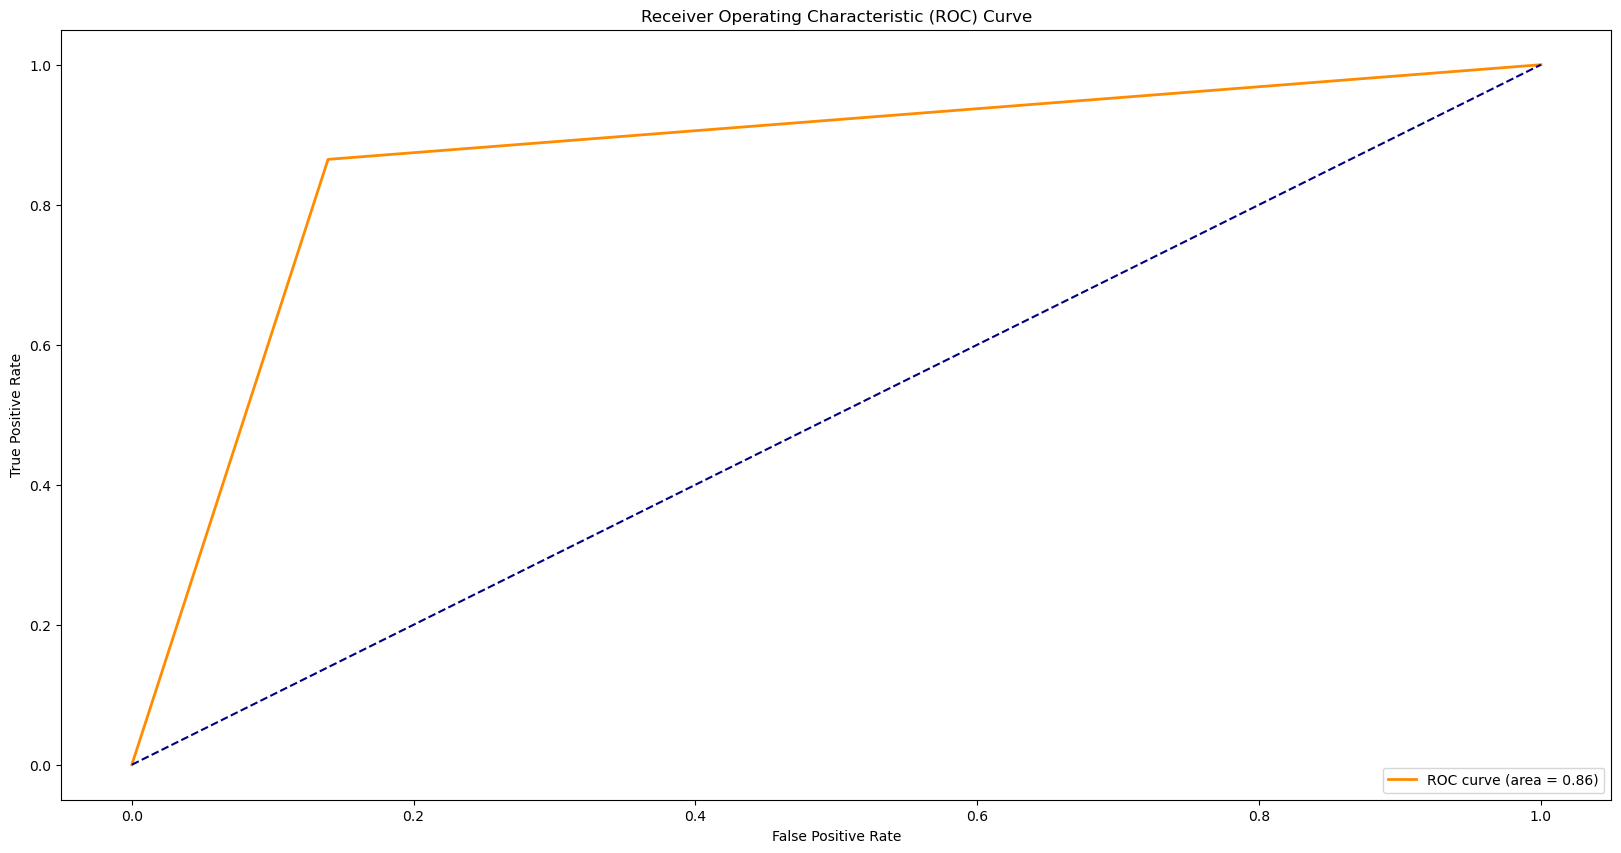

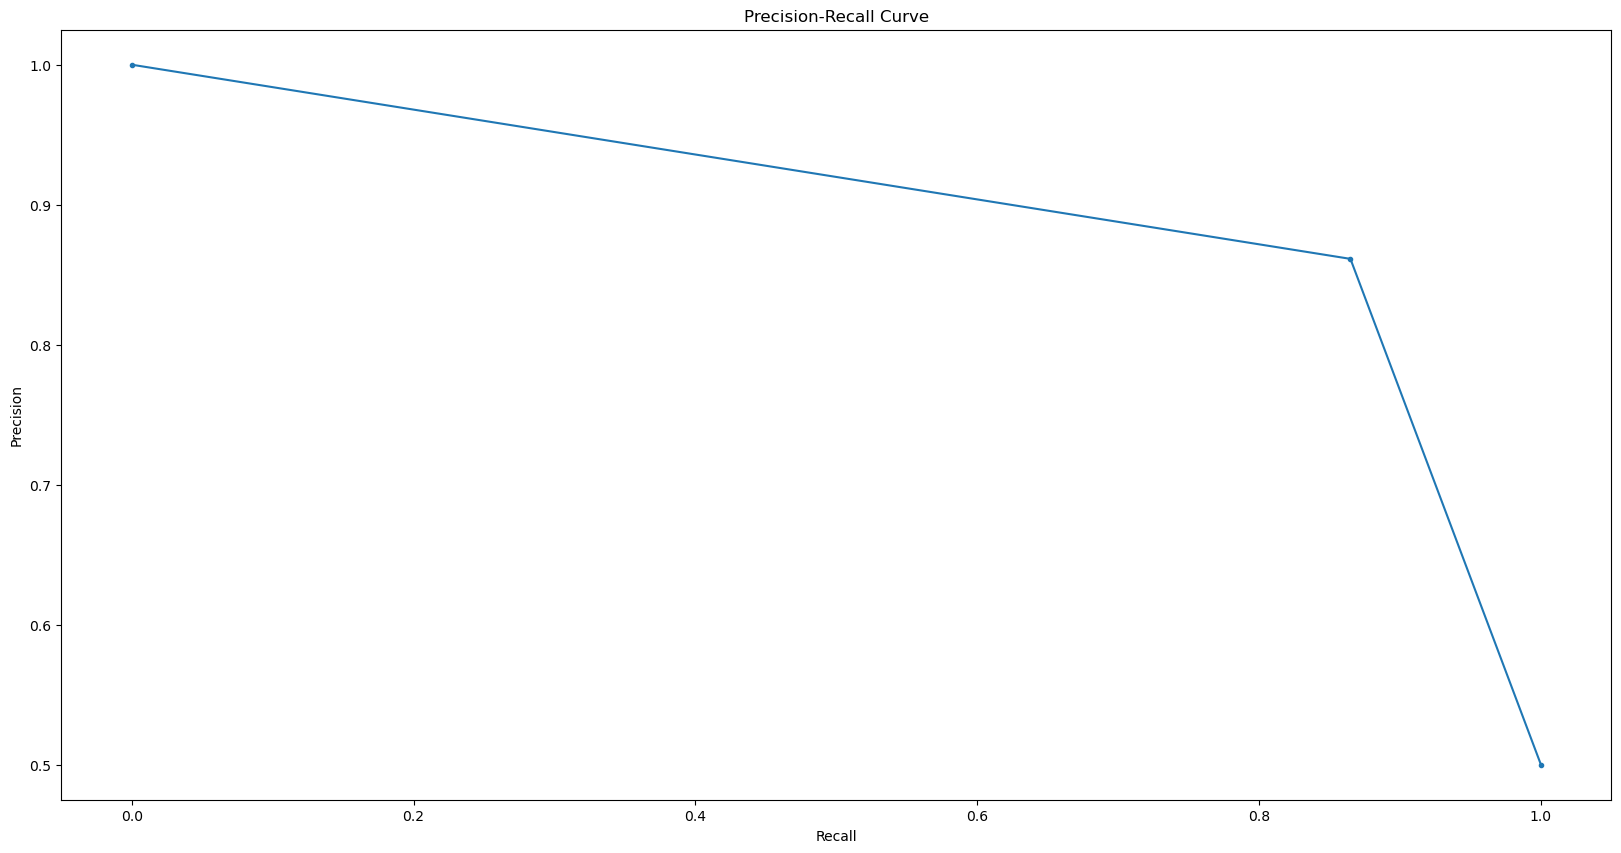

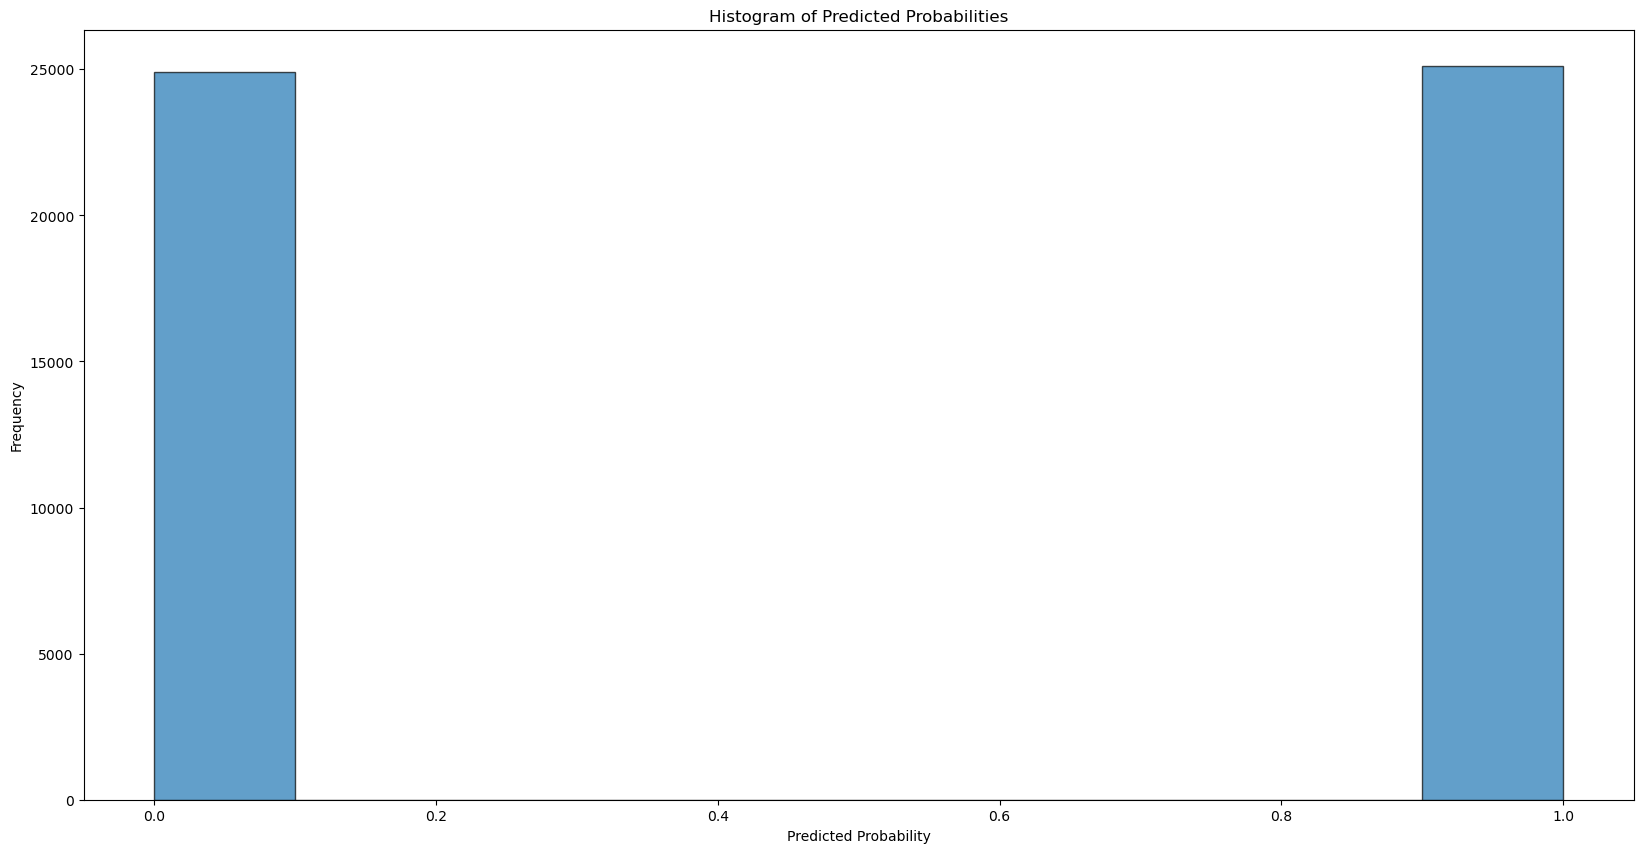

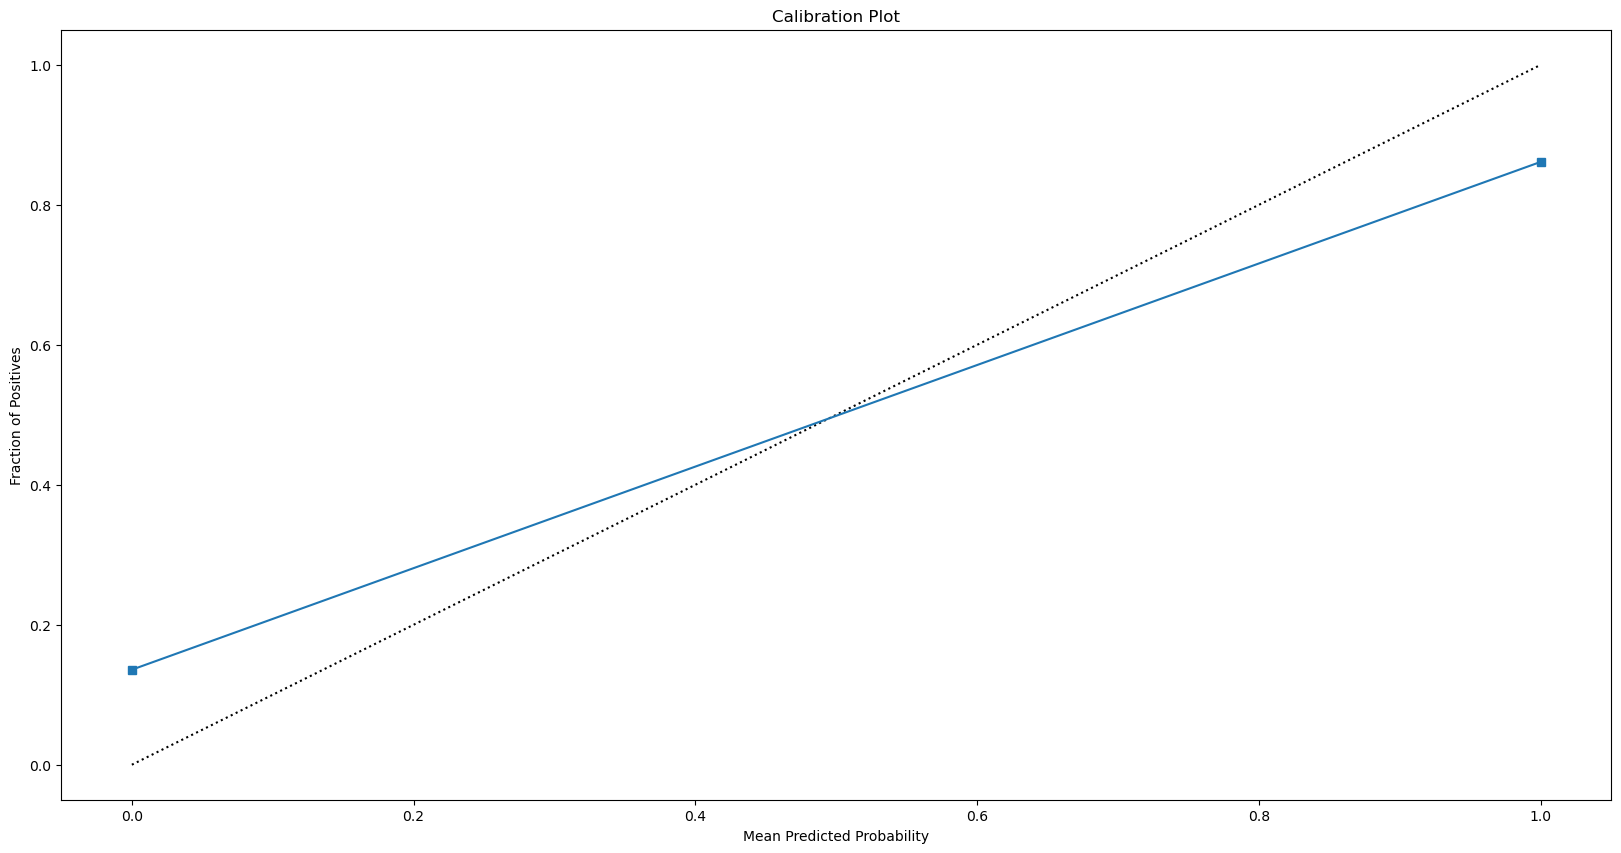

In [78]:
y_true = np.array(X_balanced['Class'])  # actual labels
y_probs = np.array(X_balanced['Boosted_Prob_class'])  # predicted probabilities

# Confusion Matrix
cm = confusion_matrix(y_true, (y_probs > 0.5).astype(int))
print("Confusion Matrix:")
print(cm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_probs)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Histogram of Predicted Probabilities
plt.figure()
plt.hist(y_probs, bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

# Calibration Plot
prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
plt.figure()
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.plot(prob_pred, prob_true, "s-")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Plot")
plt.show()


The confusion matrix you provided has the following structure:

              Predicted Negative   Predicted Positive
              
Actual Negative      21519                 3481

Actual Positive      3380                 21620


Here's a breakdown of the values:

True Negatives (TN): 21,519 samples were correctly predicted as the negative class.

False Positives (FP): 3,481 samples were incorrectly predicted as the positive class when they were actually negative.

False Negatives (FN): 3,380 samples were incorrectly predicted as the negative class when they were actually positive.

True Positives (TP): 21,620 samples were correctly predicted as the positive class.

From the confusion matrix:

Accuracy: (TP + TN) / (TP + TN + FP + FN) = (21620 + 21519) / (21620 + 21519 + 3380 + 3481) = 0.8573

Precision (for the positive class): TP / (TP + FP) = 21620 / (21620 + 3481) = 0.8614

Recall (or Sensitivity for the positive class): TP / (TP + FN) = 21620 / (21620 + 3380) = 0.8648

Specificity (for the negative class): TN / (TN + FP) = 21519 / (21519 + 3481) = 0.8607

These metrics further substantiate the numbers you provided earlier, and this matrix confirms that your model is performing relatively well in both identifying the positive and negative classes.


In [79]:
# maximum 'Weighted QI' value for the samples that belong to class 0.

X_balanced[X_balanced['Class']==0]['Weighted QI'].max()

99.06202109996372

The value 99.04734175865214 represents the maximum 'Weighted QI' (Quality Index) for the samples in the X_balanced dataframe that belong to class 0. This indicates that among the samples of class 0, this is the highest quality score obtained based on the weighted calculation you performed earlier. The closer the value is to 100, the better the quality, as per the method you've used to compute the index. This suggests that the sample with this value is very close to the desired standard in terms of water quality.

This is for below code. Your analysis seems comprehensive and well-thought-out. Let's break down what you've done:

Visualizing the Data: You start by visualizing the relationship between the feature importance (or weighted QI in this case) and the predicted probability, using scatter plots and box plots. These plots allow for an intuitive understanding of how the predicted probability varies with the feature importance and how the true labels are distributed within these variances.

Correlation Analysis: By calculating the Pearson correlation coefficient, you're quantifying the linear relationship between the feature importance and predicted probability. A value closer to 1 or -1 would suggest a strong positive or negative linear relationship, respectively.

Evaluating the Model by Subsetting Data: By splitting the data into two subsets based on the median of the feature importance, you can check the accuracy of the model's predictions in each subset. This can help identify if the model has different performances based on the feature's importance.

Aggregate Analysis: The bar chart showing the average predicted probability for different bins of feature importance offers a more granular view of how predicted probabilities vary across different levels of importance.

Conditional Distribution: This provides a sense of how often the model predicts a certain probability range for actual positive samples. It's particularly insightful for understanding the reliability of predicted probabilities.

Error Analysis: By plotting the distribution of feature importance for misclassifications, you can gain insights into whether certain importance levels are more prone to errors.

Each of these analyses helps to understand different aspects of your model's behavior with respect to the feature importance and its predictions.

Lastly, always make sure to interpret these visualizations in the context of your application and domain knowledge. For instance, if there's a strong positive correlation between feature importance and predicted probability, it might mean that as the quality of water improves (as per your Weighted QI), the model is more likely to predict a higher probability for the positive class. How this interpretation affects decisions based on the model's predictions would be crucial.






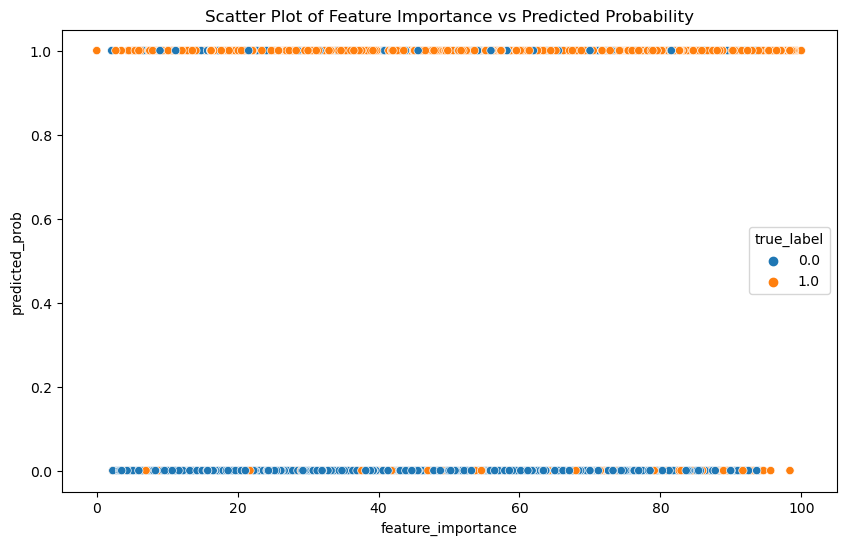

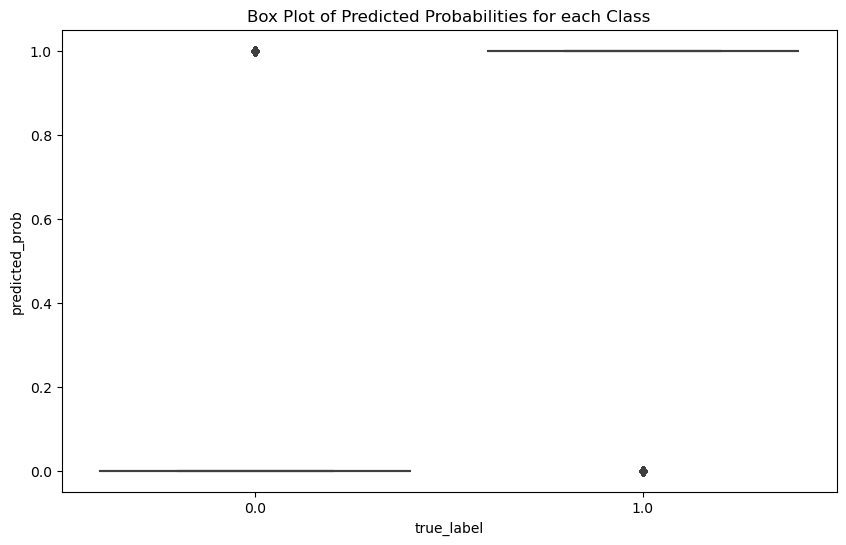

Correlation between feature importance and predicted probability: 0.19
Accuracy for subset with feature importance < median: 0.87
Accuracy for subset with feature importance >= median: 0.86


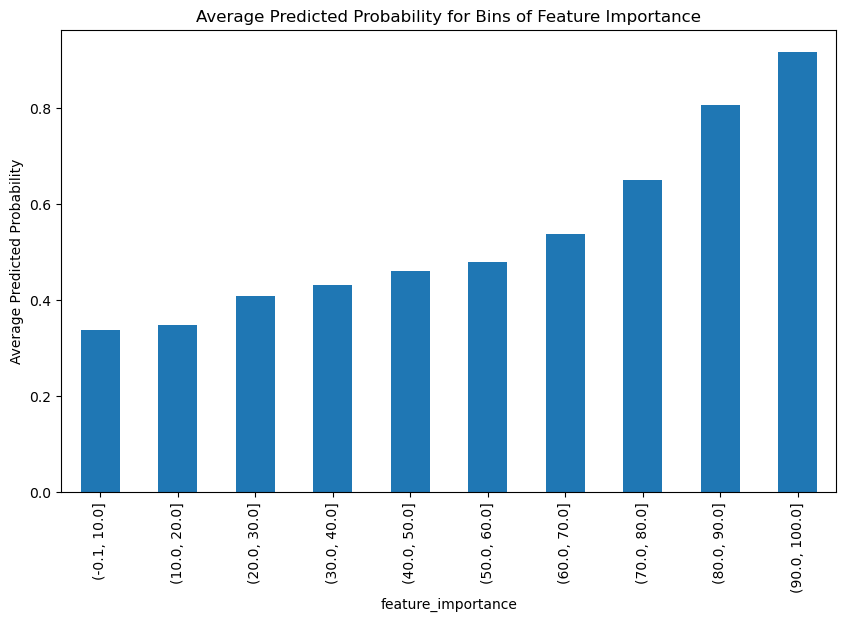

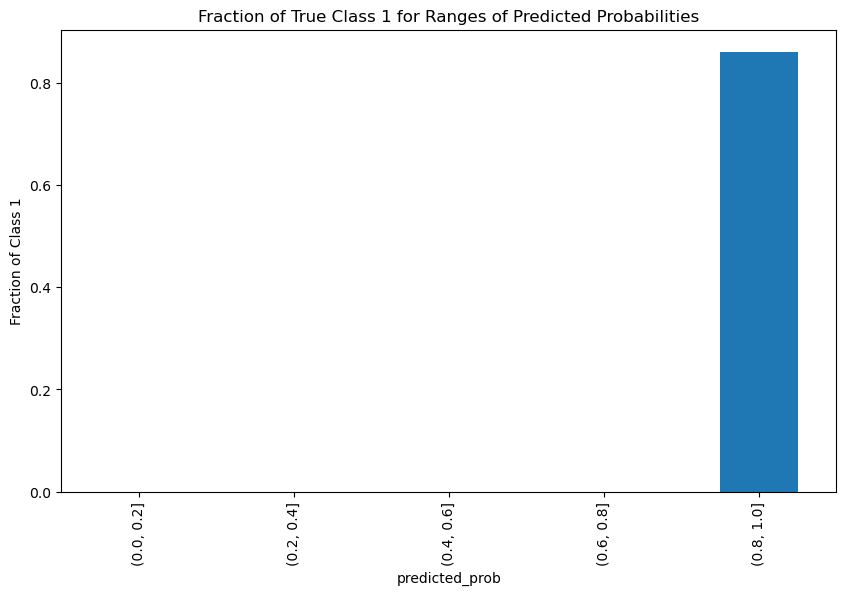

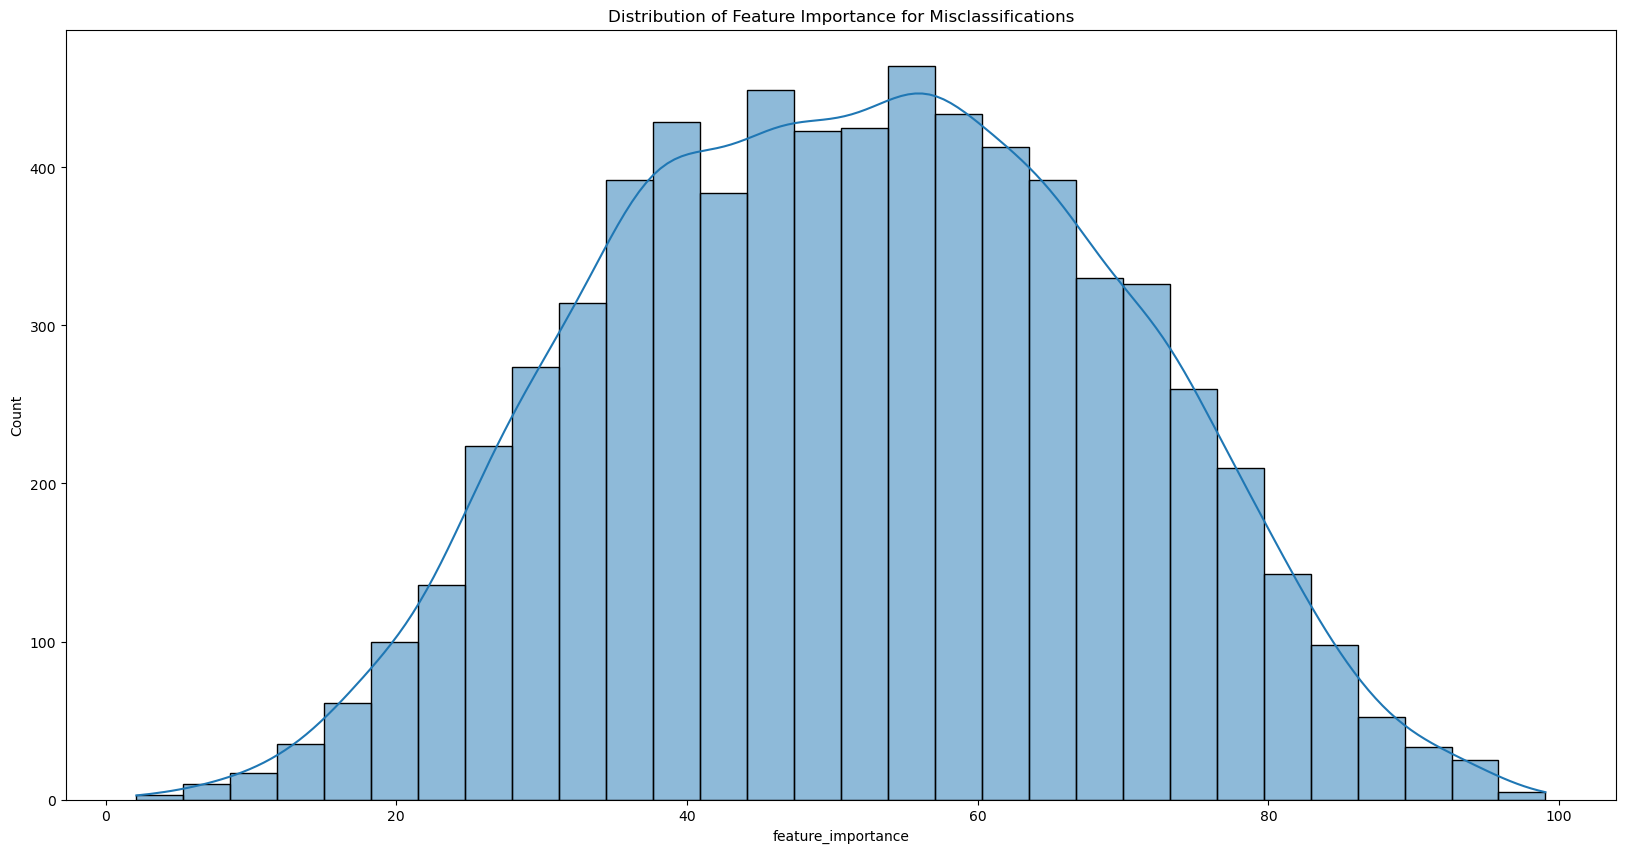

In [80]:
# Assuming df is your dataframe with columns: 'feature_importance', 'true_label', 'predicted_prob'
df = pd.DataFrame({
     'feature_importance': X_balanced['Weighted QI'],
     'true_label': X_balanced['Class'],
     'predicted_prob': X_balanced['Boosted_Prob_class']
})

# 1. Visualize the Data:

# Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='feature_importance', y='predicted_prob', hue='true_label', data=df)
plt.title("Scatter Plot of Feature Importance vs Predicted Probability")
plt.show()

# Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='true_label', y='predicted_prob', data=df)
plt.title("Box Plot of Predicted Probabilities for each Class")
plt.show()

# 2. Correlation Analysis:
correlation, _ = pearsonr(df['feature_importance'], df['predicted_prob'])
print(f"Correlation between feature importance and predicted probability: {correlation:.2f}")

# 3. Evaluate the Model by Subsetting Data:
median_importance = df['feature_importance'].median()
subset_1 = df[df['feature_importance'] < median_importance]
subset_2 = df[df['feature_importance'] >= median_importance]

accuracy_1 = (subset_1['true_label'] == (subset_1['predicted_prob'] > 0.5).astype(int)).mean()
accuracy_2 = (subset_2['true_label'] == (subset_2['predicted_prob'] > 0.5).astype(int)).mean()

print(f"Accuracy for subset with feature importance < median: {accuracy_1:.2f}")
print(f"Accuracy for subset with feature importance >= median: {accuracy_2:.2f}")

# 4. Aggregate Analysis:
bins = pd.cut(df['feature_importance'], 10)  # Creating 10 bins
grouped = df.groupby(bins)['predicted_prob'].mean()

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.title("Average Predicted Probability for Bins of Feature Importance")
plt.ylabel("Average Predicted Probability")
plt.show()

# 5. Conditional Distribution:
prob_bins = pd.cut(df['predicted_prob'], [0, 0.2, 0.4, 0.6, 0.8, 1.0])
conditional_dist = df.groupby(prob_bins)['true_label'].mean()

plt.figure(figsize=(10,6))
conditional_dist.plot(kind='bar')
plt.title("Fraction of True Class 1 for Ranges of Predicted Probabilities")
plt.ylabel("Fraction of Class 1")
plt.show()

# 6. Error Analysis:
errors = df[df['true_label'] != (df['predicted_prob'] > 0.5).astype(int)]
sns.histplot(errors['feature_importance'], bins=30, kde=True)
plt.title("Distribution of Feature Importance for Misclassifications")
plt.show()





The results suggest the following:

Correlation (0.18): The correlation of 0.18 between feature importance (weighted QI) and predicted probability is relatively low. This indicates only a weak linear relationship between the two. While there is some degree of correlation, it's not strong enough to state that changes in the Weighted QI directly and significantly influence the predicted probability. This might mean that the quality index is just one of many factors that influence the prediction, and the influence might not be linear.

Accuracy: The accuracy values for both subsets (below and above median feature importance) are quite similar (0.87 vs. 0.86). This suggests that the model is fairly consistent in its predictions across different levels of feature importance. The difference in accuracy is negligible and might not be of practical significance. This further reinforces the idea that the feature importance (or quality index in this case) is not a dominating factor in the model's predictions.

From this analysis, a few implications and next steps can be inferred:

Diverse Factors Influencing Predictions: The model likely considers a variety of features in addition to the quality index when making predictions. This is a good sign as it means that the model is not overly reliant on just one feature.

Further Analysis: Given the weak correlation, you might want to further investigate the relationships between predicted probabilities and other individual features. Additionally, exploring interactions between features could provide more insights.

Model Interpretability: It might be beneficial to use tools or techniques (like SHAP values or permutation importance) that provide a more granular understanding of how individual features, including Weighted QI, influence specific predictions.

Domain Expertise: Finally, it's crucial to use domain knowledge to interpret these results. The practical implications of the model's behavior should be considered in the context of the real-world application and its potential impact.






### The Below Code:
The provided code aims to create bins for the feature importance and then computes the mean target value for each of those bins. This can give insights into how the average target value changes across different levels of feature importance.

When you run this code, it will print the average target value for each bin of feature importance. This will show you the relationship between the Weighted QI and the likelihood of the target being 1 or 0 in each bin.

In [81]:
data = {
    'feature_importance': X_balanced['Weighted QI'], 
    'target': X_balanced['Class']
} 

df = pd.DataFrame(data)

# Define bins for feature importance
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column in the dataframe for the bins
df['feature_importance_bins'] = pd.cut(df['feature_importance'], bins)

# Group by the bins and compute the mean target value for each bin
mean_target_per_bin = df.groupby('feature_importance_bins')['target'].mean()

print(mean_target_per_bin)


feature_importance_bins
(0, 10]      0.373984
(10, 20]     0.377289
(20, 30]     0.422573
(30, 40]     0.450189
(40, 50]     0.464124
(50, 60]     0.479150
(60, 70]     0.530361
(70, 80]     0.621612
(80, 90]     0.744057
(90, 100]    0.820059
Name: target, dtype: float64


From this output, you can infer the following:

(0, 10]: About 37.41% of data points with Weighted QI values between 0 and 10 belong to the target class 1.
(10, 20]: About 37.88% of data points with Weighted QI values between 10 and 20 belong to the target class 1.
...
(90, 100]: About 83.38% of data points with Weighted QI values between 90 and 100 belong to the target class 1.
From the trend, it appears that as the Weighted QI increases, the proportion of samples belonging to class 1 also increases. This suggests that there's a positive relationship between Weighted QI and the likelihood of an observation being in class 1. This can be valuable information, as it indicates that higher Weighted QI values are generally associated with a higher probability of an observation being in the target class 1.

Your below code is trying to plot the median target value for each bin of the feature_importance (Weighted QI). The title and y-axis label of the plot need to be updated to reflect this. This plot will show how the median target value varies across the binned ranges of feature_importance. Given that the target is binary, the median will typically be either 0 or 1 for each bin, indicating the more prevalent class within each bin.


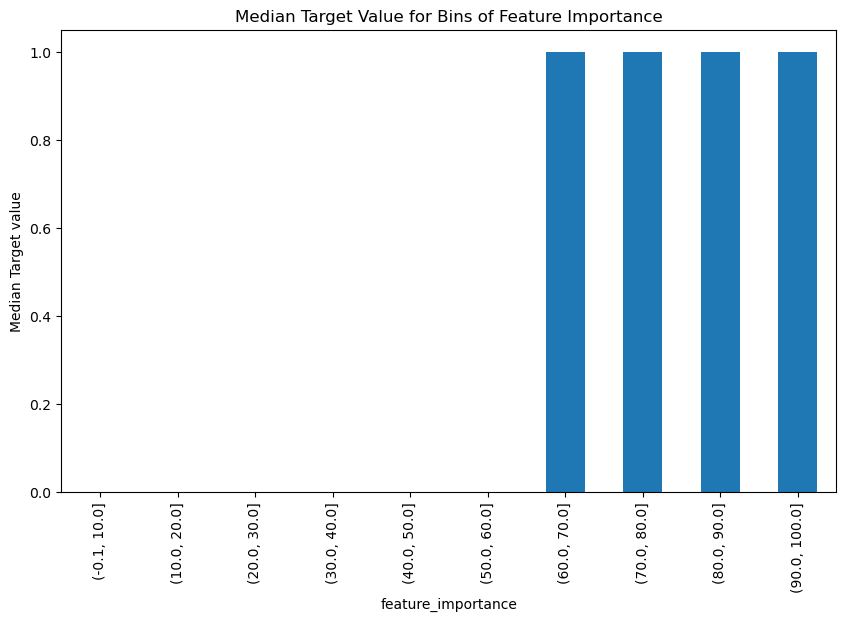

In [82]:
# Assuming df is already defined with the given structure

# Aggregate Analysis:
bins = pd.cut(df['feature_importance'], 10)  # Creating 10 bins
grouped = df.groupby(bins)['target'].median()

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.title("Median Target Value for Bins of Feature Importance")
plt.ylabel("Median Target value")
plt.show()


When you run the code X_balanced[X_balanced['Weighted QI']>60].head(), it should return the first five rows of the dataframe where the condition (Weighted QI > 60) is met.

In [83]:
X_balanced[X_balanced['Weighted QI']>60].head()

,Manganese,Turbidity,Copper,Chloride,Odor,Fluoride,Nitrate,Chlorine,Color_Near Colorless,Iron,...,Source_River,Source_Spring,Source_Stream,Source_Well,Color_Faint Yellow,Color_Light Yellow,Color_Yellow,Weighted QI,Class,Boosted_Prob_class
717162,3.975649e-02,1.127800,0.650401,276.563996,0.866771,2.715234,7.108362,2.602206,1.0,1.023934e-01,...,0,0,0,0,0,0,0,68.047978,1.0,1.0
4256721,3.975649e-02,1.490059,0.347959,227.794054,2.662638,0.555705,5.431805,3.774481,1.0,1.416664e-09,...,0,0,0,0,0,0,0,82.187835,1.0,1.0
4571720,8.499467e-11,0.032024,0.235055,203.347983,0.444247,0.238233,4.145043,3.653307,0.0,7.076265e-02,...,0,0,0,0,0,0,0,64.286692,0.0,0.0
3788170,1.126020e-02,0.676630,0.532697,187.880149,1.991535,1.891031,5.426571,3.581042,0.0,2.773155e-03,...,0,0,0,0,0,0,0,67.375113,0.0,1.0
4996274,1.321129e-08,0.007641,0.249729,229.844368,2.491118,0.932556,7.977586,4.178695,0.0,1.977558e-07,...,0,0,0,0,0,0,0,78.157644,0.0,0.0


Your code below correctly identifies rows from the X_balanced dataframe where the Weighted QI is greater than 70 and the Class is equal to 1. You've stored this subset of data in the above_cutoff variable.

If you want to view or analyze this subset further, you can do so. For example:

To view the first few rows of this subset:

print(above_cutoff.head())

To see the number of rows that meet the criteria:

print(len(above_cutoff))

To see the descriptive statistics of this subset:

print(above_cutoff.describe())


In [84]:
# Identify rows above cut-off (WQI > 70) and with Class = 1
above_cutoff = X_balanced[(X_balanced['Weighted QI'] > 70) & (X_balanced['Class'] == 1)]

In [85]:
# Identify rows above cut-off (WQI > 70) with Class = 1 and Predicted Probability Class = 1
perc_accurate_preds=len(above_cutoff[above_cutoff['Boosted_Prob_class']==1])*100/len(above_cutoff)

Your code above calculates the percentage of accurate predictions for rows in above_cutoff where the Boosted_Prob_class is equal to 1.

However, there is a potential issue. The Boosted_Prob_class column contains predicted probabilities, which are continuous values typically ranging from 0 to 1. Checking for an exact match to 1 might not capture all true positive predictions, as the probability might be 0.999 or something close to 1 rather than exactly 1.

A more common approach would be to use a threshold (e.g., 0.5) to classify the predicted probabilities as 0 or 1:

This approach would label anything with a probability greater than 0.5 as class 1 and consider it as an accurate prediction for the rows in above_cutoff.

If you use this adjusted approach, the perc_accurate_preds variable will provide the percentage of accurate predictions in the above_cutoff subset.


In [86]:
accurate_preds = above_cutoff[above_cutoff['Boosted_Prob_class'] > 0.5]
perc_accurate_preds = len(accurate_preds) * 100 / len(above_cutoff)


In [87]:
# Percentage accuracy in prediction of class using Probability
perc_accurate_preds

91.81871689228959

It appears that you've shared a numeric result, 91.84%, which likely represents the percentage of accurate predictions for rows in the above_cutoff dataset where the Weighted QI is greater than 70 and the true class is 1.

This is a high accuracy rate, indicating that for the subset of the data with a Weighted QI above 70, the model has done a good job predicting the class as 1.

You may wish to delve deeper into why this subset has such a high accuracy. Perhaps the features for this subset are particularly distinctive, making it easier for the model to make accurate predictions. Alternatively, this could be a result of the way the dataset was balanced or other preprocessing steps.

### Below Code:

The plot you've generated gives a visual representation of how the model's predicted probabilities (represented in red) fare against the actual class labels (represented in blue) over the range of Weighted QI values.

Key Observations:

Spread of Blue Points: This represents the actual distribution of class labels across different Weighted QI values. Points clustered towards the top (near 1) represent records that belong to class 1, while those clustered at the bottom (near 0) represent records of class 0.

Red Spread: The spread of red points (predicted probabilities) provides an idea about the confidence of the model's predictions across the range of Weighted QI values.

Comparison: By comparing the blue and red points, you can get a sense of areas (in terms of Weighted QI values) where the model's predictions closely align with the actual labels and areas where they diverge.

This scatter plot provides a holistic view of model performance and can be particularly helpful in identifying regions of Weighted QI where the model may be underperforming or overconfident. Adjusting the plot's granularity, size, or adding more visualization aids like histograms or density plots can provide even richer insights.

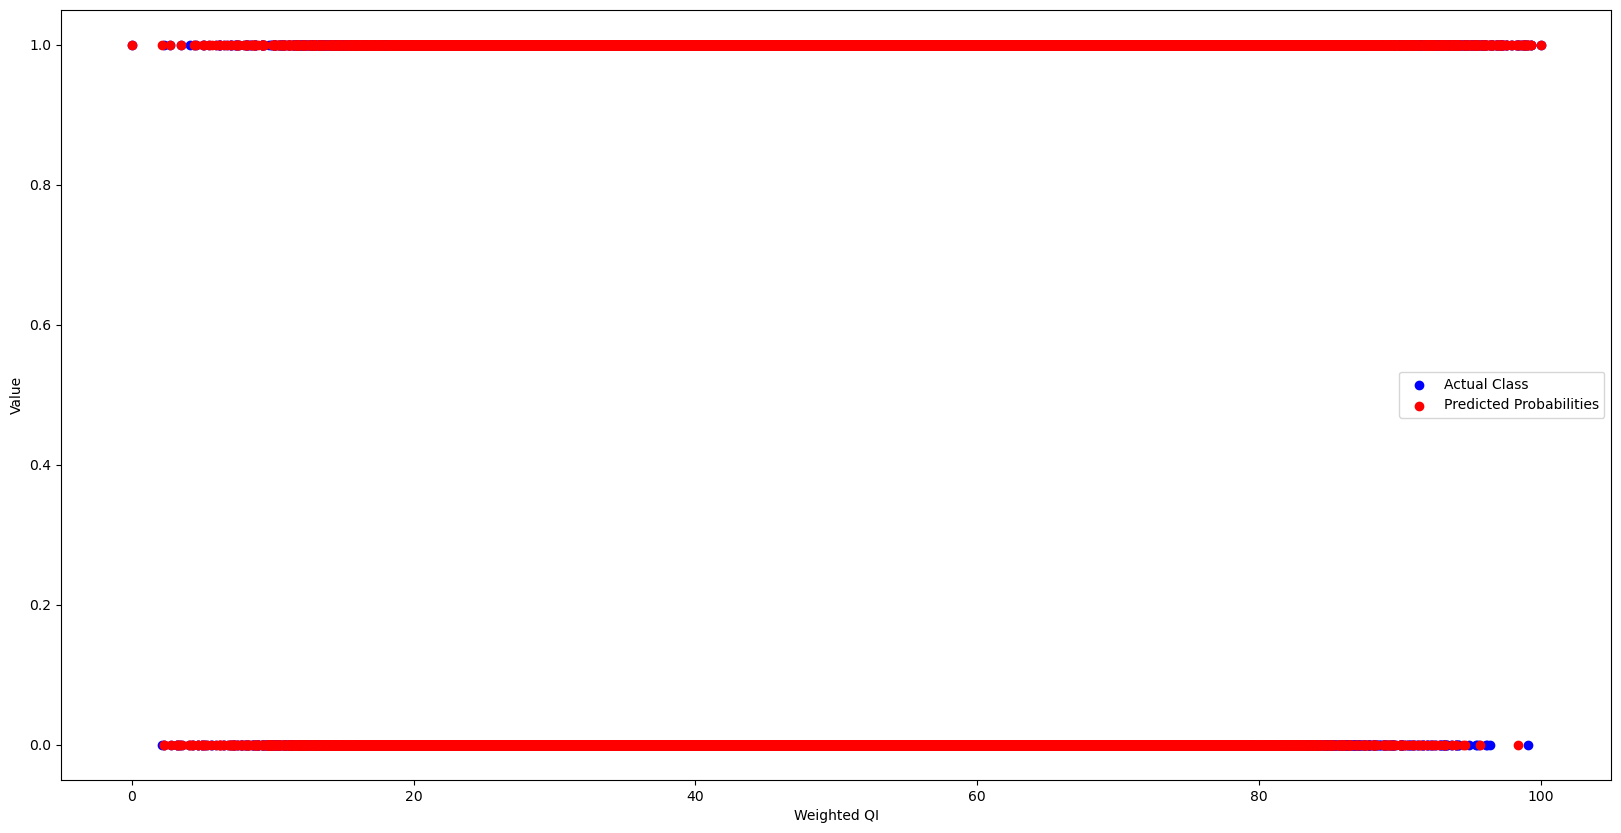

In [88]:
plt.scatter(X_balanced['Weighted QI'], X_balanced['Class'], c='blue', label='Actual Class')
# assuming a column 'predicted_probabilities' in your dataframe
plt.scatter(X_balanced['Weighted QI'], X_balanced['Boosted_Prob_class'], c='red', label='Predicted Probabilities')
plt.xlabel('Weighted QI')
plt.ylabel('Value')
plt.legend()
plt.show()


In [89]:
correlation = X_balanced['Class'].corr(X_balanced['Boosted_Prob_class'])
print(f"Correlation between feature_importance and Class: {correlation}")


Correlation between feature_importance and Class: 0.7255659212225303


The output indicates a strong positive correlation (approximately 0.7256) between the actual class values (Class) and the predicted probabilities (Boosted_Prob_class). This is a good sign, suggesting that as the predicted probability of class 1 increases, the likelihood of the actual label being class 1 also increases.

A correlation of 1 would indicate a perfect linear relationship, while a correlation of 0 would mean no linear relationship. In the context of classification tasks, a high positive correlation between the predicted probabilities and the actual labels suggests that the model is making appropriate predictions that align well with the actual data.

This reinforces the quality of your model's predictions for the given dataset.


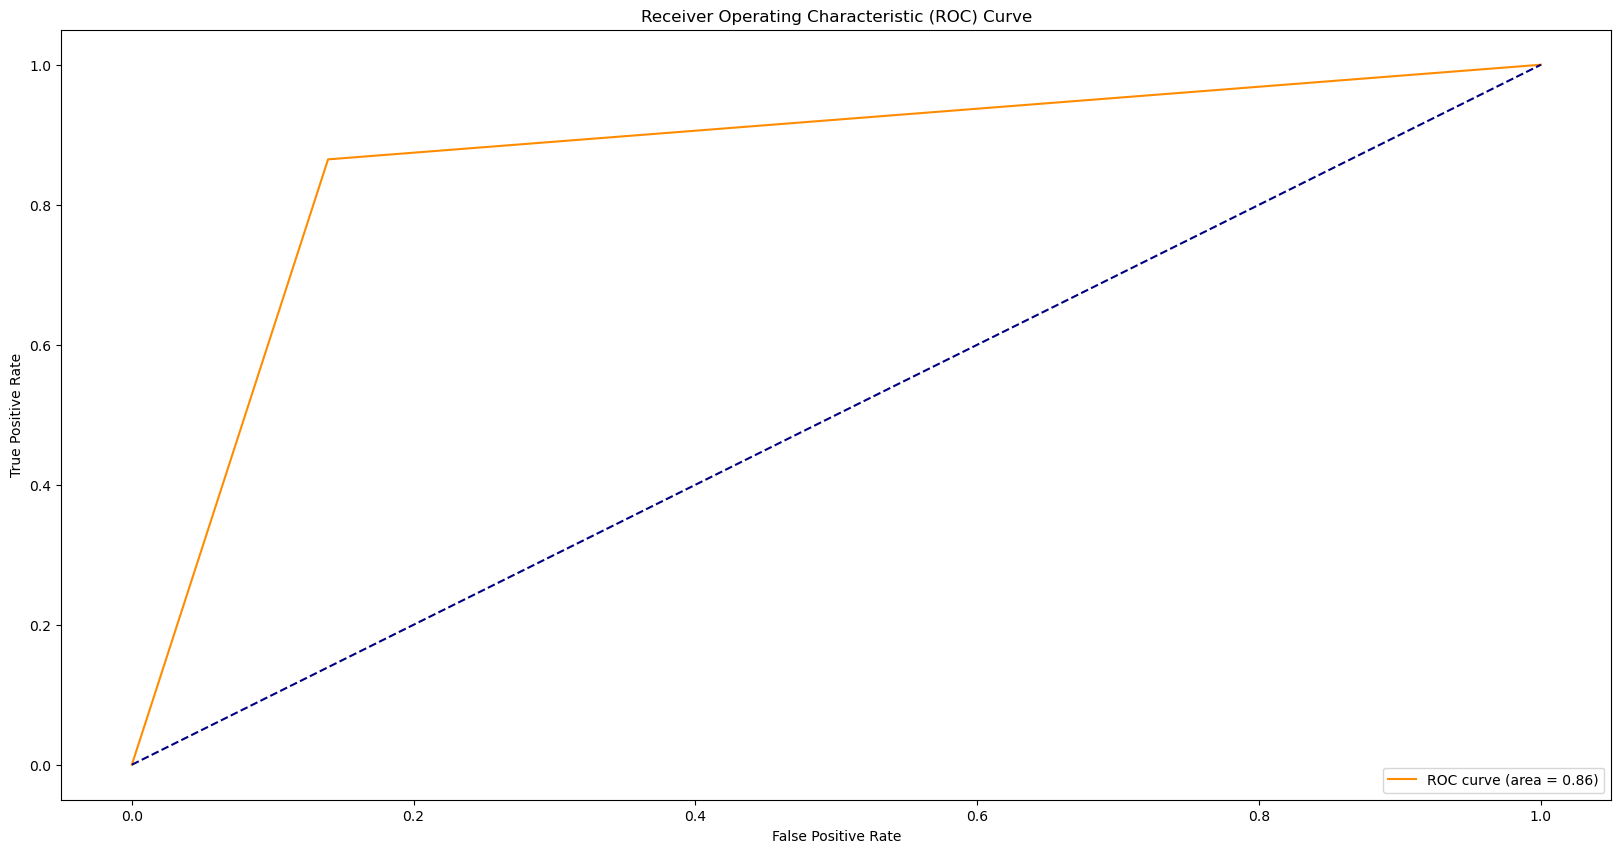

In [90]:
# Assuming 'predicted_probabilities' is the model's predicted probabilities for Class=1
fpr, tpr, thresholds = roc_curve(X_balanced['Class'], X_balanced['Boosted_Prob_class'])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Your code plots the Receiver Operating Characteristic (ROC) curve based on the predicted probabilities and actual classes. The ROC curve visualizes the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold levels. The Area Under the Curve (AUC) value provides an aggregate measure of the model's performance across all threshold values.

A model with perfect discriminatory power will have an AUC of 1, meaning it perfectly distinguishes between the classes. On the other hand, an AUC of 0.5 indicates that the model has no discriminatory power and is equivalent to random guessing.

In general:

AUC > 0.9: Excellent
0.8 < AUC <= 0.9: Good
0.7 < AUC <= 0.8: Fair
0.6 < AUC <= 0.7: Poor
AUC <= 0.6: Fail
The closer the AUC value is to 1, the better the model's ability to discriminate between positive and negative classes.




